<h1><center>Integration of paddock scale modelling and Source</center></h1>

<h2><center>Data visualisation and calibration tools</center></h2>

<h1><center>Mackay-Whitsunday model</center></h1>

<h1><center>Part 1: Introduction and Approach</center></h1>
## Introduction

Linking outputs from daily paddock scale models (APSIM) to large scale daily Source catchment models (Sacramento + daily SedNet) are currently being undertaken by distributing monthly loads generated from the paddock model across the Sacramento hydrology of the Source model. 

The application of paddock constituent time series to catchment scale hydrology result in inconsistencies in runoff and constituent timing and quantity. Runoff from paddock scale models may occur on different days (or at a different frequency) than estimated from the calibrated catchment models. The hydrology of the catchment models however has been systematically parameterised. 

The result of the current approach is a potential mismatch between paddock scale generated constituent concentrations and concentrations translated to Source. Also, this approach does not allow for the translation of paddock scale water balance changes (i.e. irrigation or water recycling) from the paddock scale to the catchment scale. 

## The proposed model integration approach

The proposed model integration approach seeks to directly incorporate both the runoff (surface and drainage) and the water quality constituents from the paddock scale models into the existing source models, effectively replacing both the FU based hydrology and maintaining a direct link to paddock scale constituent generation. 

The model integration has been undertaken via a plugin in Source. The plugin essentially adds a few more calculation steps to the paddock scale runoff and constituent loads to bring the paddock scale output to FU scale output which is the smallest base unit of the Source catchment models. 

The conceptual models for APSIM and Source are shown below 

<img src="Pictures/Sacramento_and_APSIM.png" width="1000">

In APSIM, the ‘runoff’ and ‘drainage’ terms are the outputs that could be passed directly to Source or to a plugin. Runoff is calculated via the curve number technique and crops can access water in the different soil horizons depending on root zone depth. The 'drainage' term is what is left over after any rainfall and irrigation runoff, crop water use and soil moisture have been calculated. 

In Sacramento, the exceedence of soil moisture capcity (or extent of impervious areas) determine if runoff will occur.  Evapotransipration from the upper and lower zone soil moisture stores deplete these stores and water can flow from the upper to the lower stores. Conceptually, these elements of the Sacramto model are similar to the mass balance that is undertaken in APSIM as shown below.  

<img src="Pictures/Sacramento_and_APSIM_1.png" width="1000">

The additional Sacramento model components that are not present in the APSIM conceptual model are generally associated with translation of water balance to the catchment outlet and removal of water to achieve mass balance at gauge sites:
-  Direct runoff and interflow pass through a unit hydrograph model to delay and lag the flows. This output creates the Source model 'quick flow' term
-  Baseflow loss and channel loss allows the Sacramento model to remove some water to groundwater to achieve mass balance at gauge sites 
-  The outflow from the lower zone soil moisture stores is determined by a coefficient to delay, or lag the outflow from this component of the model, creating the 'slowflow' term used in Source

These three additiional elements in the Sacramento model have been sufficient in Source to model FU based runoff to the stream network. Of course, streamflow routing and storage operations are also modelled in Source to further attenuate and translate flows to gauge sites and the catchment outlet, but these processes are also available to APSIM runoff imported at the FU level. 

The proposed model integration approach has three elements to translate APSIM generated runoff and constituents to subcatchment outlets (from pddock to FU level):
-  A surface routing store (like the unit hydrograph delay in Sacramento)
-  A drainage loss to remove some drainage water to deep drainage not measured at gauge sites and maintain catchment mass balance; and
-  A drainage routing store to attenuate the drainage outflow time series

<img src="Pictures/APSIM_plugin_components1.png" width="800">


## The proposed APSIM to Source plugin

The proposed APSIM to Source plugin (Observed Paddock Hydrology Model with Storage) takes standard APSIM runoff (mm) and drainage (mm), in addition to standard constituent time series (kg/ha/d for DIN) and (g/ha/d for pesticides), applies losses if appropriate and passes the time series through the relavent storages to create the FU based  quickflow, slowflow and constituent time series. 

The basic equations of the plugin are as follows:

$$DS=D*(1-DR)$$
and
$$DD = D-DS$$

Where:
- D = Original APSIM drainage time series (mm/d)
- DD = Deep Drainage (mm/d) that is not seen at the gauge
- DS = Drainage delivered to Drainage Store
- DR = Deep Drainage Delivery Ratio (%) the ratio of drainage delivered to the drainage store to total drainage calculated by APSIM. Value between 0 and 1. 

The drainage store and surface stores are calculated using a linear storage:

$$BR_t=(DS_t+DStore)*DSE$$
The new drainage store for the next time step becomes: $$DStore=DS_t+DStore_t-BR_t$$



The surface store is idential to the drainage store: 
$$SR_t=(SS_t+SStore)*SSE$$
The new surface store for the next time step becomes:$$SStore=SS_t+SStore_t-SR_t$$

Where:
- BR = Baseflow store runoff (mm/d)
- SR = Surface store runoff (mm/d)
- DS = Drainage delivered to drainage store (mm/d)
- SS = Surface runoff delivered to the surface store (mm/d) = the time series provided by APSIM
- DSE = Drainage store emptying ratio - the percentage of drainage store delivered the stream in a time step. Typucally  between 0.03 and 0.1 and similar to the LZFK and LZPK values in the Sacramaneto model.
- SSE = Surface store emptying ratio - the percentage of the surface store d/e/livered to the stresam in a time step - typiclaly close to 1 and similar in value to the UH1 parameter in the Sacramento model.

Water quality constituents (mass) delivered from APSIM to Source are currently treated as in the same way as the flow time series. 

1) Constituents associated with the surface runoff (i.e. pesticides in sediment phase and water phase) are passed to the surface store via a delivery ratio (%) and emptied from the surface store via  the linear storeage

2) Constituents associated with the drainage runoff (i.e. a component of the DIN) are partially removed via the deep drainage delivery ratio to conserve the water and mass balance to this point before being subject to a second delivery ratio (%) before being passed to and emptied from the drainage store via linear storage. 

With all water quality constituents, the modeller has an option to apply monthly constituent delivery ratios to try and match the typical monthly concentration profiles observed at particular sites.  



### Plugin data requirements and parameters

The plugin requires APSIM time series data for sugarcane runoff and drainage. The typically processed APSIM data can be loaded individually or accumulated into a single time series data file for import to Source. 

The parameters for Drainage Delivery ratio, surface store emptying ration and drainage store emptying ratio can be applied on a subcatchment by subcatchment basis but the recommended approach is to apply a regional parameters consistent with the existing Sacramento calibration regions. Calculatations undertaken by this notebook can assist in determining these parameters on a reginoal basis. 

Delivery ratios for water qualty constituents are typically determined to match load monitoring data. The recommended approach is to apply global delivery ratio parameters, however modellers have the option to apply monthly global parameters or subcatchment based parameters if it can be justified with existing data. Calculatations undertaken by this notebook can assist in determining these parameters.


## Using this Notebook to assist with plugin integration and results visualisation

This notebook is designed to demonstrate how the APSIM to Source plugin can be applied, how the data can be prepared using the notebook environment, how the plugin parameters can be estimated and how the model performance can be assessed with the new plugin applied. 

This notebook has been applied to the Wet Tropics model and has code that is specific to the gauge names, number of regions and time series associated with this model. 

This notebook has been prepared in a Jupyter Notebook loaded from Anaconda using standard packages. The python version is version 3. 

- Where appropriate, some explanatory text has been included throughtout the notebook in Markdown. Double click the markdown to add to it, or insert new Cells above or below to add your own annotation. 
- Some modules also have explanatory text comments, identified using the # symbol. Some commends also have the # placed in front of some code, typically for outputs that allow data checking. Removal of the # will allow this code to output. 
- Many of the code modules in this notebook are specific to this PC and file path structure and will need to be changed to allow runing on other PCs. 
- Not all cells need to be run in sequence, Part 6 for example only really required modelled and measured time series for gauges and water quality. The notebook could be shortened to just these sections if other calculaton cells are not prerequisites. 
- File names, headings for columns in data files, date formats etc may also impact the running of this notebook on other PCs and for other catchment models. 
- It is worthwhile having some data ready before commencing with this notebook. Typially all gauge data in ML/d for all gauge sites, accumulated into 1 file is useful. Corresponding mode loutput is also useful. Currently this notebook is not set up to run Source models directly. A list of Sugarcane areas, by subcatchment, calibration regions and associated Sacramento parameters is also useful. 

__Part 2__ of this notebook undertakes some basic flow data processing to import stream gauge data, APSIM drainage and runoff data and model generated flow data. This section of the notebook also introduces some routines to plot the data for individual sites in both normal and log space, compare flow duration curves and calculate statistics (NSE, Bias) for daily and montly correlation. This section forms the baseline for assessing the hydrology performance of the model when APSIM flows are introduced.  

Here is some of what to expect from the basic flow data processing

<img src="Pictures/gauge_summary.png" width="600">

There are also cells for calculation of flow duration curves and basic correlation statistics such as:

- 112101B Discharge (ML/day)
- percent bias = -1.34
- RMSE daily flows = 1793.0
- Daily Nash Sutcliffe Efficiency = 0.785
- RMSE Monthly flows = 468.0
- Monthly Nash Sutcliffe Efficiency = 0.961

<img src="Pictures/FDC_112101B.png" width="600">

<img src="Pictures/Timeseries_112101B.png" width="600">

<img src="Pictures/Corr_112101B.png" width="600">

These calculation routines and associated outputs provide a basis from which to begin assessing the model outputs with APSIM flows substituted for Sacramento generated flows. 

__Part 3__ of this notebook facilitates the import of the more specific sugarcane runoff from the model to calculate how much APSIM runoff and drainage to apply. Specifically:
- Runoff (total) and baseflow time series data from all subcatchments in the model are imported; 
- Total modelled surface and baseflow runoff by region is calculated; 
- Corresponding APSIM runoff and baseflow are calculacted; and
- The APSIM drainaage delivery ratio is calculated in addition to recommended surface and drainage store emptying ratios.

The typical output from this module leads to this:
<img src="Pictures/Example_output_APSIM_Drainage_To_Apply.png" width="800">
After data processing, For every gauge, the amount of drainage to apply is calculated and parameters are suggested for the surface store and drainage store emptying ratios. At this stage the notebook does not then go and put these values into an input file and run the source model. It is up to the modeller to undertake this step at this stage. 

Modellers have a choice at this stage to either apply the runoff and drainage parameters on a regional basis (as per Sacramento hydrology parameters) or accumulate the outputs from all gauges and find the best global proportion of drainage to apply. The __recommended__ approach is to apply drainage parameters on a regional basis. If the suggested drainage proportionios greater than 1, then an upper limit of 1 should be applied. These recommeded parameters can then be loded into the model to undertaken Part 4: APSIM Hydrology Assessmnt

__Part 4__ of this notebook revisits the routines of Part 2 to assess the new model output after the APSIM runoff and drainage have been applied using the recommended parameters estimated from Part 3. 

__Part 5__ of this notebook begins the water quality assessment and calibration by importing observed load and concentration data in addition to modelled data under (typically under the 100% delivery ratio assumption). The module then calculates recomended parameters for water quality constituents that match observed mean annual concentrations.
Example output includes:

- gauge =  113006A

- mean annual estimated observed DIN concentration =  0.218 mg/L

- mean annual modelled DIN concentration =  0.271 mg/L

- total modelled load =  6721.0 t

- Percentage APSIM DIN to apply =  0.805

<img src="Pictures/DINoutput.png" width="600">

The intention is to facilitate estimating the __DIN delivery ratio__, allowing the Source model to be rerun with the new delivery ratio in place in the subsequent modules. 

In the current case, the derived Percentage APSIM DIN to apply is determined by the mean annual modelled and measured concentrations. Concentrations are used here instead of loads as this accounts for potential differences in model hydrology. Care should be taken in this step to account for any other model sources of DIN in utilising the APSIM Din delivery ratio. 

Unlike hydrology, the current approach here with multiple APSIM DIN delivery ratios is to take these out of the notebook and calculate the average DIN delivery ratio that will give the best fit acorss all gauges on a flow weighted basis. Work is currently underway in this area to explore the validity of other approaches to account for the landscape position and the relative contribution to the stream. 

There is of course an option in the plugin to include a delivery ratio for surface and drainage proportions and the hydrology parameters of 100% surface delivery, proportion drainage delivery, drainage store emptying ratio and surface store emptying ratio should also be retained. Care should be taken here to ensure these values are consistent across the model

__Part5a__ of this notebook does what Part 5 does for Atrazine and Diuron.


__Part 6__ provides tools to develop additional tools (charts and data) for further model performance evaluation. The intent of these tools is to provide visual assessments (and potential data outputs) for model fit of daily concentrations. In previous sections of this notebook, we looked to apply APSIM flows and loads to agree with typical flow statistics and mean annual concentrations. This section goes further to  look at monthly concentration correlations, and flow based concentration profiles. The APSIM to Source plugin has the ability to include monthly delivery ratios and seperate constituent storage parameters. The tools in this section may provide the modeller with the data required to adjust these parameters in the search for better model fit. 

Typically these additional tools include:
- Water quality data distribution matching
- Monthly box plots of modelled and measured water quality data on a site by site basis and overall; and
- Flow threshold based box plots of modelled and observed data

Examples of these data outputs are shown below. 
<img src="Pictures/FigDIN113006A.png" width="600">

<img src="Pictures/BoxplotDIN113006A.png" width="800">

<img src="Pictures/FigDiuron113006A.png" width="600">

<img src="Pictures/BoxplotDiuron113006A.png" width="800">

<h1><center></center></h1>
<h1><center>Part 2: Data processing code for plugin implementation</center></h1>

#### Importing modules and data to assess model performance
This part of the notebook undertakes basic flow data processing to begin the model assessment process
This module begins by importing python pacages that are used throughout this notebook followed by stream gauge data, APSIM drinage and runoff data and model generated flow data. 

This part of the notebook also introduces some routines to plot the data for individual sites in both normal and log space, compare flow duration curves and calculate statistics (NSE, Bias) for daily and montly correlation. This section forms the baseline for assessing the performance of the model when APSIM flows are introduced.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import scipy.optimize as op
import statsmodels.api as sm
import datetime
import glob
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn
import math
import veneer
#import geopandas as gpd

#from geopandas import GeoSeries, GeoDataFrame
import pandas.tseries
from pandas import Series, DataFrame, Panel
from datetime import datetime
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MaxNLocator

from pandas import TimeGrouper
from matplotlib.sankey import Sankey
from scipy.interpolate import interp1d
from decimal import *

%matplotlib inline

##set the outputs to display only two decimal places - a global setting
pd.options.display.float_format = '{:.4f}'.format

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Import the flow gauge data to the notebook

The standard date (dd/mm/yyyy) format can be problematic for time series data manipulation. In most examples, the dates with mm/dd/yyyy format has been either incorporated in the original data file or added later. It just seems to work better in these notebooks. 

Obviously, prepare the files and change the file paths in the cells below before running this notebook.

In [10]:
## this is a bit old.....try the code below instead with the quality code stuff retained in the dataframe
## Import the flow gauge data to the notebook

#Obs_gauges=pd.read_csv("C:/Tully/Gauge_Data/TJ_Gauges_ML-d.csv",parse_dates=['Date'])

##Now make the dates column as the index so we can do time series plots and analysis on it
#Obs_gauges.index = Obs_gauges.Date

## Remove the Date column from the data columns
#del Obs_gauges['Date']

## get some basic stats on the whole gauge dataframe
#Obs_gauges.describe() ### uncomment this command to see some basic stats and know that the import worked

In [11]:
# bring in the quality codes; "anything less than or equal to 60 is OK - need to change these lists (From NSW) 
good_quality_list = [1,2,3,4,5,6,7,8,9,10,12,17,20,30,32,33,34,38,40,41,44,45,52,57,58,60,61,62,63,64,65,66,67,68,70,72,73,74,77]
estimate_quality_list =  [11,31,36,39,46,51,75,80,82,91,94,95]
no_quality_list =  [24,26,100,125,130,131,135,140,145]
missing_quality_list =  [35,54,69,71,151,152,153,155,180,201,255]

In [12]:
# gauges for the reach

gaugeid = pd.read_csv("C:/MW_model/Gauge_Data/GaugeID.csv")
gaugeidlist = gaugeid['Gauge_ID'].tolist()

In [15]:
# bring in gauge data from the gaugeidlist 
# Use this one

def loadgaugedata(list):
    
    gaugescombined =  pd.DataFrame()
    
    for s in (list):
        s = str(s)
        g = pd.read_csv("C:/MW_model/Gauge_Data/"+s+".cs2.csv")
        g['Date']=pd.to_datetime(g['Date_Time'], format="%d/%m/%Y")
        g.index = g['Date']
        g = g.drop(columns = ['Date_Time','Date'])          
        
        g['label'] = 0
        g.loc[abs(g['Qual'].isin(no_quality_list)), 'label'] = 'no quality'
        g.loc[abs(g['Qual'].isin(missing_quality_list)), 'label'] = 'missing data'
        g.loc[abs(g['Qual'].isin(estimate_quality_list)), 'label'] = 'estimated data'
        g.loc[abs(g['Qual'].isin(good_quality_list)), 'label'] = 'good quality data'
        g = g[g['label'] != 'no data available']
        
        g.columns = [s+'_flow',s+'_qualcode',s+'_label']
        
        gaugescombined  = pd.concat([gaugescombined,g], axis = 1)
    
    allgauges = gaugescombined
    allgauges.to_csv("C:/MW_model/Gauge_Data/gaugedata.csv")
    #print(allgauges)

In [16]:
# run this to retrieve the gauge data, index it to date-time, then assign qualty code rating, then spit it out 
loadgaugedata(gaugeidlist)

In [17]:
#now read the gauge data back in? for some reason the allgauges dataframe is not availble??
# need to trouble shoot that later
allgauges = pd.read_csv("C:/MW_model/Gauge_Data/gaugedata.csv",parse_dates=['Date'],low_memory=False)
allgauges.index = allgauges.Date
#print(allgauges)
#allgauges.describe()

<h1><center>Plot up some flow time series to check it is all in there</center></h1>

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

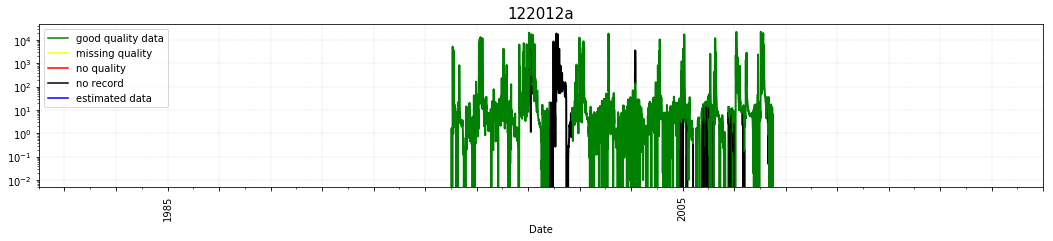

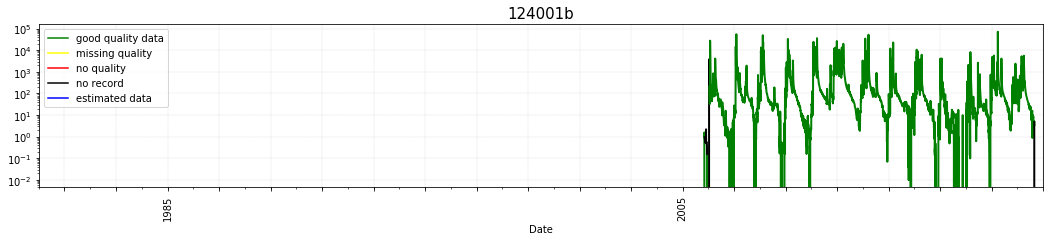

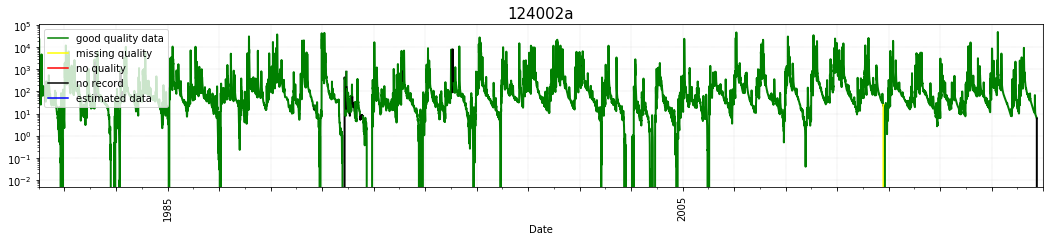

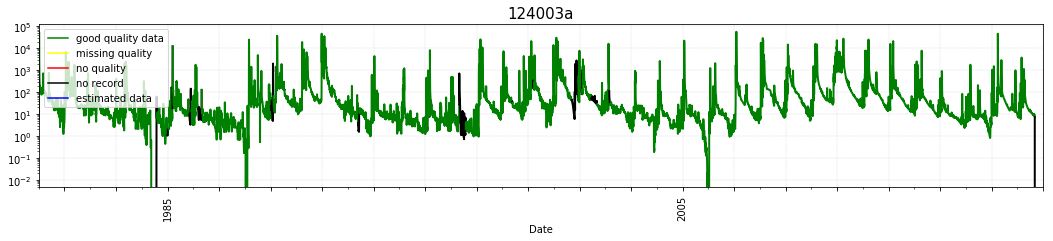

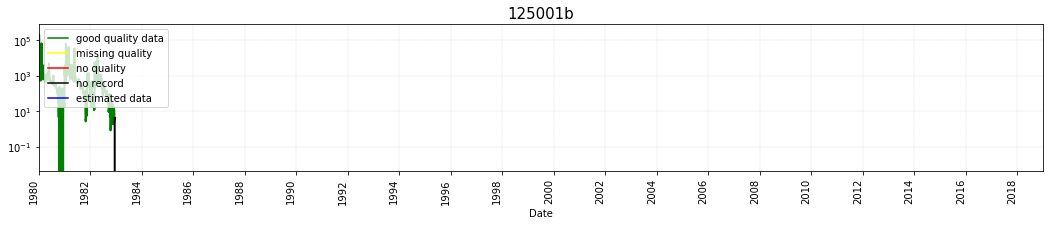

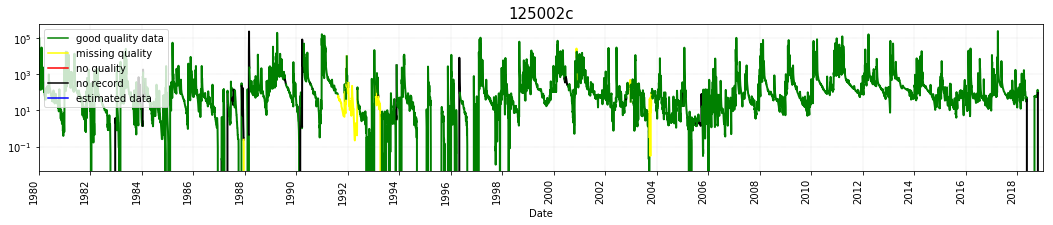

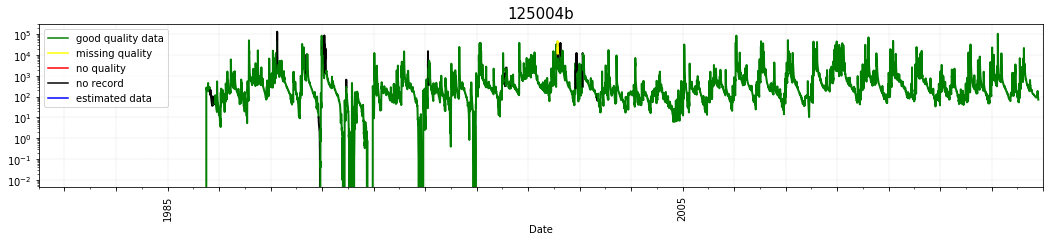

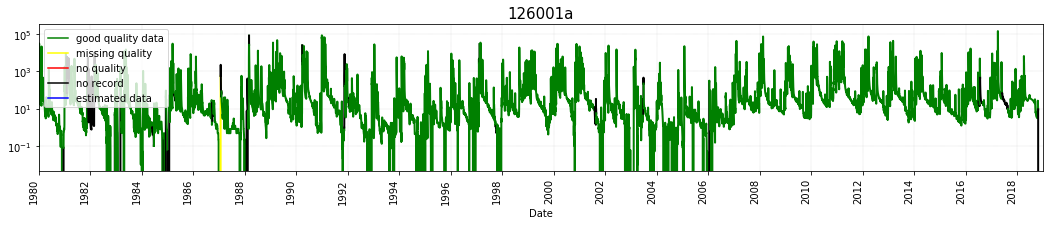

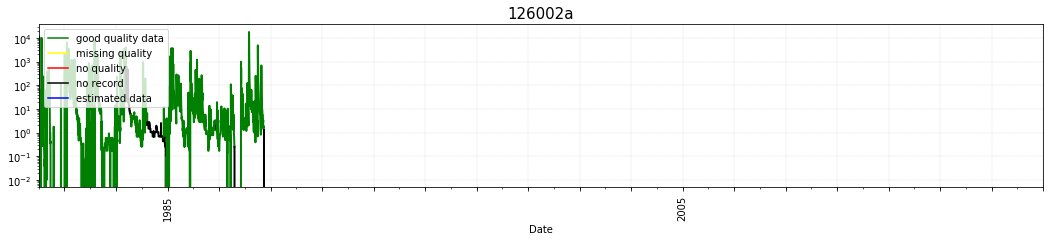

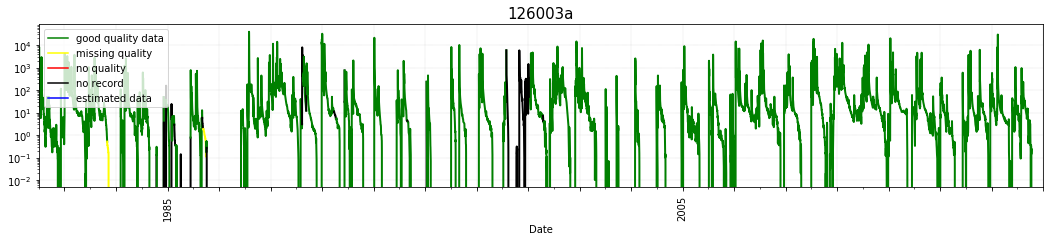

In [18]:
#EXAMPLE PLOT adapted from https://stackoverflow.com/questions/31590184/plot-multicolored-line-based-on-conditional-in-python
# use this program to go through a list of gauges and create the plots with colours assigned to quality codes

glist = ["122012a" ,"124001b" ,"124002a","124003a","125001b","125002c","125004b" ,"126001a" ,"126002a","126003a"]

for p in (glist):
    p = str(p)

    G = allgauges[[p+'_flow',p+'_qualcode',p+'_label']]

    G.columns = [p+'_flow',p+'_qualcode','label']
    #remove the nans

    #ensure there are no nans
    G.label = G.label.fillna('no data')
    G[p+'_flow'] = G[p+'_flow'].fillna(-999)
    #G421003 = G421003.dropna()


    #print(G421003)
    ## Apply labels                                      
                                                                               
    ## Convert labels to colors                                                    
    label2color = {                                                                
        'good quality data': 'green',                                           
        'estimated data': 'blue',                                          
        'no quality': 'red',                                          
        'missing data': 'yellow',
        'no data available': 'black',
        'NaN': 'black',
        'no data': 'black',
        '0': 'black',
        'nan':'black'
        }                                                                              
    G['color'] = G['label'].apply(lambda label: label2color[label])              

    #print(G421003)

    ## Create plot
    
    fig, ax = plt.subplots()                                                       
     
    
    def gen_repeating(s):                                                          
        """Generator: groups repeated elements in an iterable                      
        E.g.                                                                       
            'abbccc' -> [('a', 0, 0), ('b', 1, 2), ('c', 3, 5)]                    
        """                                                                        
        i = 0                                                                      
        while i < len(s):                                                          
            j = i                                                                  
            while j < len(s) and s[j] == s[i]:                                     
                j += 1                                                             
            yield (s[i], i, j-1)                                                   
            i = j                                                                  
                                                                               
    ## Add value lines                                                           
    for color, start, end in gen_repeating(G['color']):                           
        if start > 0: # make sure lines connect                                    
            start -= 1                                                             
        idx = G.index[start:end+1]                                                
        G.loc[idx, p+'_flow'].plot(ax=ax, color=color, label='',linewidth=2,figsize=(18,3))                  
                                                                               
               
                                                                               
    ### Get artists and labels for legend and chose which ones to display           
    handles, labels = ax.get_legend_handles_labels()                               
                                                                               
    ## Create custom artists                                                       
    g_line = plt.Line2D((0,1),(0,0), color='green')                                
    y_line = plt.Line2D((0,1),(0,0), color='yellow')                               
    r_line = plt.Line2D((0,1),(0,0), color='red')                               
    b_line = plt.Line2D((0,1),(0,0), color='black')
    bb_line = plt.Line2D((0,1),(0,0), color='blue')
                                                                               
    # Create legend from custom artist/label lists                                
    ax.legend(                                                                     
        handles + [g_line, y_line, r_line, b_line, bb_line],                                
        labels + [                                                                 
            'good quality data',                                        
            'missing quality',                                        
            'no quality', 
            'no record',
            'estimated data'                                    
            ],                                                                         
        loc='upper left',                                                                
        )                                                                              
                                                                             
    # Display plot, #save plot 
    plt.yscale('log')
    plt.title(p,fontsize=15)
    plt.grid(True, axis='y', linestyle='--', linewidth=0.2)
    plt.grid(True, axis='x', linestyle='--', linewidth=0.2)
    plt.xticks(rotation='vertical')
    plt.xlim("1980-01-01", "2018-12-31")
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    #plt.xlim(1,18)
    #plt.ylim(-0.001,0.001)
    plt.savefig('C:/MW_model/Images/'+p+'_gauge_summary_qualitycode.png', bbox_inches='tight', dpi=300)
    plt.show() 



<h1><center>I assume that the MW model with sacramento hydrology has been run and model time series for all gauges has been extracted</center></h1>

I have run the model and extracted all gauge flows (and all supply point flows that also may be gauge locations) and saved the file to:


C:/MW_model/Model_Data/modelled_gauge_flows.csv

In [26]:
## Import the modelled data corresponding to gauge sites to the notebook

Mod_gauges=pd.read_csv("C:/MW_model/Model_Data/modelled_gauge_flows.csv")
Mod_gauges['Dates']=pd.to_datetime(Mod_gauges['Date'], format="%Y/%m/%d")
#Now make the dates column as the index so we can do time series plots and analysis on it
Mod_gauges.index = Mod_gauges['Dates']
#drop colums we no longer need
Mod_gauges = Mod_gauges.drop(columns = ['Date','Dates'])

# get some basic stats on the whole modelled time series dataframe or plot it just to check
#Mod_gauges.describe()
#plt.plot(Mod_gauges)

Obs_gauges = allgauges

### Calculate model performance statistics for hydrology

The next cell describes a program to calculate correlation statistics for model hydrological performance and make some plots with the data. This is intended to provide a baseline for your existing model performance before changing anything with APSIM 


If i get time, i'll try and give this a list of gauges rather than individual ones

In [25]:
def CorrelationStats(dfo,obs_site,dfm,mod_site):

    #Compare modeleld and measured data

    #limit the analysis to the gauge in question
    dfo =dfo[obs_site]
    dfm =dfm[mod_site]
    
    #remove na values from the observed data....we could also filter for quality codes here...
    dfa = dfo.dropna()   
    
    #Join the observed and modeled dataframes (inner join to ensure only days with available records are used)
    dfd = pd.concat([dfa, dfm], axis=1, join='inner')
    
    # Percent bias
    percentbias = 100.0*sum(dfd[mod_site]-dfd[obs_site])/sum(dfd[obs_site])
    abspercbias = 100.0*sum(abs(dfd[mod_site]-dfd[obs_site]))/sum(dfd[obs_site])
    DailyRMSE = np.sqrt(np.mean((dfd[mod_site]-dfd[obs_site])**2))
    DailyNSE = 1 - sum((dfd[mod_site]-dfd[obs_site])**2)/sum((dfd[obs_site]-np.mean(dfd[obs_site]))**2)

    #convert to monthly data

    dfde = dfd.resample('M').mean()
    #remove na values from the observed data
    dfdm = dfde.dropna() 
    
    MonthlyRMSE = np.sqrt(np.mean((dfdm[mod_site]-dfdm[obs_site])**2))
    MonthlyNSE = 1 - sum((dfdm[mod_site]-dfdm[obs_site])**2)/sum((dfdm[obs_site]-np.mean(dfdm[obs_site]))**2)

    #do cumulative plots
    dfdsum = dfd.cumsum()


    print(obs_site)
    print('percent bias =',round(percentbias,2))
    #    print(abspercbias)
    print('RMSE daily flows =',round(DailyRMSE,0))
    print('Daily Nash Sutcliffe Efficiency =',round(DailyNSE,3))
    print('RMSE Monthly flows =',round(MonthlyRMSE,0))
    print('Monthly Nash Sutcliffe Efficiency =',round(MonthlyNSE,3))
    print()
    
    #Plot the time series, cumulative flows, monthly and daily x-y scatter   
    
    plt.figure(figsize=(15,5))
    plt.grid(which = 'both')
    plt.plot(dfd[obs_site])
    plt.plot(dfd[mod_site])
    plt.xlabel('Date')
    plt.ylabel('Discharge (ML/d)')
    plt.title('Modelled and measured discharge for ' + obs_site)
    plt.legend()
    
    string1 = obs_site
    newstring1 = string1.replace(" Discharge (ML/day)", "")
    
    plt.savefig("C:/MW_model/Gauge_Data/Timeseries_"+newstring1+".png", bbox_inches='tight', dpi=300)
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3 ,1)
    plt.scatter(dfd[obs_site],dfd[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfd[obs_site].max()],[0,dfd[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/d)')
    plt.ylabel('Modelled Discharge (ML/d)')
    plt.title('Daily correlation ' + obs_site)
    
    plt.subplot(1, 3, 2)
    plt.scatter(dfdm[obs_site],dfdm[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdm[obs_site].max()],[0,dfdm[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/month)')
    plt.ylabel('Modelled Discharge (ML/month)')
    plt.title('Monthly correlation ' + obs_site)
    
    plt.subplot(1, 3, 3)
    plt.scatter(dfdsum[obs_site],dfdsum[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdsum[obs_site].max()],[0,dfdsum[obs_site].max()],'r')
    plt.xlabel('Cumulative Observed discharge (ML)')
    plt.ylabel('Cumulative Modelled Discharge (ML)')
    plt.title('Cumulative ' + obs_site)
    
    plt.tight_layout()
    
    string = obs_site
    newstring = string.replace(" Discharge (ML/day)", "")
    
    plt.savefig("C:/MW_model/Gauge_Data/Corr_"+newstring+".png", bbox_inches='tight', dpi=300)
    
    #plt.scatter(obsprob,obsdata,label=obs_site)
    #plt.plot(dfdm[obs_site])
    #plt.plot(dfdm[mod_site])


122012a_flow
percent bias = 253.61
RMSE daily flows = 1239.0
Daily Nash Sutcliffe Efficiency = 0.275
RMSE Monthly flows = 925.0
Monthly Nash Sutcliffe Efficiency = -0.682

124001b_flow
percent bias = 7.5
RMSE daily flows = 1485.0
Daily Nash Sutcliffe Efficiency = 0.724
RMSE Monthly flows = 434.0
Monthly Nash Sutcliffe Efficiency = 0.896

124002a_flow
percent bias = -2.62
RMSE daily flows = 677.0
Daily Nash Sutcliffe Efficiency = 0.864
RMSE Monthly flows = 219.0
Monthly Nash Sutcliffe Efficiency = 0.932



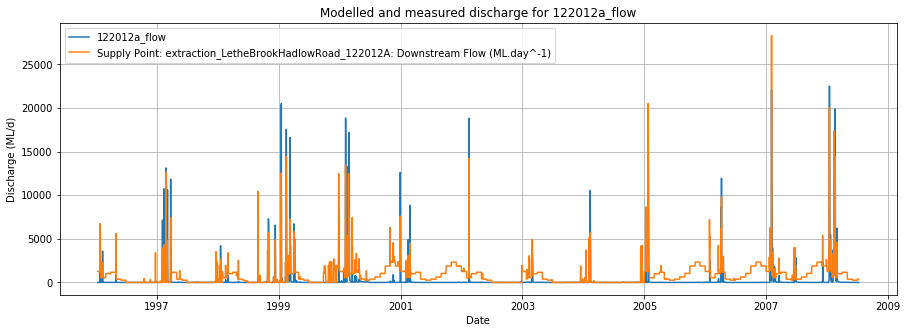

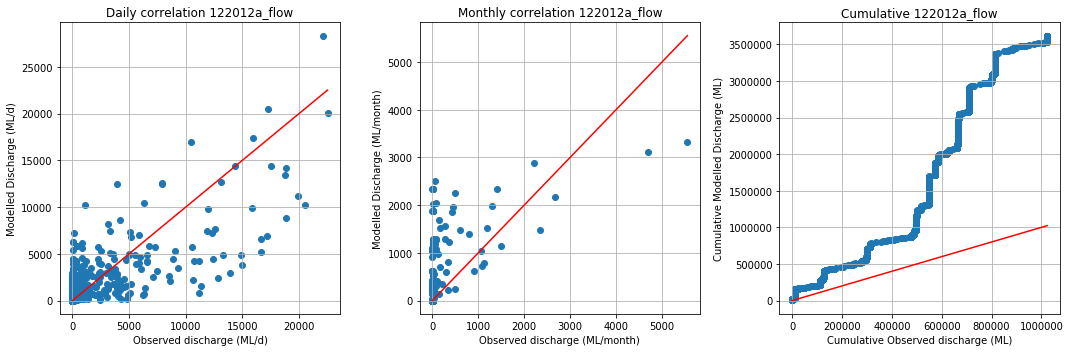

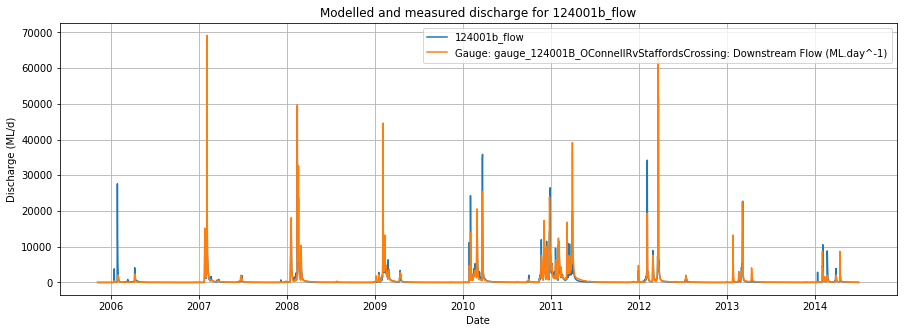

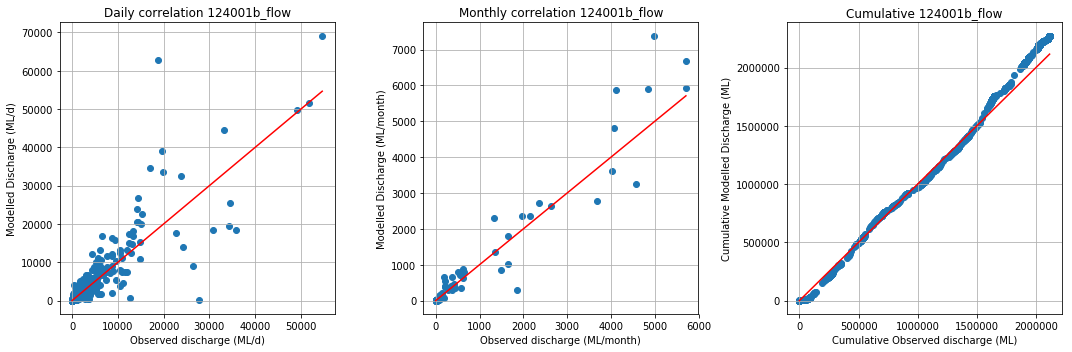

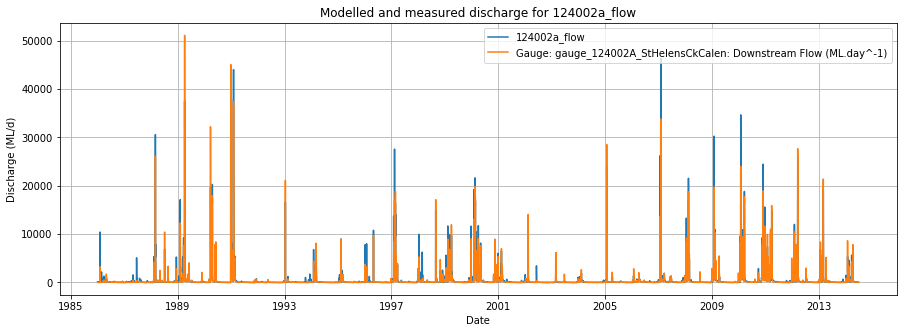

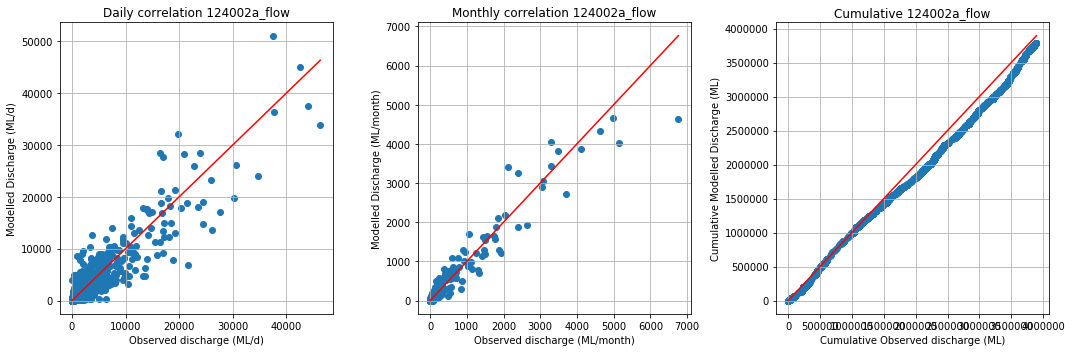

In [29]:
CorrelationStats(Obs_gauges,'122012a_flow',Mod_gauges,'Supply Point: extraction_LetheBrookHadlowRoad_122012A: Downstream Flow (ML.day^-1)')
#CorrelationStats(Obs_gauges,'122013a_flow',Mod_gauges,'Gauge: gauge_122013A_ProserpineRvGlenIsla: Downstream Flow (ML.day^-1)')
CorrelationStats(Obs_gauges,'124001b_flow',Mod_gauges,'Gauge: gauge_124001B_OConnellRvStaffordsCrossing: Downstream Flow (ML.day^-1)')
CorrelationStats(Obs_gauges,'124002a_flow',Mod_gauges,'Gauge: gauge_124002A_StHelensCkCalen: Downstream Flow (ML.day^-1)')

### can do more but will try and loop this??
#CorrelationStats(Obs_gauges,'',Mod_gauges,'')
#CorrelationStats(Obs_gauges,'',Mod_gauges,'')
#CorrelationStats(Obs_gauges,'',Mod_gauges,'')

In [31]:
# this loop is for using after APSIM sugarcane runoff has bene installed

def CorrelationStatsMod(dfo,obs_site,dfm,mod_site):

    #Compare modeleld and measured data

    #limit the analysis to the gauge in question
    dfo =dfo[obs_site]
    dfm =dfm[mod_site]
    
    #remove na values from the observed data....we could also filter for quality codes here...
    dfa = dfo.dropna()   
    
    #Join the observed and modeled dataframes (inner join to ensure only days with available records are used)
    dfd = pd.concat([dfa, dfm], axis=1, join='inner')
    
    # Percent bias
    percentbias = 100.0*sum(dfd[mod_site]-dfd[obs_site])/sum(dfd[obs_site])
    abspercbias = 100.0*sum(abs(dfd[mod_site]-dfd[obs_site]))/sum(dfd[obs_site])
    DailyRMSE = np.sqrt(np.mean((dfd[mod_site]-dfd[obs_site])**2))
    DailyNSE = 1 - sum((dfd[mod_site]-dfd[obs_site])**2)/sum((dfd[obs_site]-np.mean(dfd[obs_site]))**2)

    #convert to monthly data

    dfde = dfd.resample('M').mean()
    #remove na values from the observed data
    dfdm = dfde.dropna() 
    
    MonthlyRMSE = np.sqrt(np.mean((dfdm[mod_site]-dfdm[obs_site])**2))
    MonthlyNSE = 1 - sum((dfdm[mod_site]-dfdm[obs_site])**2)/sum((dfdm[obs_site]-np.mean(dfdm[obs_site]))**2)

    #do cumulative plots
    dfdsum = dfd.cumsum()


    print(obs_site)
    print('percent bias =',round(percentbias,2))
    #    print(abspercbias)
    print('RMSE daily flows =',round(DailyRMSE,0))
    print('Daily Nash Sutcliffe Efficiency =',round(DailyNSE,3))
    print('RMSE Monthly flows =',round(MonthlyRMSE,0))
    print('Monthly Nash Sutcliffe Efficiency =',round(MonthlyNSE,3))
    print()
    
    #Plot the time series, cumulative flows, monthly and daily x-y scatter   
    
    plt.figure(figsize=(15,5))
    plt.grid(which = 'both')
    plt.plot(dfd[obs_site])
    plt.plot(dfd[mod_site])
    plt.xlabel('Date')
    plt.ylabel('Discharge (ML/d)')
    plt.title('Modelled and measured discharge for ' + obs_site)
    plt.legend()
    
    string1 = obs_site
    newstring1 = string1.replace(" Discharge (ML/day)", "")
    
    plt.savefig("C:/MW_model/Gauge_Data/Timeseries_"+newstring1+".png", bbox_inches='tight', dpi=300)
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3 ,1)
    plt.scatter(dfd[obs_site],dfd[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfd[obs_site].max()],[0,dfd[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/d)')
    plt.ylabel('Modelled Discharge (ML/d)')
    plt.title('Daily correlation ' + obs_site)
    
    plt.subplot(1, 3, 2)
    plt.scatter(dfdm[obs_site],dfdm[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdm[obs_site].max()],[0,dfdm[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/month)')
    plt.ylabel('Modelled Discharge (ML/month)')
    plt.title('Monthly correlation ' + obs_site)
    
    plt.subplot(1, 3, 3)
    plt.scatter(dfdsum[obs_site],dfdsum[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdsum[obs_site].max()],[0,dfdsum[obs_site].max()],'r')
    plt.xlabel('Cumulative Observed discharge (ML)')
    plt.ylabel('Cumulative Modelled Discharge (ML)')
    plt.title('Cumulative ' + obs_site)
    
    plt.tight_layout()
    
    string = obs_site
    newstring = string.replace(" Discharge (ML/day)", "")
    
    plt.savefig("C:/MW_model/Gauge_Data/APSIM_Corr_"+newstring+".png", bbox_inches='tight', dpi=300)
    
    #plt.scatter(obsprob,obsdata,label=obs_site)
    #plt.plot(dfdm[obs_site])
    #plt.plot(dfdm[mod_site])


<h1><center>HAVE NOT RUN ANYTHING BELOW HERE</center></h1>

In [12]:
## Import the modelled data corresponding to gauge sites to the notebook

Mod_gauges=pd.read_csv("C:/Tully/Modelled_Flows_ML-d.csv",parse_dates=['Date'])
#Now make the dates column as the index so we can do time series plots and analysis on it
Mod_gauges.index = Mod_gauges.Date

# Remove the Date column from the data columns
del Mod_gauges['Date']

# get some basic stats on the whole modelled time series dataframe
#Mod_gauges.describe()

In [13]:
# Load in the APSIM Dates to append to the time series dataframes (mm/dd/yyyy)
APSIMDates=pd.read_csv("C:/Tully/APSIMDates.csv",parse_dates=['Date'])

In [14]:
#Combine the APSIM drainage into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data drainage file names  y searching the directory
path =r'C:\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*Drainage.csv")

#save out the drainage file name list
#DrainageFiles = glob.glob("*Drainage.csv")
DrainageFiles = [os.path.basename(x) for x in glob.glob(path + "/*Drainage.csv")]

#manipulate the file names a bit
DrainageFiles = [w.replace('$sugarcane$', ' ') for w in DrainageFiles]

np.savetxt("C:/Tully/DrainageNames.csv", DrainageFiles, delimiter=",", fmt='%s')


drainagedfs = []
for filename in filenames:
    drainagedfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
Drainage = pd.concat(drainagedfs, axis=1)

#remove all the date columns
DrainageData=Drainage.drop(Drainage.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
DrainageData.columns = [DrainageFiles]

#Append one column of dates back on to the data file to make the time series file
DrainageTimeseries = pd.concat([APSIMDates, DrainageData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
DrainageTimeseries.index = DrainageTimeseries.Date

#export the drainage time series file with the dates column to CSV
DrainageTimeseries.to_csv("C:/Tully/DrainageTimeseries_mm-d.csv", index=False)

# Remove the Date column from the data columns
del DrainageTimeseries['Date']


In [16]:
#Combine the APSIM runoff into a single dataframe
# get data runoff file names
path =r'C:\Tully\Raw_Accummulated_APSIM'
rfilenames = glob.glob(path + "/*runoff.csv")

#save out the runoff file name list
RunoffFiles = [os.path.basename(x) for x in glob.glob(path + "/*runoff.csv")]

#manipulate the file names a bit
RunoffFiles = [w.replace('$sugarcane$', ' ') for w in RunoffFiles]

np.savetxt("C:/Tully/RunoffNames.csv", RunoffFiles, delimiter=",", fmt='%s')

runoffdfs = []
for rfilename in rfilenames:
    runoffdfs.append(pd.read_csv(rfilename))

# Concatenate all data into one DataFrame on the date axis
Runoff = pd.concat(runoffdfs, axis=1)

#remove all the date columns
RunoffData=Runoff.drop(Runoff.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
RunoffData.columns = [RunoffFiles]

#Append one column of dates back on to the data file to make the time series file
RunoffTimeseries = pd.concat([APSIMDates, RunoffData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
RunoffTimeseries.index = RunoffTimeseries.Date

#export the drainage time series file with the dates column to CSV
RunoffTimeseries.to_csv("C:/Tully/RunoffTimeseries_mm-d.csv", index=False)

# Remove the Date column from the data columns
del RunoffTimeseries['Date']


In [7]:
# Quick check of the drainage data
#DrainageTimeseries.describe()

In [8]:
#Quick check of the runoff data
#RunoffTimeseries.describe()

### Make some basic time series charts of the data

A time series plot of each measured and modelled pair will be prepared in both standard and log scale. Examples are provided where the date axis of the plots are limited using the "plt.xlim("1986-01-01", "2014-06-30")" code. This only limits the x scale, not the dataframe used for the analysis. Several examples are provided

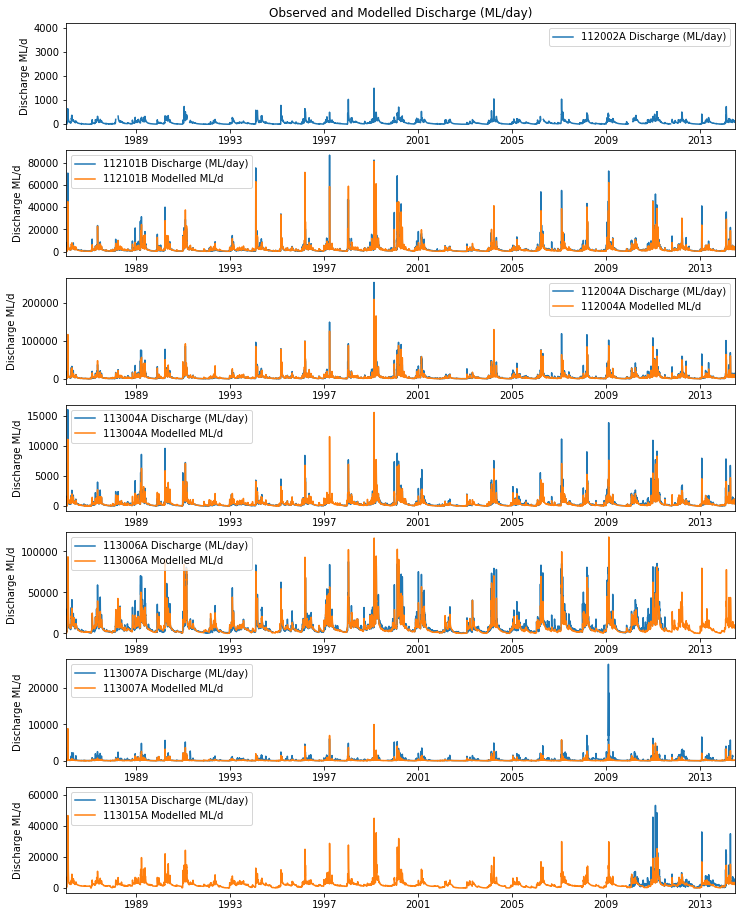

In [17]:
# Create a basic time series plots of the observed and gauged data and show it

G112002A = Obs_gauges['112002A Discharge (ML/day)']
G112101B = Obs_gauges['112101B Discharge (ML/day)']
G112004A = Obs_gauges['112004A Discharge (ML/day)']
G113004A = Obs_gauges['113004A Discharge (ML/day)']
G113006A = Obs_gauges['113006A Discharge (ML/day)']
G113007A = Obs_gauges['113007A Discharge (ML/day)']
G113015A = Obs_gauges['113015A Discharge (ML/day)']

#O112002A = Obs_gauges['112002A ML/d']
O112101B = Mod_gauges['112101B Modelled ML/d']
O112004A = Mod_gauges['112004A Modelled ML/d']
O113004A = Mod_gauges['113004A Modelled ML/d']
O113006A = Mod_gauges['113006A Modelled ML/d']
O113007A = Mod_gauges['113007A Modelled ML/d']
O113015A = Mod_gauges['113015A Modelled ML/d']
#Extra gauges in model
#1120049 ML/d 
#112102A ML/d
#113004A ML/d
#1120054 ML/d


plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')

#plt.figure(1)
ax1 = plt.subplot(711)
plt.plot(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()

ax2 = plt.subplot(712, sharex=ax1)
plt.plot(G112101B)
plt.plot(O112101B)
plt.ylabel('Discharge ML/d')
plt.legend()

ax3 = plt.subplot(713, sharex=ax1)
plt.plot(G112004A)
plt.plot(O112004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax4 = plt.subplot(714, sharex=ax1)
plt.plot(G113004A)
plt.plot(O113004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax5 = plt.subplot(715, sharex=ax1)
plt.plot(G113006A)
plt.plot(O113006A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax6 = plt.subplot(716, sharex=ax1)
plt.plot(G113007A)
plt.plot(O113007A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax7 = plt.subplot(717, sharex=ax1)
plt.plot(G113015A)
plt.plot(O113015A)
plt.ylabel('Discharge ML/d')
plt.legend()

plt.xlim("1986-01-01", "2014-06-30")

plt.savefig('C:/Tully/Gauge_Data/gauge_summary.png', bbox_inches='tight', dpi=300)

(732312.0, 735414.0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


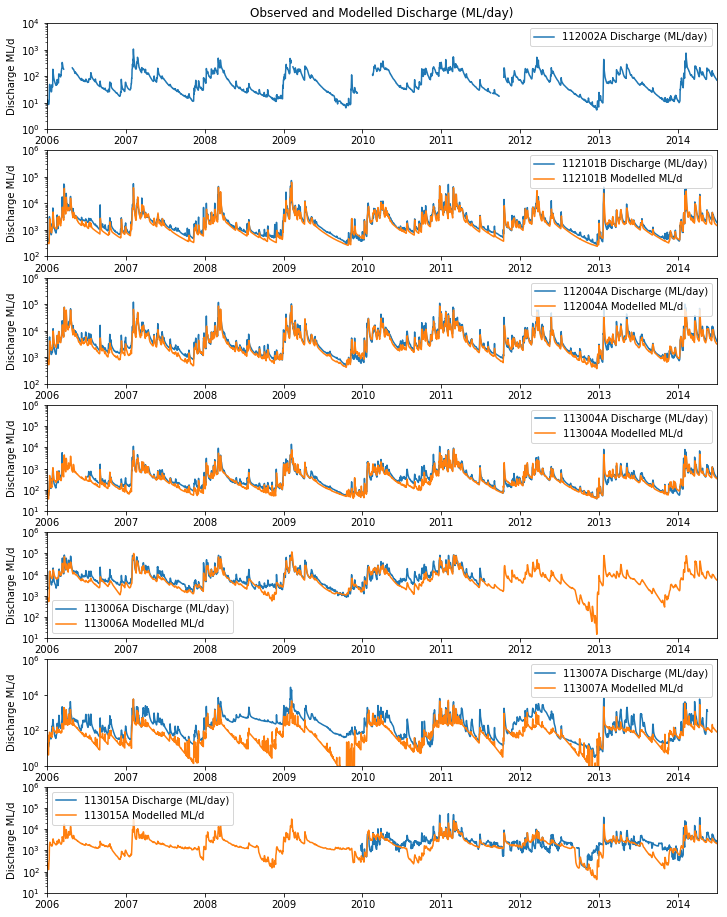

In [18]:
##Now we'll plot the same data, only in log scale and for a shorter period

plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')


#plt.figure(1)
ax1 = plt.subplot(711)
plt.semilogy(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 10000)
plt.xlim([1984, 2015])

ax2 = plt.subplot(712, sharex=ax1)
plt.semilogy(G112101B)
plt.semilogy(O112101B)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax3 = plt.subplot(713, sharex=ax1)
plt.semilogy(G112004A)
plt.semilogy(O112004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax4 = plt.subplot(714, sharex=ax1)
plt.semilogy(G113004A)
plt.semilogy(O113004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax5 = plt.subplot(715, sharex=ax1)
plt.semilogy(G113006A)
plt.semilogy(O113006A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax6 = plt.subplot(716, sharex=ax1)
plt.semilogy(G113007A)
plt.semilogy(O113007A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 1000000)

ax7 = plt.subplot(717, sharex=ax1)
plt.semilogy(G113015A)
plt.semilogy(O113015A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

plt.xlim("2006-01-01", "2014-06-30")

(733773.0, 734684.0)

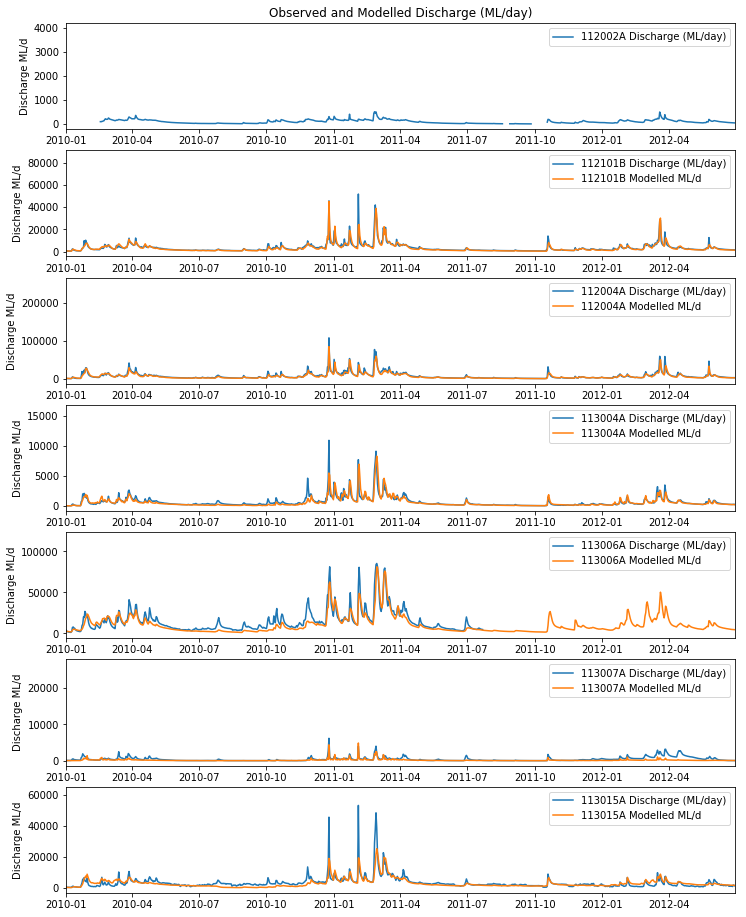

In [19]:
plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')

#plt.figure(1)
ax1 = plt.subplot(711)
plt.plot(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()

ax2 = plt.subplot(712, sharex=ax1)
plt.plot(G112101B)
plt.plot(O112101B)
plt.ylabel('Discharge ML/d')
plt.legend()

ax3 = plt.subplot(713, sharex=ax1)
plt.plot(G112004A)
plt.plot(O112004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax4 = plt.subplot(714, sharex=ax1)
plt.plot(G113004A)
plt.plot(O113004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax5 = plt.subplot(715, sharex=ax1)
plt.plot(G113006A)
plt.plot(O113006A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax6 = plt.subplot(716, sharex=ax1)
plt.plot(G113007A)
plt.plot(O113007A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax7 = plt.subplot(717, sharex=ax1)
plt.plot(G113015A)
plt.plot(O113015A)
plt.ylabel('Discharge ML/d')
plt.legend()

plt.xlim("2010-01-01", "2012-06-30")

### Calculate and plot flow duration curves

The next few cells calculate the flow duration curves for measured and modelled time series. In this example, we make a program that can be called later on in the notebook. 

The steps to creating the FDCs is to first limit the observed time series to the model period to ensure we are comparing the same time periods, remove na values, sort and rank the values, calculate probabilities and then plot the data

In [12]:
# This is now redundant code.......
# first we limit the observed data to the available modelled data period
# Limited_obs=Obs_gauges.truncate('1986-01-01', '2014-06-30')
# Check that it has done what we thought it should
# Limited_obs.plot()

In [20]:
def FlowDurationCurve(dfo,obs_site,dfm,mod_site,begyear,endyear):

#    Generate observed and modelled flow duration curve for hydrologic time series data
    
#    FlowDurationCurve = pandas dataframe containing data
#    Obs_site = column within dataframe that contains the observed flow values
#    Mod_site = column within dataframe that contains the modelled flow values
#    begyear = start year for analysis
#    endyear = end year for analysis

#trim the time series to beginning and end dates
    obsdata = dfo[(dfo.index.to_datetime() > pd.datetime(begyear,1,1))&(dfo.index.to_datetime() < pd.datetime(endyear,1,1))]
    moddata = dfm[(dfm.index.to_datetime() > pd.datetime(begyear,1,1))&(dfm.index.to_datetime() < pd.datetime(endyear,1,1))]

#remove na values from the observed data
    obsdata = obsdata[obs_site].dropna().values
    moddata = moddata[mod_site].dropna().values

#Sort and rank the observed and modelled data    
    obsdata = np.sort(obsdata)
    moddata = np.sort(moddata)
    
    obsranks = sp.rankdata(obsdata, method='ordinal')
    obsranks = obsranks[::-1]

    modranks = sp.rankdata(moddata, method='ordinal')
    modranks = modranks[::-1]

#calculate the probabilities    
    obsprob = [100*(obsranks[i]/(len(obsdata)+1)) for i in range(len(obsdata)) ]
    modprob = [100*(modranks[i]/(len(moddata)+1)) for i in range(len(moddata)) ]
    
#Plot the flow duration curves data    
    plt.figure(figsize=(12,6))
    plt.scatter(obsprob,obsdata,label=obs_site)
    plt.scatter(modprob,moddata,label=mod_site)
    plt.yscale('log')
    plt.grid(which = 'both')
    plt.xlabel('% of time that indicated discharge was exceeded or equaled')
    plt.ylabel('discharge (ML/d)')
    plt.xticks(range(0,100,5))
    plt.title('Flow duration curve for ' + obs_site)
    
    string = obs_site
    newstring = string.replace(" Discharge (ML/day)", "")
    
    plt.savefig("C:/Tully/Gauge_Data/FDC_"+newstring+".png", bbox_inches='tight', dpi=300)
# output the data?? TBC

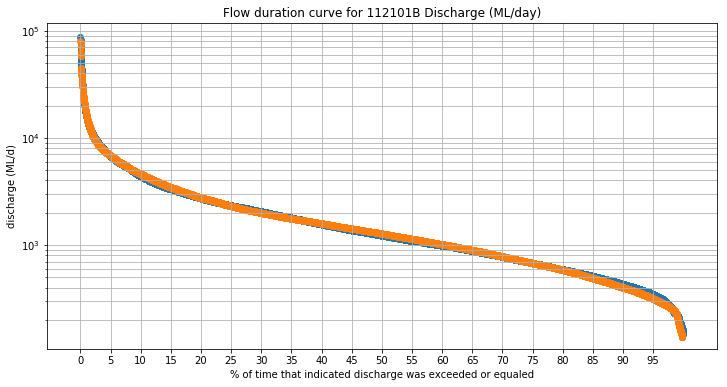

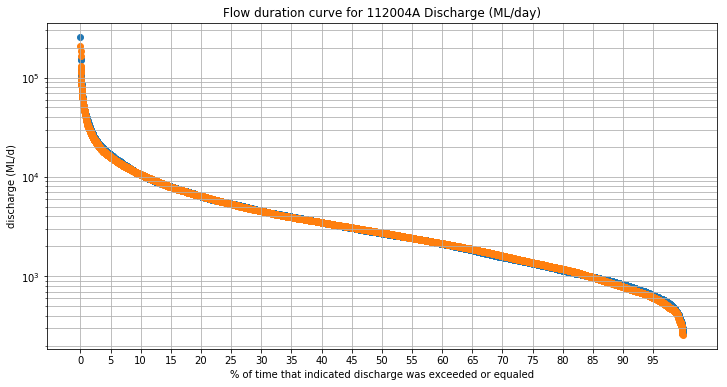

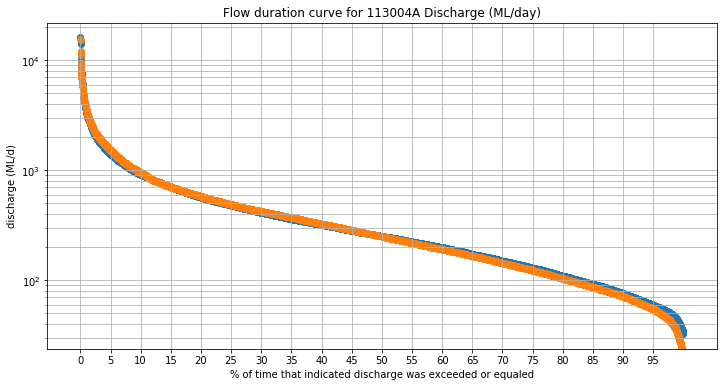

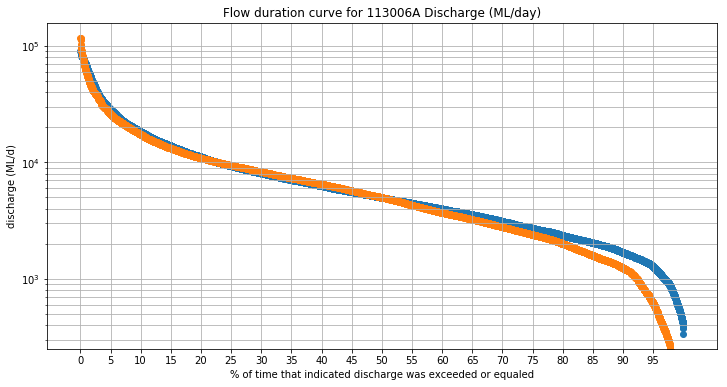

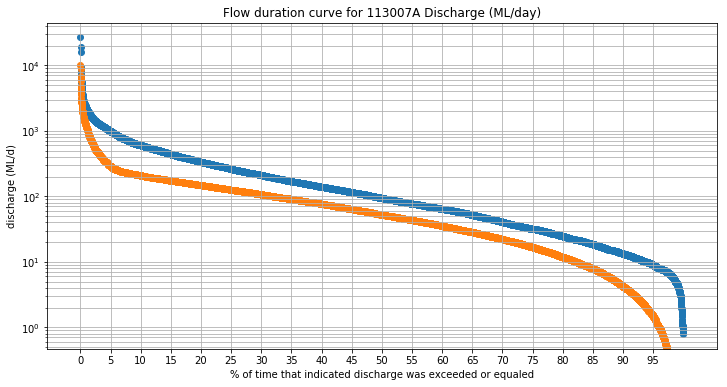

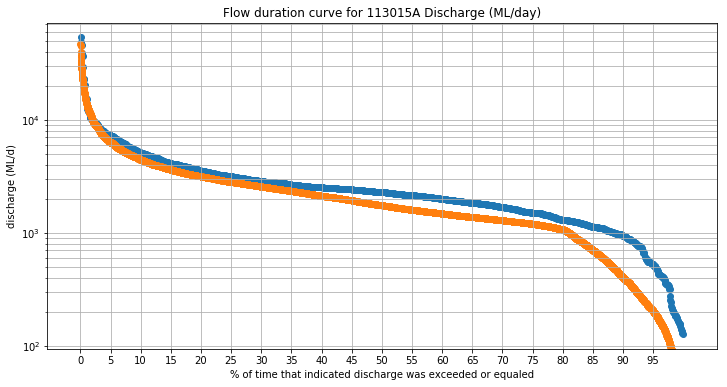

In [21]:
# Calculate and plot the modelled and measured flow duration curves

FlowDurationCurve(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'112004A Discharge (ML/day)',Mod_gauges,'112004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113004A Discharge (ML/day)',Mod_gauges,'113004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113006A Discharge (ML/day)',Mod_gauges,'113006A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113007A Discharge (ML/day)',Mod_gauges,'113007A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113015A Discharge (ML/day)',Mod_gauges,'113015A Modelled ML/d',1986, 2014)


### Calculate model performance statistics for hydrology

The next describes a program to calculate correlation statistics for model hydrological performance and make some plots with the data. 



In [22]:
def CorrelationStats(dfo,obs_site,dfm,mod_site):

    #Compare modeleld and measured data

    #limit the analysis to the gauge in question
    dfo =dfo[obs_site]
    dfm =dfm[mod_site]
    
    #remove na values from the observed data
    dfa = dfo.dropna()   
    
    #Join the observed and modeled dataframes
    dfd = pd.concat([dfa, dfm], axis=1, join='inner')
    
    # Percent bias
    percentbias = 100.0*sum(dfd[mod_site]-dfd[obs_site])/sum(dfd[obs_site])
    abspercbias = 100.0*sum(abs(dfd[mod_site]-dfd[obs_site]))/sum(dfd[obs_site])
    DailyRMSE = np.sqrt(np.mean((dfd[mod_site]-dfd[obs_site])**2))
    DailyNSE = 1 - sum((dfd[mod_site]-dfd[obs_site])**2)/sum((dfd[obs_site]-np.mean(dfd[obs_site]))**2)

#convert to monthly data

    dfde = dfd.resample('M').mean()
    #remove na values from the observed data
    dfdm = dfde.dropna() 
    
    MonthlyRMSE = np.sqrt(np.mean((dfdm[mod_site]-dfdm[obs_site])**2))
    MonthlyNSE = 1 - sum((dfdm[mod_site]-dfdm[obs_site])**2)/sum((dfdm[obs_site]-np.mean(dfdm[obs_site]))**2)

#do cumulative plots
    dfdsum = dfd.cumsum()


    print(obs_site)
    print('percent bias =',round(percentbias,2))
    #    print(abspercbias)
    print('RMSE daily flows =',round(DailyRMSE,0))
    print('Daily Nash Sutcliffe Efficiency =',round(DailyNSE,3))
    print('RMSE Monthly flows =',round(MonthlyRMSE,0))
    print('Monthly Nash Sutcliffe Efficiency =',round(MonthlyNSE,3))
    print()
    
    #Plot the time series, cumulative flows, monthly and daily x-y scatter   
    
    plt.figure(figsize=(15,5))
    plt.grid(which = 'both')
    plt.plot(dfd[obs_site])
    plt.plot(dfd[mod_site])
    plt.xlabel('Date')
    plt.ylabel('Discharge (ML/d)')
    plt.title('Modelled and measured discharge for ' + obs_site)
    plt.legend()
    
    string1 = obs_site
    newstring1 = string1.replace(" Discharge (ML/day)", "")
    
    plt.savefig("C:/Tully/Gauge_Data/Timeseries_"+newstring1+".png", bbox_inches='tight', dpi=300)
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3 ,1)
    plt.scatter(dfd[obs_site],dfd[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfd[obs_site].max()],[0,dfd[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/d)')
    plt.ylabel('Modelled Discharge (ML/d)')
    plt.title('Daily correlation ' + obs_site)
    
    plt.subplot(1, 3, 2)
    plt.scatter(dfdm[obs_site],dfdm[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdm[obs_site].max()],[0,dfdm[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/month)')
    plt.ylabel('Modelled Discharge (ML/month)')
    plt.title('Monthly correlation ' + obs_site)
    
    plt.subplot(1, 3, 3)
    plt.scatter(dfdsum[obs_site],dfdsum[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdsum[obs_site].max()],[0,dfdsum[obs_site].max()],'r')
    plt.xlabel('Cumulative Observed discharge (ML)')
    plt.ylabel('Cumulative Modelled Discharge (ML)')
    plt.title('Cumulative ' + obs_site)
    
    plt.tight_layout()
    
    string = obs_site
    newstring = string.replace(" Discharge (ML/day)", "")
    
    plt.savefig("C:/Tully/Gauge_Data/Corr_"+newstring+".png", bbox_inches='tight', dpi=300)
    
    #plt.scatter(obsprob,obsdata,label=obs_site)
    #plt.plot(dfdm[obs_site])
    #plt.plot(dfdm[mod_site])


Test the program on a single gauge site before rolling out to all sites

112101B Discharge (ML/day)
percent bias = -1.34
RMSE daily flows = 1793.0
Daily Nash Sutcliffe Efficiency = 0.785
RMSE Monthly flows = 468.0
Monthly Nash Sutcliffe Efficiency = 0.961



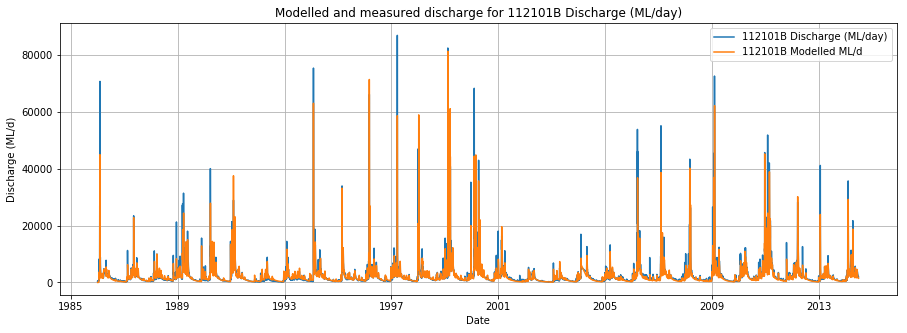

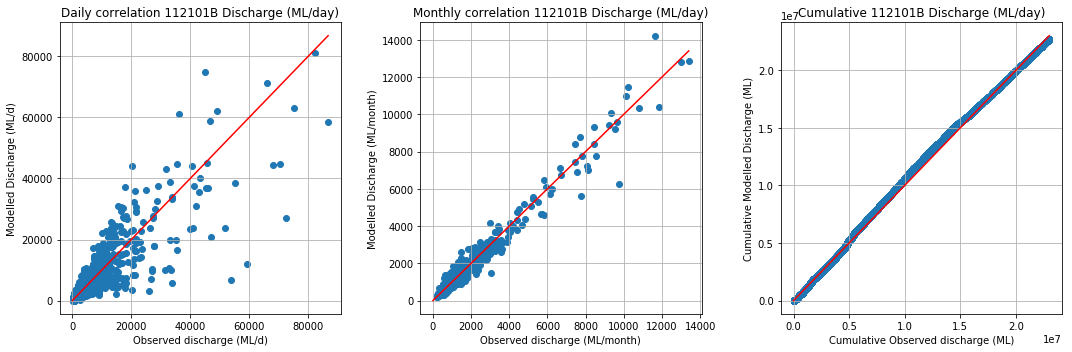

In [23]:
CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')

Now calculate the stats for all sites

112101B Discharge (ML/day)
percent bias = -1.34
RMSE daily flows = 1793.0
Daily Nash Sutcliffe Efficiency = 0.785
RMSE Monthly flows = 468.0
Monthly Nash Sutcliffe Efficiency = 0.961

112004A Discharge (ML/day)
percent bias = -1.87
RMSE daily flows = 3650.0
Daily Nash Sutcliffe Efficiency = 0.817
RMSE Monthly flows = 975.0
Monthly Nash Sutcliffe Efficiency = 0.968

113004A Discharge (ML/day)
percent bias = -0.94
RMSE daily flows = 421.0
Daily Nash Sutcliffe Efficiency = 0.68
RMSE Monthly flows = 145.0
Monthly Nash Sutcliffe Efficiency = 0.907

113006A Discharge (ML/day)
percent bias = -2.01
RMSE daily flows = 4363.0
Daily Nash Sutcliffe Efficiency = 0.85
RMSE Monthly flows = 2481.0
Monthly Nash Sutcliffe Efficiency = 0.911

113007A Discharge (ML/day)
percent bias = -56.25
RMSE daily flows = 502.0
Daily Nash Sutcliffe Efficiency = 0.31
RMSE Monthly flows = 326.0
Monthly Nash Sutcliffe Efficiency = 0.273

113015A Discharge (ML/day)
percent bias = -17.24
RMSE daily flows = 2356.0
Daily Na

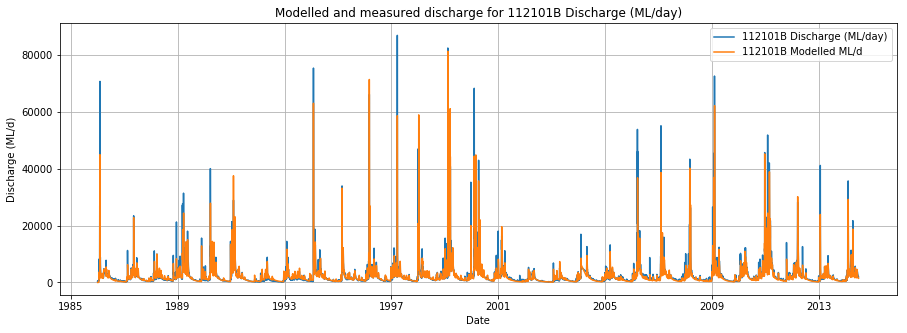

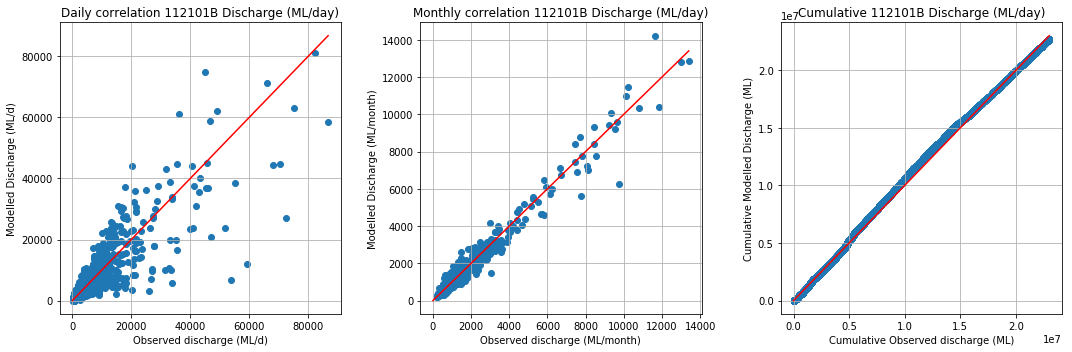

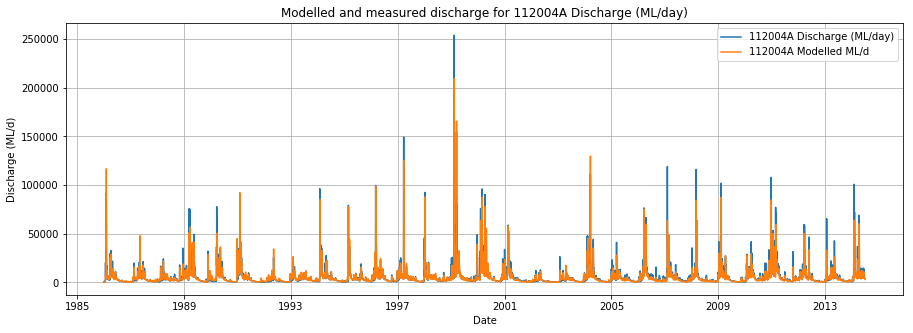

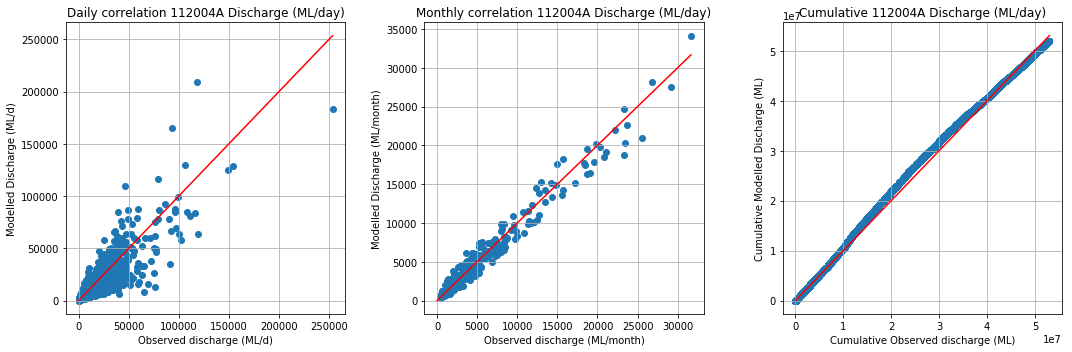

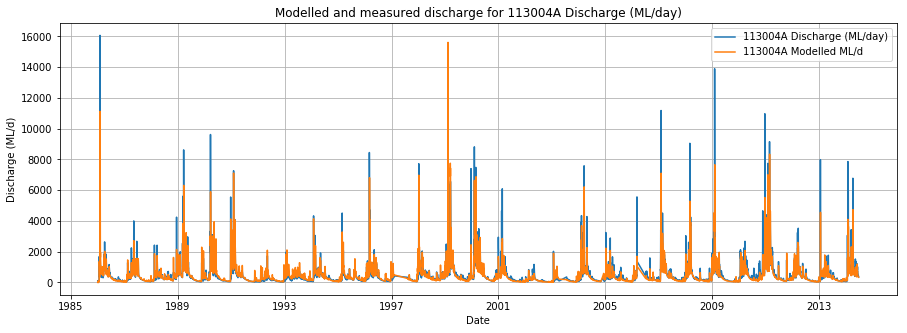

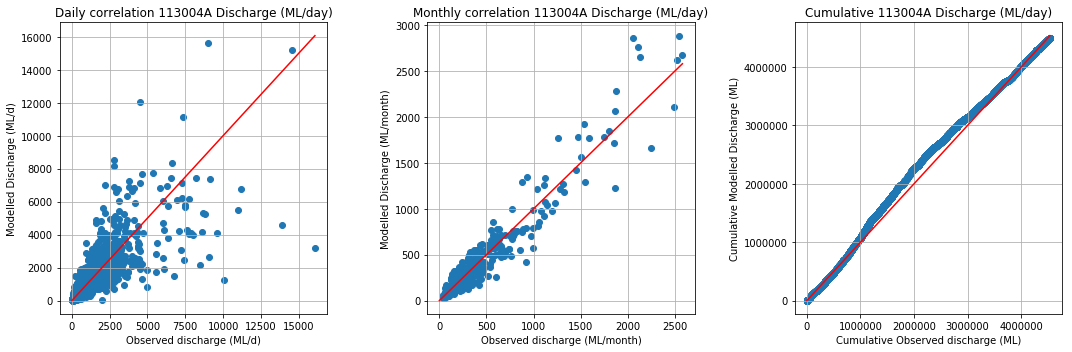

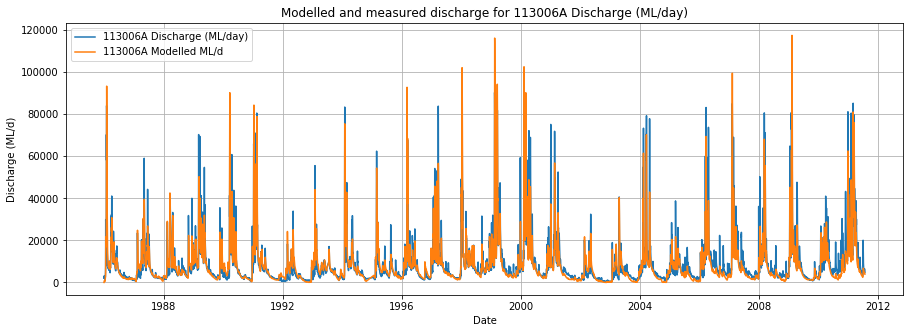

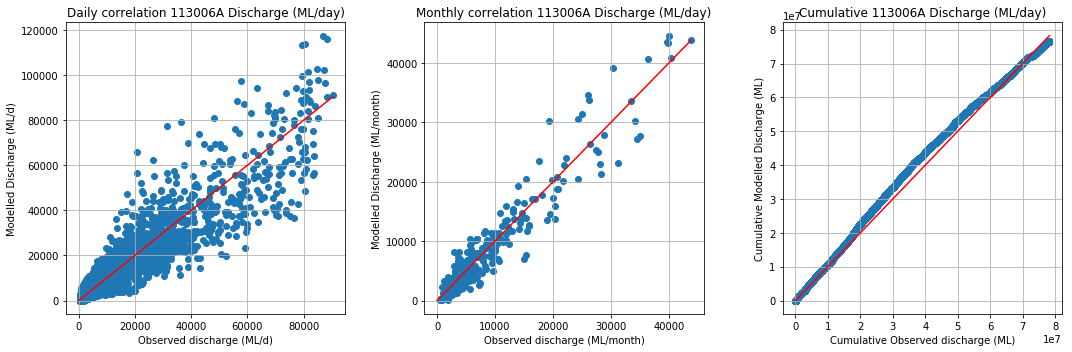

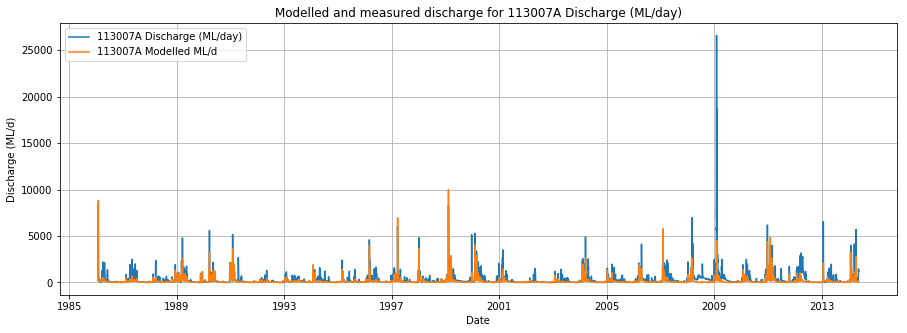

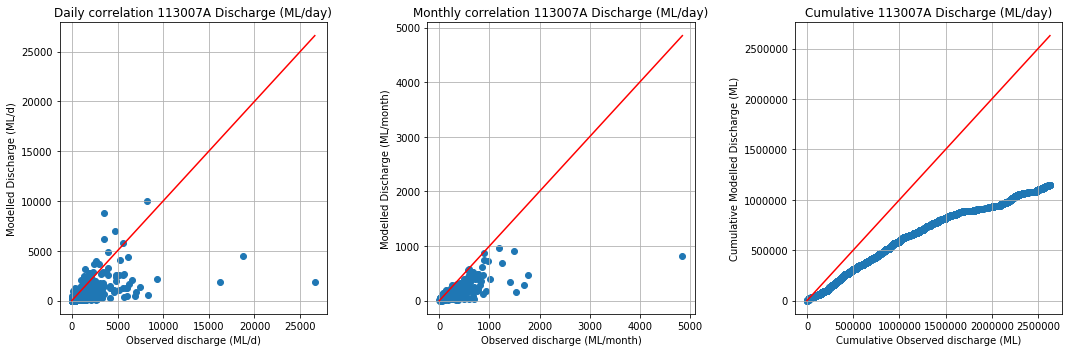

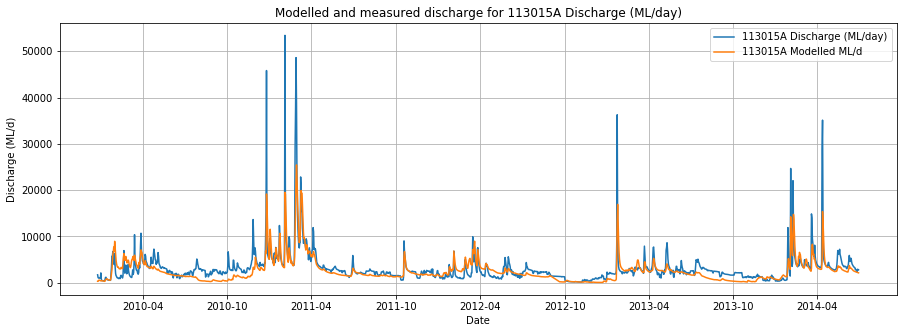

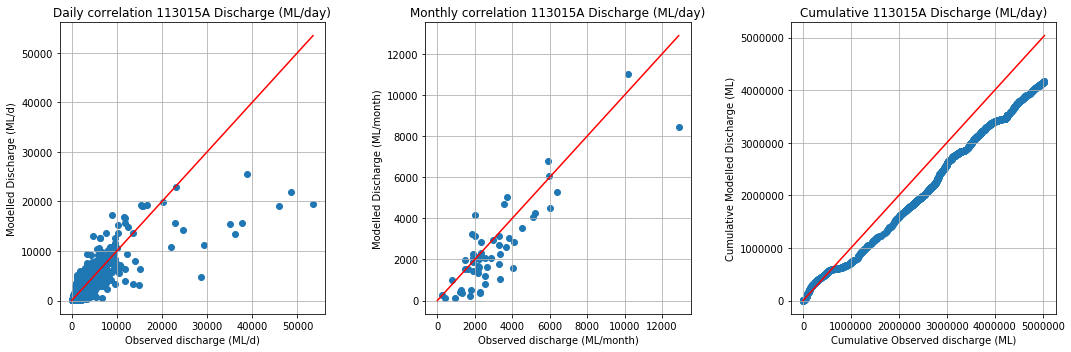

In [24]:
# Calculate and plot the modelled and measured daily statistics

CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')
CorrelationStats(Obs_gauges,'112004A Discharge (ML/day)',Mod_gauges,'112004A Modelled ML/d')
CorrelationStats(Obs_gauges,'113004A Discharge (ML/day)',Mod_gauges,'113004A Modelled ML/d')
CorrelationStats(Obs_gauges,'113006A Discharge (ML/day)',Mod_gauges,'113006A Modelled ML/d')
CorrelationStats(Obs_gauges,'113007A Discharge (ML/day)',Mod_gauges,'113007A Modelled ML/d')
CorrelationStats(Obs_gauges,'113015A Discharge (ML/day)',Mod_gauges,'113015A Modelled ML/d')


<h1><center></center></h1>
<h1><center>Part 3: Calculating plugin parameters for runoff and drainage</center></h1>

In this module, the model generated sacramento sugarcane FU runoff for every subcatchment in the model is imported to the notebook. In this case, we import both the total runoff and baseflow so that we can look at the ratio of baseflow to total runoff for the current model and compare this to the sacramento proportions we are looking to include to match it. 

The first couple of cells in this module are focussed on file manipulation of the modelled the series. This is to allow us to use some simple text string recognition code elements to match up APSIM and Source time series. The main routine that follows (Sac_surface_runoff) then loops through the list of subcatchments, searching first for regions, then subcatchments to multiply the sacramento modelled total runoff (mm) by area to get total runoff by region. The same is done for APSIM runoff and drainage time series. A key to this process is a reference file with subcatchment number, area and region, in addition to the sacramento paremeters. An example of this key file is attached with the files of this notebook. 

The Sac_surface_runoff routine then sums up the runoff by region and calculates the amount of APSIM drainage to add so that the total APSIM runoff matches the total Sacramento runoff. The resultant output is DR, the drainage delivery ratio that can be entered directlybv in the plugin in addition to the DSE and SSE (drainage store emptying ratio and surface store emptying ratio) which are taken directly from the regionalised sacramento parameters. 

In [8]:
## Import the Sacramento Sugarcane runoff (total) and baseflow time series from the model. 

Sac_cane=pd.read_csv("C:/CRPL/0069_APSIM_2_Source/model_data/sac_sugarcane_flows.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
Sac_cane.index = Sac_cane.Date

# Remove the Date column from the data columns
del Sac_cane['Date']

# get some basic stats on the whole modelled time series dataframe
#Sac_cane.describe()

#Drop the colums that have no data. only do this afer loading the data. 
Sac_cane.drop([col for col, val in Sac_cane.sum().iteritems() if val < 0.01], axis=1, inplace=True)
#Sac_cane.describe()

#Export the new dataframe - do this if you want to check the data
#Sac_cane.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/Sac_cane_mm-d.csv", index=True)

Sac_col_list = list(Sac_cane)
#print(Sac_col_list)
Sac_col_list1 = [word.replace('sugarcane > ', '') for word in Sac_col_list]
#print(Sac_col_list1)

#Rename the columns according to the file names in the new list so we dont get confused on which file is which
Sac_cane.columns = [Sac_col_list1]
Sac_cane.describe()


Sugarcane > SC #99 > Runoff (none) Sugarcane > SC #99 > Baseflow (none)  \
count                         10408.0000                           10408.0000   
mean                              1.5671                               0.2256   
std                              11.8613                               0.7969   
min                               0.0000                               0.0000   
25%                               0.0000                               0.0000   
50%                               0.0000                               0.0000   
75%                               0.0663                               0.0541   
max                             477.9438                               5.7953   

      Sugarcane > SC #98 > Runoff (none) Sugarcane > SC #98 > Baseflow (none)  \
count                         10408.0000                           10408.0000   
mean                              1.5244                               0.2185   
std                              11.7250                               0.7876   
min                               0.0000                               0.0000   
25%                               0.0000                               0.0000   
50%                               0.0000                               0.0000   
75%                               0.0590                               0.0467   
max                             419.0205                               5.7911   

      Sugarcane > SC #97 > Runoff (none) Sugarcane > SC #97 > Baseflow (none)  \
count                         10408.0000                           10408.0000   
mean                              1.4916                               0.2218   
std                              11.3860                               0.7872   
min                               0.0000                               0.0000   
25%                               0.0000                               0.0000   
50%                               0.0000                               0.0000   
75%                               0.0647                               0.0526   
max                             449.1800                               5.7645   

      Sugarcane > SC #96 > Runoff (none) Sugarcane > SC #96 > Baseflow (none)  \
count                         10408.0000                           10408.0000   
mean                              2.0684                               0.5138   
std                              11.6003                               0.5577   
min                               0.0000                               0.0000   
25%                               0.1791                               0.1460   
50%                               0.4192                               0.3240   
75%                               0.9062                               0.6601   
max                             443.1373                               3.6442   

      Sugarcane > SC #95 > Runoff (none) Sugarcane > SC #95 > Baseflow (none)  \
count                         10408.0000                           10408.0000   
mean                              2.1838                               0.5357   
std                              12.4228                               0.5752   
min                               0.0000                               0.0000   
25%                               0.1942                               0.1597   
50%                               0.4310                               0.3378   
75%                               0.9530                               0.6678   
max                             295.9715                               3.6350   

                       ...                   \
count                  ...                    
mean                   ...                    
std                    ...                    
min                    ...                    
25%                    ...                    
50%                    ...                    
75%                    ... 

In [9]:
#Just get the baseflows out
Sac_cane_baseflow = Sac_cane.filter(regex='Baseflow')
Sac_cane_total = Sac_cane.filter(regex='Runoff')

Sac_bflist = list(Sac_cane_baseflow)

#Sac_cane_baseflow.describe()

This next cell loads the areas_ha csv file. This must be prepared manually at the moment and needs some care to ensure it has the same or simila rformat to the example in this notebook

In [10]:
areas_ha=pd.read_csv("C:/CRPL/0069_APSIM_2_Source/model_data/sugarcane_areas.csv")

In [28]:
# This module attempts to calculate the accumulated runoff from sacramento and APSIM 
# according to region from the mm runoff and drainage time series as well as the modelled
# sacramento time series. the idea to to work out the % surface runoff and drainage to apply 
# from APSIM to get the same runoff colume on a region basis. 
# Typically done in a spreadhseet...but here goes anyway

def Sac_surface_runoff(dfbaseflow,dftotal,apsimdr,apsimsr,areas):
    
    #grab a subcatchment list
    #step through the list searching for 

    ## Import the Sacramento Sugarcane subcatchments and areas 

    #grab a list of subcatchments
    
    #SC = areas.filter(regex='Subcatchment')
    SC_list = areas["Subcatchment"].tolist()
    area_list = areas["Area_ha"].tolist()
    #region_list = areas["Region"].tolist()
    region_list = [1,2,3,4,5,6,7,8,9,10] # extend this list of there are more than 10 regions
    
    for r in (region_list):
                
        rareas = areas.loc[areas['Region'] == r]
    
        SC_listr = rareas["Subcatchment"].tolist()
        area_listr = rareas["Area_ha"].tolist()
         
        ds = []
        db = []
        dfad = []
        dfas = []
        dfar = []
    
        for s, a in zip(SC_listr,area_listr):
            #calculate the total runoff volume
            dfb = [dfbaseflow.filter(regex=s)*a]
            dft = [dftotal.filter(regex=s)*a]
            #df  = pd.concat([dfbaseflow.filter(regex=s)*a,dftotal.filter(regex=s)*a], axis = 1)
            df  = pd.concat([dftotal.filter(regex=s)*a], axis = 1)
            ds.append(df.sum(axis=1))
            
            #calculate the total baseflow volume
            dfb  = pd.concat([dfbaseflow.filter(regex=s)*a], axis = 1)
            db.append(dfb.sum(axis=1))
                               
            #calculate the total APSIM drainage runoff
            dfapsd = [apsimdr.filter(regex=s)*a]
            dfads  = pd.concat([apsimdr.filter(regex=s)*a], axis = 1)
            dfad.append(dfads)
                    
            #Calculate the total APSIM runoff
            dfapsr = [apsimsr.filter(regex=s)*a]
            dfars  = pd.concat([apsimsr.filter(regex=s)*a], axis = 1)
            dfar.append(dfars)
            
            # Concatenate all data into individual dataframes on the date axis
            apsim_drainage = pd.concat(dfad, axis=1)
            apsim_runoff = pd.concat(dfar, axis=1) 
            modelled_runoff = pd.concat(ds, axis=1)
            modelled_baseflow = pd.concat(db, axis=1)
            
        mr = (pd.DataFrame(modelled_runoff)).sum()
        mrsum = mr.sum()
        mb = (pd.DataFrame(modelled_baseflow)).sum()
        mbsum = mb.sum()
        ad = (pd.DataFrame(apsim_drainage)).sum()
        adsum = ad.sum()
        ar = (pd.DataFrame(apsim_runoff)).sum()
        arsum = ar.sum() 
        apsimdrain = (mrsum-arsum)/adsum
        
        #print(areas.loc[areas['Region']==r])
        print("Region = " ,rareas["Region"].mean())
        print("Total modelled surface runoff = ", round(mrsum-mbsum,0))
        print("Total modelled baseflow = ", round(mbsum,0))
        print("Modelled baseflow proportion = ", round(mbsum/mrsum,2))
        print("APSIM surface runoff = ", round(arsum,0))
        print("APSIM drainage = ", round(adsum,0))
        print("APSIM baseflow proportion = ", round(adsum*apsimdrain/(adsum*apsimdrain+arsum),2))
        print() 
        
        # now output suggested parameters for the plugin
        print("Percentage APSIM drainage to apply = ", round(((mrsum-arsum)/adsum),3))
        print("Suggested surface store emptying ratio = ", round(rareas["UH1"].mean(),4)," - UH1 from the Sacramento parameters")
        print("Suggested baseflow store emptying ratio = ", round(rareas["Lzpk"].mean(),4)," to ",round(rareas["Lzsk"].mean(),4))
        print()      

    

In [29]:
Sac_surface_runoff(Sac_cane_baseflow,Sac_cane_total,DrainageTimeseries,RunoffTimeseries,areas_ha)

Region =  1.0
Total modelled surface runoff =  648611626.0
Total modelled baseflow =  719364194.0
Modelled baseflow proportion =  0.53
APSIM surface runoff =  502650171.0
APSIM drainage =  839798983.0
APSIM baseflow proportion =  0.63

Percentage APSIM drainage to apply =  1.03
Suggested surface store emptying ratio =  1.0  - UH1 from the Sacramento parameters
Suggested baseflow store emptying ratio =  0.0318  to  0.0042

Region =  2.0
Total modelled surface runoff =  384990100.0
Total modelled baseflow =  394608986.0
Modelled baseflow proportion =  0.51
APSIM surface runoff =  202011323.0
APSIM drainage =  636751299.0
APSIM baseflow proportion =  0.74

Percentage APSIM drainage to apply =  0.907
Suggested surface store emptying ratio =  0.9998  - UH1 from the Sacramento parameters
Suggested baseflow store emptying ratio =  0.0227  to  0.0049

Region =  nan
Total modelled surface runoff =  384990100.0
Total modelled baseflow =  394608986.0
Modelled baseflow proportion =  0.51
APSIM sur

In [23]:
# Now create the input file necessary to import the required amount of surface and drainage 
# bit complicated to implement in the notebook now, so lets just do it outside and get the data comparisions done

Using the output in the above output, the hydrology component of the plugin can be paremeterised. The next module assesses the performance of this parameterisation. 

<h1><center></center></h1>
<h1><center>Part 4: Assessing APSIM to Source hydrology performance</center></h1>

In this module, the paddock model generated sugarcane runoff is now in the Source model and the hydrology performance is reassessed against gauge data once again. time series plots on normal and log scale are generated, flow duration curves and model stats are calcaulated once again.  

In [30]:
# Import the APSIM modelled data corresponding to gauge sites to the notebook

mod_aps_gauges=pd.read_csv("C:/Tully/Modelled_Flows_ML-d_APSIM.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
mod_aps_gauges.index = mod_aps_gauges.Date

# Remove the Date column from the data columns
del mod_aps_gauges['Date']

# get some basic stats on the whole modelled time series dataframe
#mod_aps_gauges.describe()

(725007.0, 735414.0)

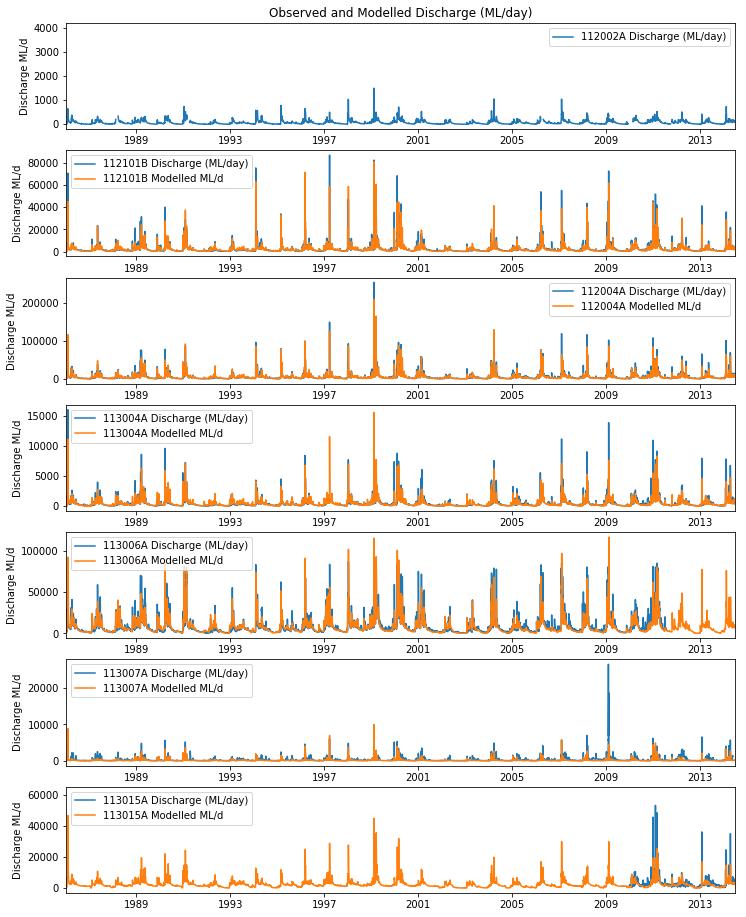

In [31]:
# Create a basic time series plots of the observed and gauged data and show it
# plot new flow duration curves
# plot new NSE stats an cumulative curves
# CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')

A112101B = mod_aps_gauges['112101B Modelled ML/d']
A112004A = mod_aps_gauges['112004A Modelled ML/d']
A113004A = mod_aps_gauges['113004A Modelled ML/d']
A113006A = mod_aps_gauges['113006A Modelled ML/d']
A113007A = mod_aps_gauges['113007A Modelled ML/d']
A113015A = mod_aps_gauges['113015A Modelled ML/d']


plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')

#plt.figure(1)
ax1 = plt.subplot(711)
plt.plot(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()

ax2 = plt.subplot(712, sharex=ax1)
plt.plot(G112101B)
plt.plot(A112101B)
plt.ylabel('Discharge ML/d')
plt.legend()

ax3 = plt.subplot(713, sharex=ax1)
plt.plot(G112004A)
plt.plot(A112004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax4 = plt.subplot(714, sharex=ax1)
plt.plot(G113004A)
plt.plot(A113004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax5 = plt.subplot(715, sharex=ax1)
plt.plot(G113006A)
plt.plot(A113006A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax6 = plt.subplot(716, sharex=ax1)
plt.plot(G113007A)
plt.plot(A113007A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax7 = plt.subplot(717, sharex=ax1)
plt.plot(G113015A)
plt.plot(A113015A)
plt.ylabel('Discharge ML/d')
plt.legend()

plt.xlim("1986-01-01", "2014-06-30")

(732312.0, 735414.0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


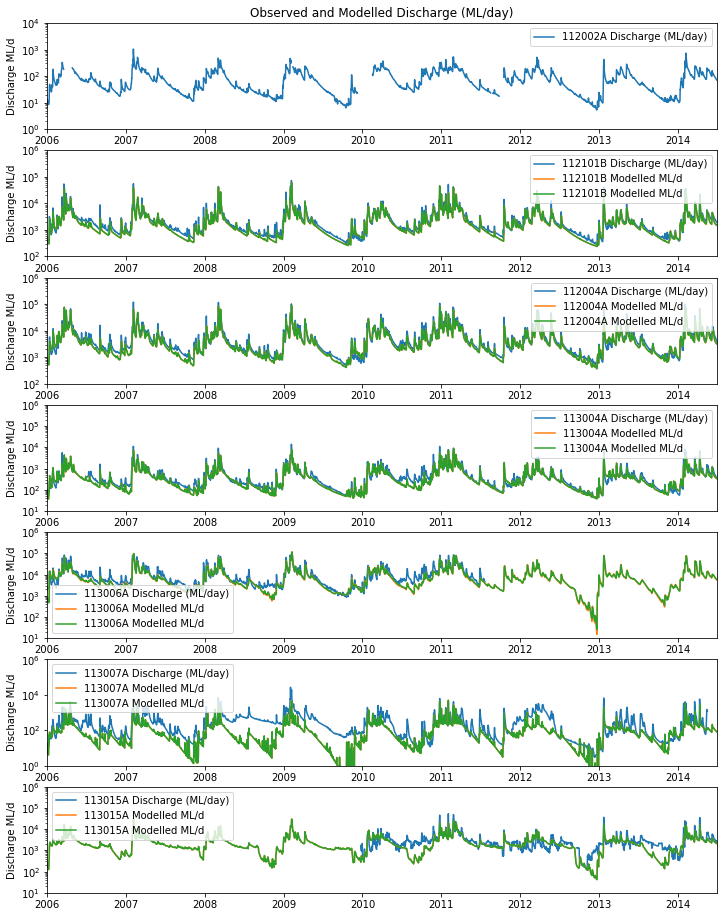

In [32]:
##Now we'll plot the same data, only in log scale and for a shorter period

plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')


#plt.figure(1)
ax1 = plt.subplot(711)
plt.semilogy(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 10000)
plt.xlim([1984, 2015])

ax2 = plt.subplot(712, sharex=ax1)
plt.semilogy(G112101B)
plt.semilogy(O112101B)
plt.semilogy(A112101B)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax3 = plt.subplot(713, sharex=ax1)
plt.semilogy(G112004A)
plt.semilogy(O112004A)
plt.semilogy(A112004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax4 = plt.subplot(714, sharex=ax1)
plt.semilogy(G113004A)
plt.semilogy(O113004A)
plt.semilogy(A113004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax5 = plt.subplot(715, sharex=ax1)
plt.semilogy(G113006A)
plt.semilogy(O113006A)
plt.semilogy(A113006A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax6 = plt.subplot(716, sharex=ax1)
plt.semilogy(G113007A)
plt.semilogy(O113007A)
plt.semilogy(A113007A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 1000000)

ax7 = plt.subplot(717, sharex=ax1)
plt.semilogy(G113015A)
plt.semilogy(O113015A)
plt.semilogy(A113015A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

plt.xlim("2006-01-01", "2014-06-30")

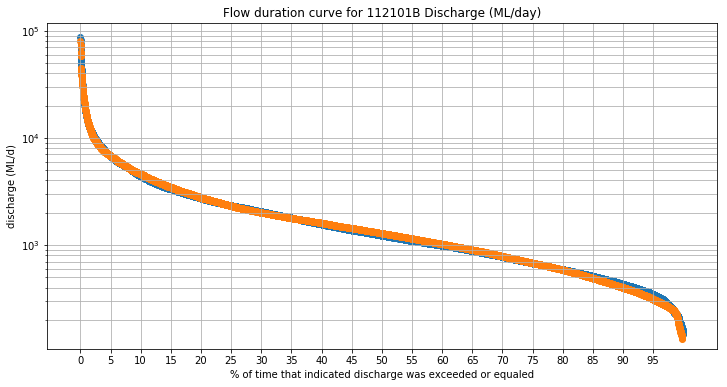

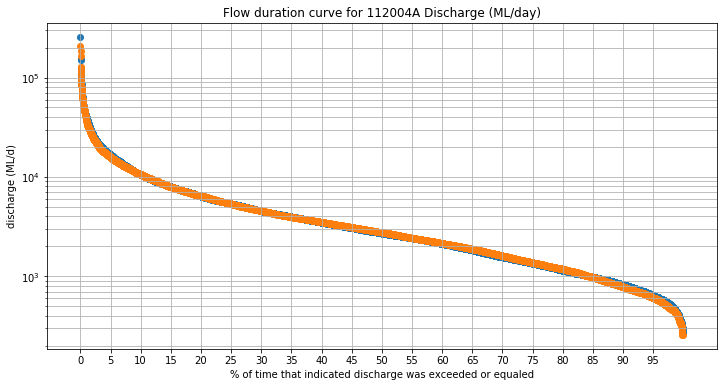

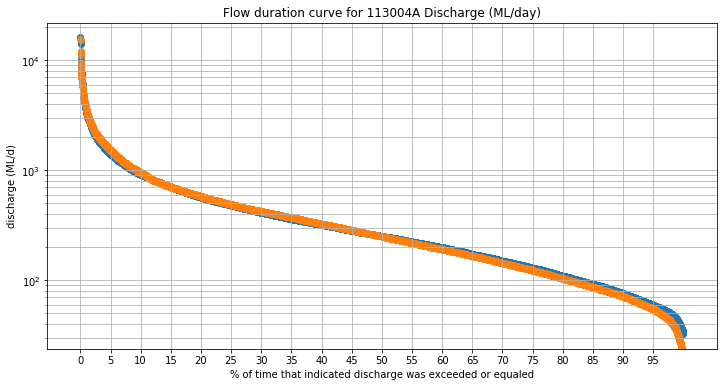

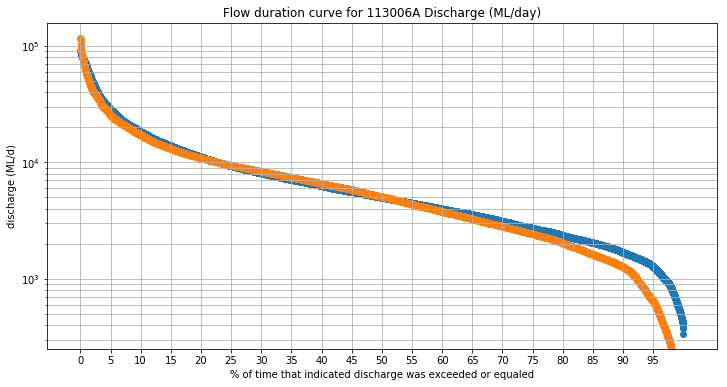

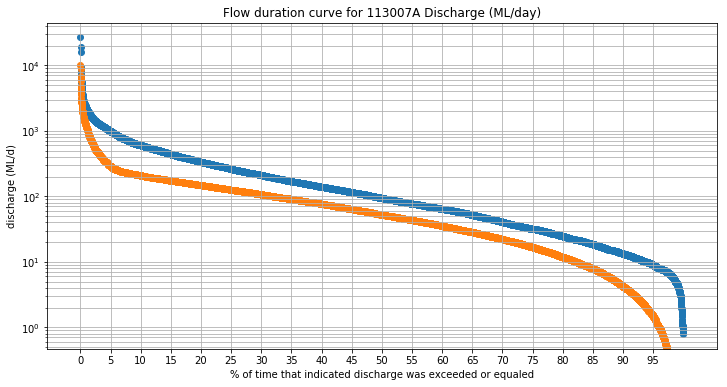

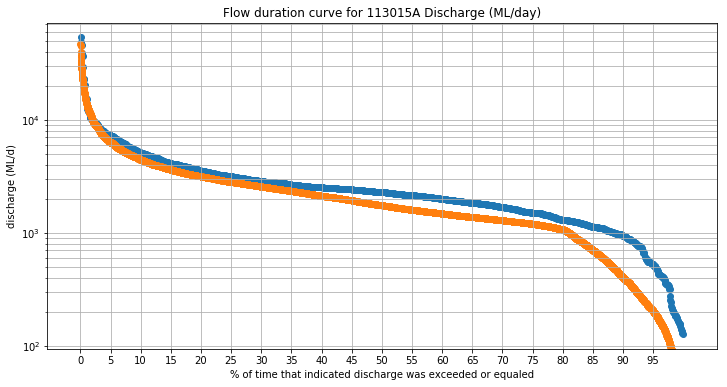

In [33]:
# Calculate and plot the modelled and measured flow duration curves for APSIM integrated model

FlowDurationCurve(Obs_gauges,'112101B Discharge (ML/day)',mod_aps_gauges,'112101B Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'112004A Discharge (ML/day)',mod_aps_gauges,'112004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113004A Discharge (ML/day)',mod_aps_gauges,'113004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113006A Discharge (ML/day)',mod_aps_gauges,'113006A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113007A Discharge (ML/day)',mod_aps_gauges,'113007A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113015A Discharge (ML/day)',mod_aps_gauges,'113015A Modelled ML/d',1986, 2014)

112101B Discharge (ML/day)
percent bias = -1.34
RMSE daily flows = 1773.0
Daily Nash Sutcliffe Efficiency = 0.79
RMSE Monthly flows = 463.0
Monthly Nash Sutcliffe Efficiency = 0.961

112004A Discharge (ML/day)
percent bias = -1.8
RMSE daily flows = 3636.0
Daily Nash Sutcliffe Efficiency = 0.818
RMSE Monthly flows = 971.0
Monthly Nash Sutcliffe Efficiency = 0.968

113004A Discharge (ML/day)
percent bias = -0.94
RMSE daily flows = 421.0
Daily Nash Sutcliffe Efficiency = 0.68
RMSE Monthly flows = 145.0
Monthly Nash Sutcliffe Efficiency = 0.907

113006A Discharge (ML/day)
percent bias = -2.29
RMSE daily flows = 4324.0
Daily Nash Sutcliffe Efficiency = 0.853
RMSE Monthly flows = 2364.0
Monthly Nash Sutcliffe Efficiency = 0.919

113007A Discharge (ML/day)
percent bias = -56.25
RMSE daily flows = 502.0
Daily Nash Sutcliffe Efficiency = 0.31
RMSE Monthly flows = 326.0
Monthly Nash Sutcliffe Efficiency = 0.273

113015A Discharge (ML/day)
percent bias = -17.24
RMSE daily flows = 2356.0
Daily Nas

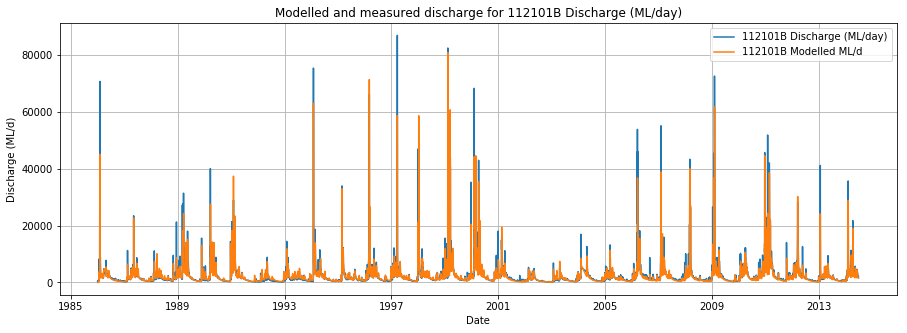

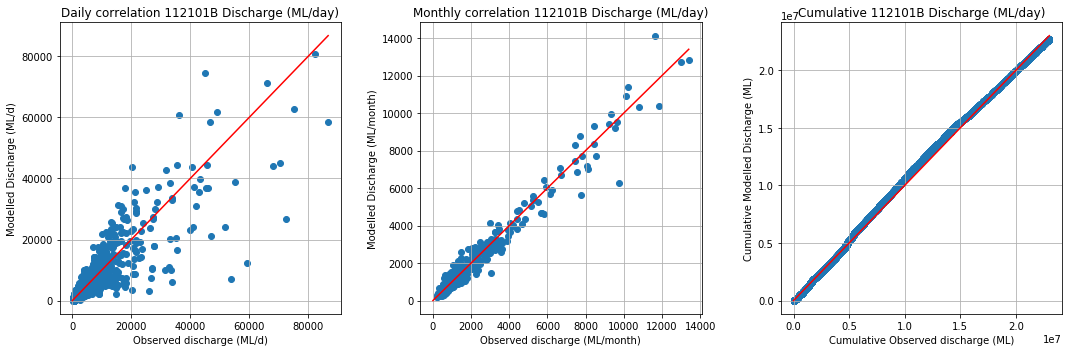

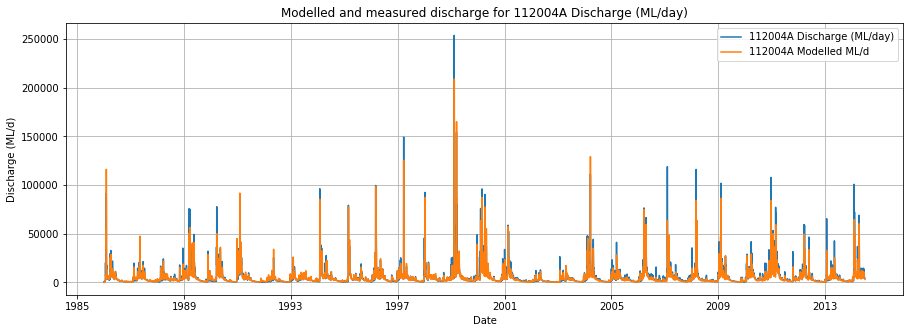

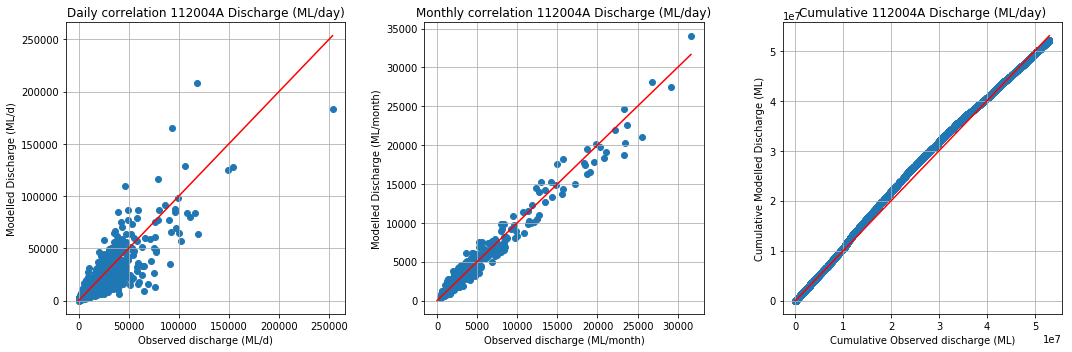

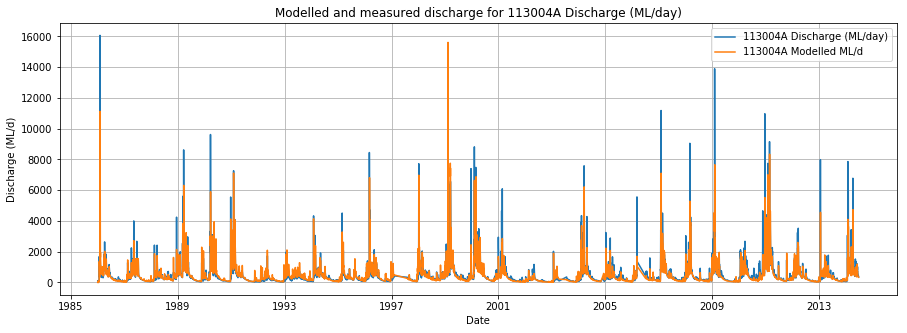

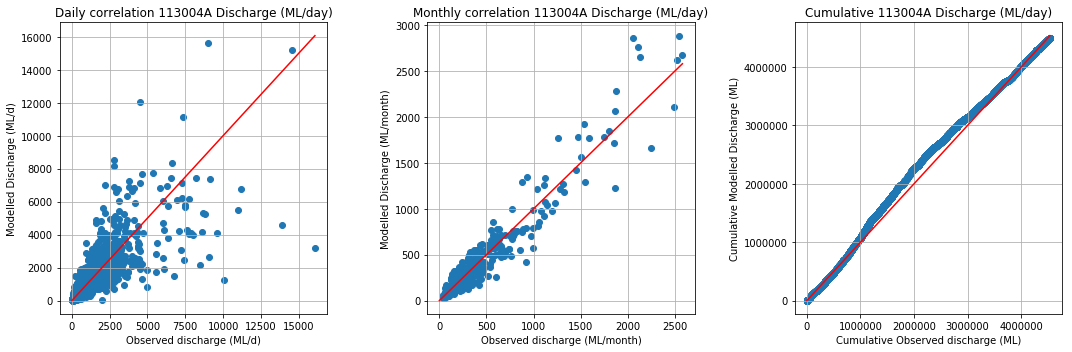

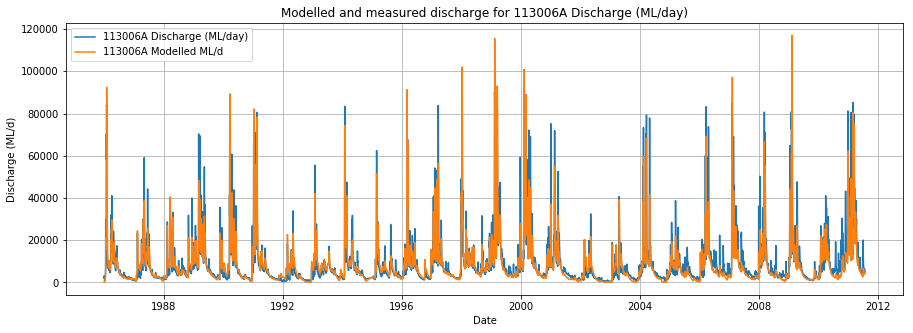

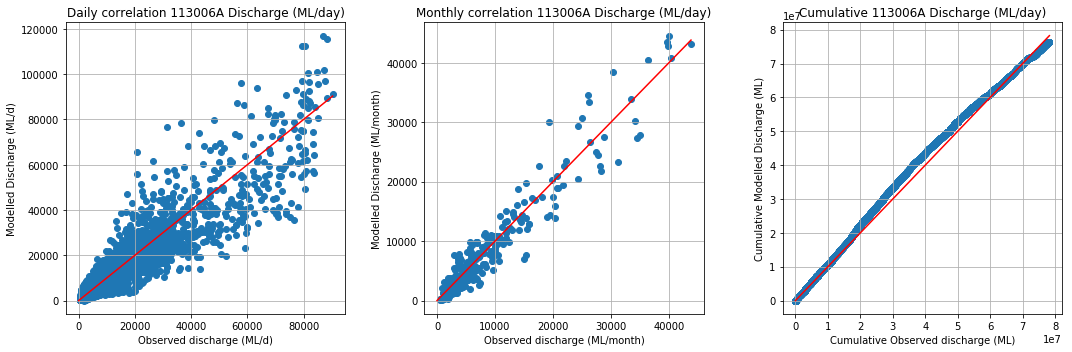

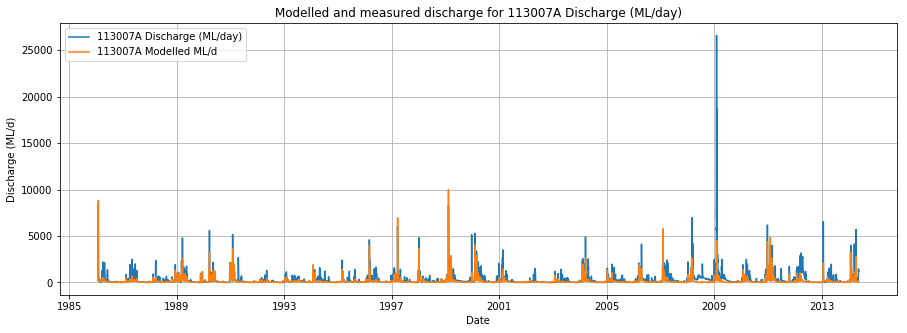

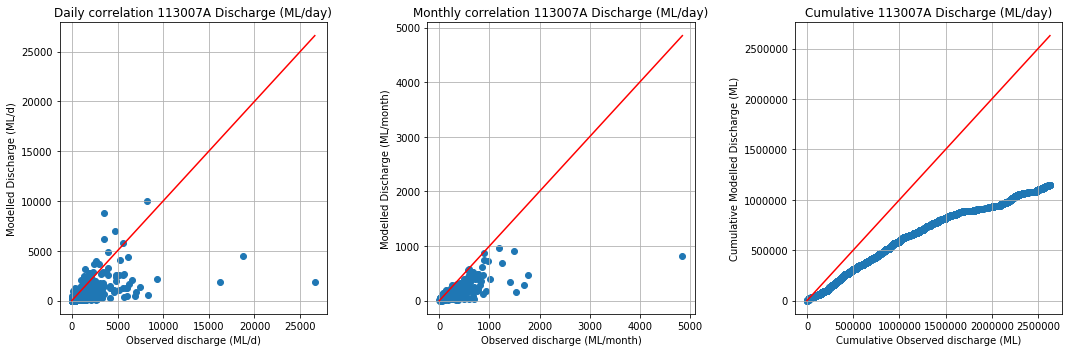

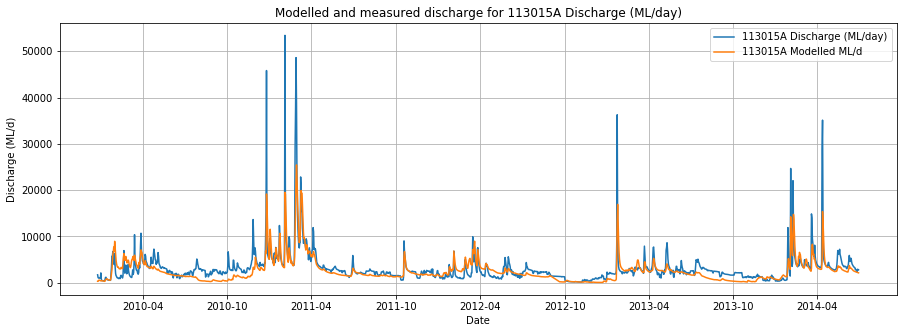

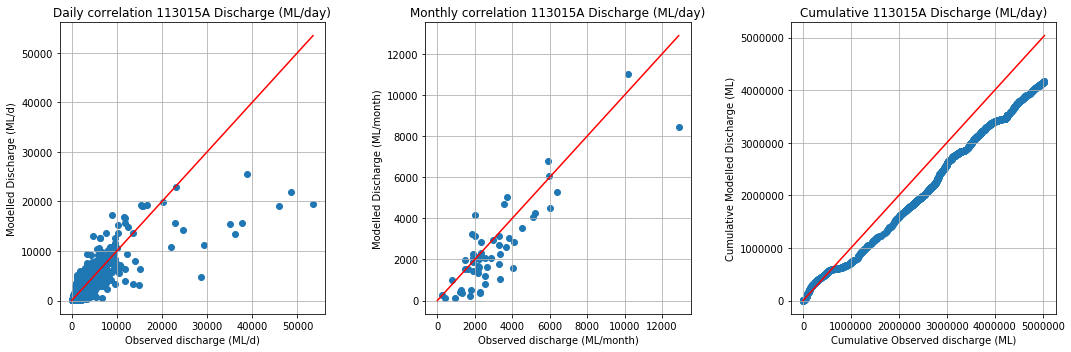

In [34]:
# Calculate and plot the modelled and measured daily statistics for APSIM integrated Source

#CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')
CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',mod_aps_gauges,'112101B Modelled ML/d')

#CorrelationStats(Obs_gauges,'112004A Discharge (ML/day)',Mod_gauges,'112004A Modelled ML/d')
CorrelationStats(Obs_gauges,'112004A Discharge (ML/day)',mod_aps_gauges,'112004A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113004A Discharge (ML/day)',Mod_gauges,'113004A Modelled ML/d')
CorrelationStats(Obs_gauges,'113004A Discharge (ML/day)',mod_aps_gauges,'113004A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113006A Discharge (ML/day)',Mod_gauges,'113006A Modelled ML/d')
CorrelationStats(Obs_gauges,'113006A Discharge (ML/day)',mod_aps_gauges,'113006A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113007A Discharge (ML/day)',Mod_gauges,'113007A Modelled ML/d')
CorrelationStats(Obs_gauges,'113007A Discharge (ML/day)',mod_aps_gauges,'113007A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113015A Discharge (ML/day)',Mod_gauges,'113015A Modelled ML/d')
CorrelationStats(Obs_gauges,'113015A Discharge (ML/day)',mod_aps_gauges,'113015A Modelled ML/d')

<h1><center></center></h1>
<h1><center>Part 5: Estimating water quality parameters</center></h1>

In this module, the paddock model generated sugarcane runoff is combined with 100% delivery ratio of DIN to calculate the modelled DIN loads. These loads are compared on a site by site basis with the observed loads. The notebook then produces output that estimates the site based delivery ratio to apply. Example output includes:

- gauge =  113006A

- mean annual estimated observed DIN concentration =  0.218 mg/L

- mean annual modelled DIN concentration =  0.271 mg/L

- total modelled load =  6721.0 t

- Percentage APSIM DIN to apply =  0.805

<img src="Pictures/DINoutput.png" width="600">

The intention is to facilitate estimating the DIN delivery ratio, allowing the Source model to be rerun with the new delivery ratio in place in the subsequent modules. 

In [35]:
#collate the APSIM N_DIN time series

#Combine the APSIM N_DIN into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data N_DIN file names  y searching the directory
path =r'C:\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*N_DIN.csv")

#save out the N_DIN file name list
N_DinFiles = [os.path.basename(x) for x in glob.glob(path + "/*N_DIN.csv")]

#manipulate the file names a bit
N_DinFiles = [w.replace('$sugarcane$', ' ') for w in N_DinFiles]

np.savetxt("C:/Tully/N_DINNames.csv", N_DinFiles, delimiter=",", fmt='%s')


ndindfs = []
for filename in filenames:
    ndindfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
ndin = pd.concat(ndindfs, axis=1)

#remove all the date columns
NDinData=ndin.drop(ndin.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
NDinData.columns = [N_DinFiles]

#Append one column of dates back on to the data file to make the time series file
N_DinTimeseries = pd.concat([APSIMDates, NDinData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
N_DinTimeseries.index = N_DinTimeseries.Date

#export the drainage time series file with the dates column to CSV
N_DinTimeseries.to_csv("C:/Tully/N_DinTimeseries_kg-ha-d.csv", index=False)

# Remove the Date column from the data columns
del N_DinTimeseries['Date']

In [36]:
#collate the APSIM NLeached time series

#Combine the APSIM N_DIN into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data N_DIN file names  y searching the directory
path =r'C:\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*NLeached.csv")

#save out the N_DIN file name list
NLeachedFiles = [os.path.basename(x) for x in glob.glob(path + "/*NLeached.csv")]

#manipulate the file names a bit
NLeachedFiles = [w.replace('$sugarcane$', ' ') for w in NLeachedFiles]

np.savetxt("C:/Tully/NLeachedNames.csv", NLeachedFiles, delimiter=",", fmt='%s')


nldfs = []
for filename in filenames:
    nldfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
nl = pd.concat(nldfs, axis=1)

#remove all the date columns
NLData=nl.drop(nl.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
NLData.columns = [NLeachedFiles]

#Append one column of dates back on to the data file to make the time series file
NLTimeseries = pd.concat([APSIMDates, NLData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
NLTimeseries.index = NLTimeseries.Date

#export the drainage time series file with the dates column to CSV
NLTimeseries.to_csv("C:/Tully/NLTimeseries_kg-ha-d.csv", index=False)

# Remove the Date column from the data columns
del NLTimeseries['Date']

Take the collated APSIM DIN files and load in to the model and run with 100% delivery ratio (retain the flow delivery ratios and storage parameters)

In [37]:
# bring in the modelled DIN load time series
# the dates in this series have already been made to mm/dd/yyyy for ease of import
# the column series names have also been reduced for ease of processing
modelled_din=pd.read_csv("C:/Tully/Modelled_DIN_t_APSIM.csv",parse_dates=['Date'])
#Now make the dates column as the index so we can do time series plots and analysis on it
modelled_din.index = modelled_din.Date
# Remove the Date column from the data columns
del modelled_din['Date']

#print(annual_din)
#modelled_din.index
#print(modelled_din)
annual_din = modelled_din.resample('A-Jun').sum()/1000
#print(annual_din)
annual_mod_aps_gauges = mod_aps_gauges.resample('A-Jun').sum()

#export the drainage time series file with the dates column to CSV
annual_din.to_csv("C:/Tully/annual_din_t-yr.csv")
# Check that the data accumulation has done something
#plt.plot(annual_din)
#plt.plot(annual_mod_aps_gauges)

Starting with DIN......

gauge =  112101B
mean annual estimated observed DIN concentration =  0.173 mg/L
mean annual modelled DIN concentration =  0.153 mg/L
total modelled load =  1044.0 t
Peroprtion of DIN to apply =  1.126
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  113006A
mean annual estimated observed DIN concentration =  0.206 mg/L
mean annual modelled DIN concentration =  0.269 mg/L
total modelled load =  6651.0 t
Peroprtion of DIN to apply =  0.766
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  112004A
mean annual estimated observed DIN concentration =  0.137 mg/L
mean annual modelled DIN concentration =  0.155 mg/L
total modelled load =  1983.0 t
Peroprtion of DIN to apply =  0.883
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars


gauge =  1120054
mean annual estimated observed DIN concentration =  nan mg/L
mean annual modelled DIN concentration =  nan mg/L
total modelled load =  0.0 t
Peroprtion of DIN to apply =  nan
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  113015A
mean annual estimated observed DIN concentration =  0.13 mg/L
mean annual modelled DIN concentration =  0.109 mg/L
total modelled load =  395.0 t
Peroprtion of DIN to apply =  1.197
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  1120049
mean annual estimated observed DIN concentration =  0.149 mg/L
mean annual modelled DIN concentration =  0.154 mg/L
total modelled load =  310.0 t
Peroprtion of DIN to apply =  0.97
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources



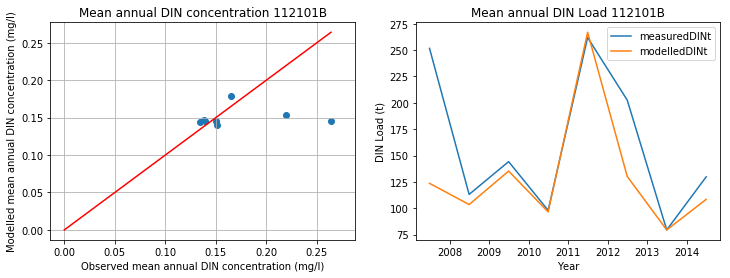

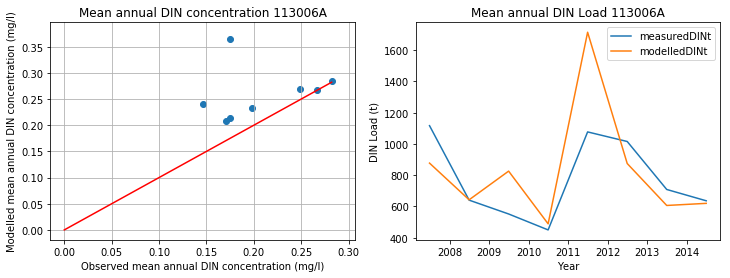

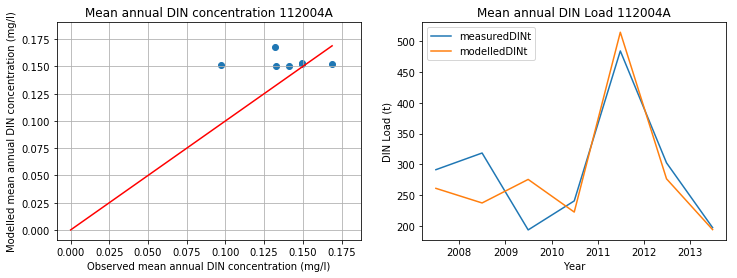

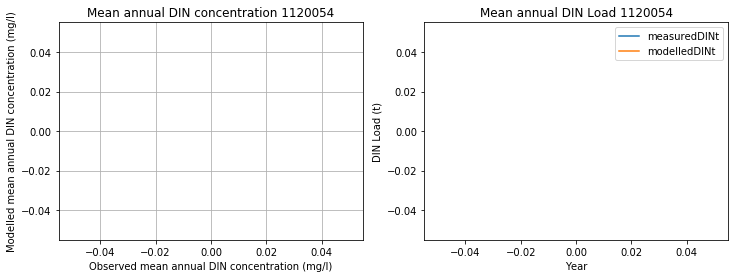

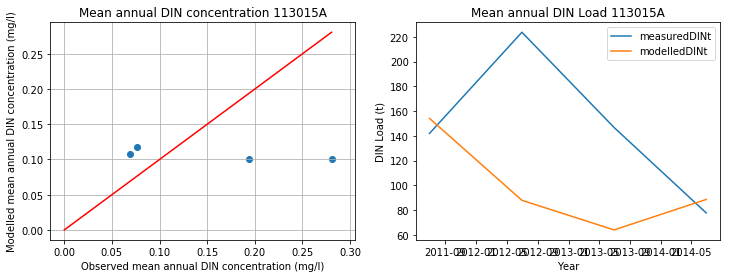

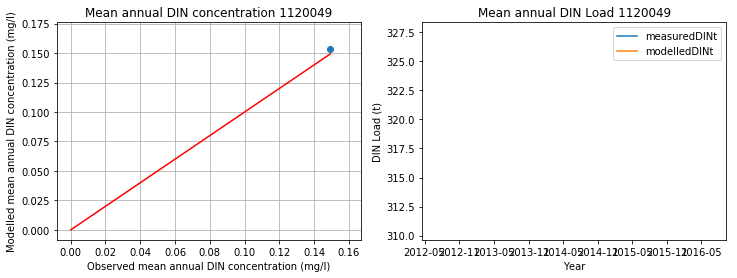

In [38]:
# Import the WQ Annual loads database first to compare mean annual loads. 
WQ_Annual_Loads=pd.read_csv("C:/Tully/WQ_Data/Annual_Loads.csv",parse_dates=['Year_end'])

#Now make the dates column as the index so we can do time series plots and analysis on it
WQ_Annual_Loads.index = WQ_Annual_Loads.Year_end

# snip out the Tully and Johnston bits
wqal = WQ_Annual_Loads.loc[(WQ_Annual_Loads['Basin'] == "Tully") | (WQ_Annual_Loads['Basin'] == "Johnstone")] 
#print(wqal)

#wqal = wqal.convert_objects(convert_numeric=True)

# step through and plot bar chart for each site for DIN loads. 
# snip out the individual sites, convert to a list, then to a set to remove duplicates, then back to a list 
# list the sites
site_list = wqal["Gauging station"].tolist()
site_set = set(site_list)
site_list = list(site_set)

loads = []

#print(site_list)   
#Step through the list and create dataframe for each site
for r in (site_list):
    
    wq = wqal.loc[(wqal['Gauging station'] == r)]
    #wqdin = wq[["Year","Basin","Gauging station","Method"," Discharge (ML) "," Dissolved inorganic nitrogen (t) "]]
    #Calculate the mean annaul concentration for DIN
    wqdina = wq[" Dissolved inorganic nitrogen (t) "]
    wqdina = wqdina.resample('A-Jun').sum()
    gaugedML = wq[" Discharge (ML) "]
    gaugedML = gaugedML.resample('A-Jun').sum()
    #Join them
    gaugedDIN = pd.concat([wqdina, gaugedML],axis=1, join='inner')
    # Rename some dataframe columns to help with the next step
    gaugedDIN.columns = ['tg', 'MLg'] 
    # calculate the mean annual concentrations
    gaugedconc = gaugedDIN['tg']/gaugedDIN['MLg']*1000
    
    #Just get the site specific data out of the modelled time series
    wqm = annual_din.filter(regex=r)
    hym = annual_mod_aps_gauges.filter(regex=r)
    #Join them
    modelledDIN = pd.concat([wqm, hym],axis=1, join='inner')
    # Rename some dataframe columns to help with the next step
    modelledDIN.columns = ['t', 'ML'] 
    # calculate the mean annual concentrations
    modelledconc = modelledDIN['t']/modelledDIN['ML']*1000
    
    
    # Join the observed and modelled dataframes
    wqload = pd.concat([wqdina, wqm],axis=1, join='inner')
    wqload.columns = ['measuredDINt','modelledDINt']
    
    flows = pd.concat([gaugedML,hym],axis=1,join='inner')
    flows.columns = ['measuredML','modelledML']
    
    wqconc = pd.concat([gaugedconc,modelledconc],axis=1,join='inner')
    wqconc.columns = ['measured','modelled']
    #print(wqconc)
    
    
    loads.append(wqload)
    
    #Use the obs and modelled values from the combined dataframes to ensure the same periods are used
    #print(wqload)
    #Sum the measured and modelled data
    obsload=wqload['measuredDINt'].sum()
    modload=wqload['modelledDINt'].sum()
    obsflow=flows['measuredML'].sum()
    modflow=flows['modelledML'].sum()
    
    obs_annual_conc=obsload/obsflow*1000
    mod_annual_conc=modload/modflow*1000
    
    #print(modload,obsload)
    print("gauge = ",r)
    print("mean annual estimated observed DIN concentration = ", round(obs_annual_conc,3),"mg/L")
    print("mean annual modelled DIN concentration = ", round(mod_annual_conc,3),"mg/L")
    print("total modelled load = ", round(modload,0),"t")
        
    # now output suggested parameters for the plugin
    print("Peroprtion of DIN to apply = ", round(1-((mod_annual_conc-obs_annual_conc)/mod_annual_conc),3))
    print("The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources")
    print() 
    
    #wqconc.plot.bar()
    obsload = wqload['measuredDINt']
    modload = wqload['modelledDINt']
    
    
    #produce a scatter plot of measured and modelled concentrations and a chart of the loads
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(wqconc['measured'],wqconc['modelled'])
    plt.grid(which = 'both')
    plt.plot([0,wqconc['measured'].max()],[0,wqconc['measured'].max()],'r')
    plt.xlabel('Observed mean annual DIN concentration (mg/l)')
    plt.ylabel('Modelled mean annual DIN concentration (mg/l)')
    plt.title('Mean annual DIN concentration ' + r)
    
    plt.subplot(1,2,2)
    plt.plot(obsload)
    plt.plot(modload)
    plt.xlabel('Year')
    plt.ylabel('DIN Load (t)')
    plt.title('Mean annual DIN Load ' + r)
    plt.legend()
    
    #wqload.plot.bar()
    
    



In [39]:
# Rerun the model with the new delivery ratio and rerun the above module

# bring in the amended modelled DIN load time series
# the dates in this series have already been made to mm/dd/yyyy for ease of import
# the column series names have also been reduced for ease of processing
modelled_din=pd.read_csv("C:/Tully/Modelled_DIN_kg_APSIM1.csv",parse_dates=['Date'])
#Now make the dates column as the index so we can do time series plots and analysis on it
modelled_din.index = modelled_din.Date
# Remove the Date column from the data columns
del modelled_din['Date']

#print(annual_din)
#modelled_din.index
#print(modelled_din)
annual_din = modelled_din.resample('A-Jun').sum()/1000
#print(annual_din)
annual_mod_aps_gauges = mod_aps_gauges.resample('A-Jun').sum()

#export the drainage time series file with the dates column to CSV
annual_din.to_csv("C:/Tully/annual_din_t-yr.csv")
# Check that the data accumulation has done something
#plt.plot(annual_din)
#plt.plot(annual_mod_aps_gauges)

gauge =  112101B
mean annual estimated observed DIN concentration =  0.173 mg/L
mean annual modelled DIN concentration =  0.151 mg/L
total modelled load =  1029.0 t
Peroprtion of DIN to apply =  1.142
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  113006A
mean annual estimated observed DIN concentration =  0.206 mg/L
mean annual modelled DIN concentration =  0.256 mg/L
total modelled load =  6339.0 t
Peroprtion of DIN to apply =  0.804
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  112004A
mean annual estimated observed DIN concentration =  0.137 mg/L
mean annual modelled DIN concentration =  0.154 mg/L
total modelled load =  1967.0 t
Peroprtion of DIN to apply =  0.891
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars


gauge =  1120054
mean annual estimated observed DIN concentration =  nan mg/L
mean annual modelled DIN concentration =  nan mg/L
total modelled load =  0.0 t
Peroprtion of DIN to apply =  nan
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  113015A
mean annual estimated observed DIN concentration =  0.13 mg/L
mean annual modelled DIN concentration =  0.109 mg/L
total modelled load =  395.0 t
Peroprtion of DIN to apply =  1.197
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources

gauge =  1120049
mean annual estimated observed DIN concentration =  0.149 mg/L
mean annual modelled DIN concentration =  0.153 mg/L
total modelled load =  309.0 t
Peroprtion of DIN to apply =  0.975
The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources



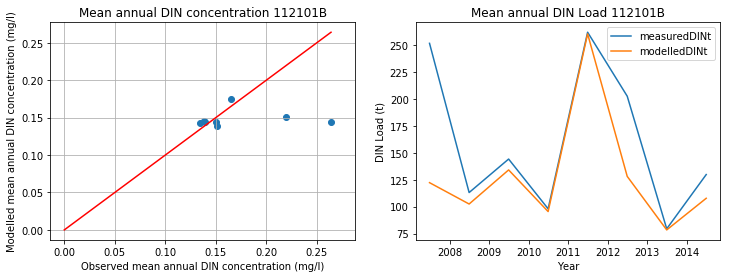

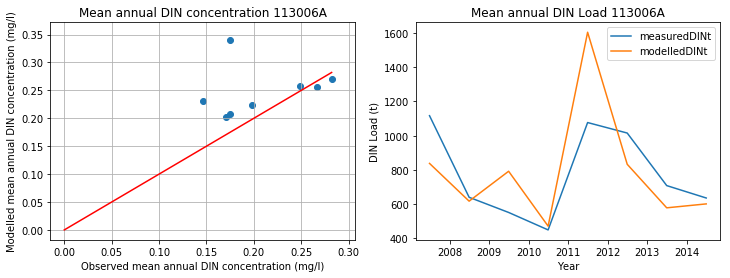

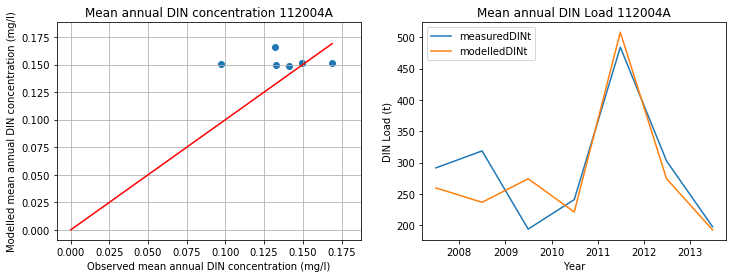

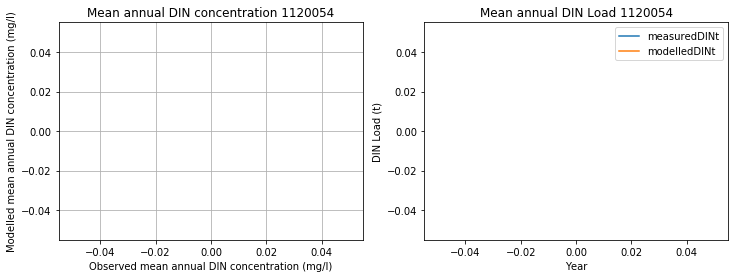

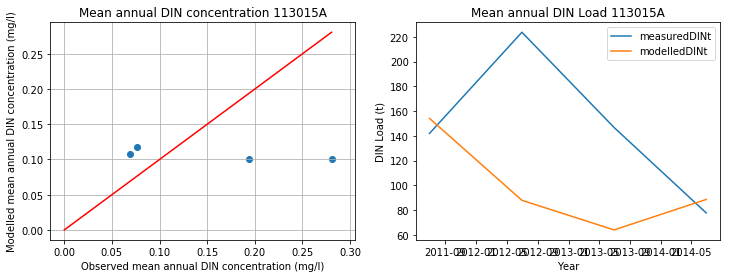

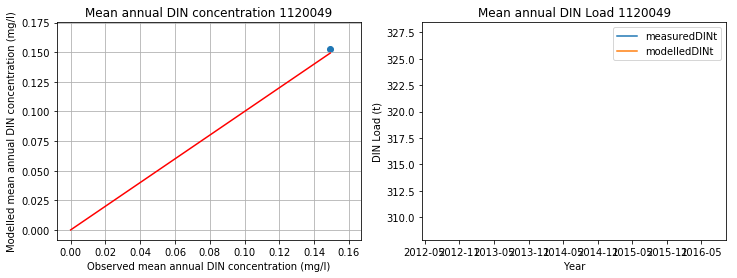

In [40]:
# Import the WQ Annual loads database first to compare mean annual loads. 
WQ_Annual_Loads=pd.read_csv("C:/Tully/WQ_Data/Annual_Loads.csv",parse_dates=['Year_end'])

#Now make the dates column as the index so we can do time series plots and analysis on it
WQ_Annual_Loads.index = WQ_Annual_Loads.Year_end

# snip out the Tully and Johnston bits
wqal = WQ_Annual_Loads.loc[(WQ_Annual_Loads['Basin'] == "Tully") | (WQ_Annual_Loads['Basin'] == "Johnstone")] 
#print(wqal)

#wqal = wqal.convert_objects(convert_numeric=True)

# step through and plot bar chart for each site for DIN loads. 
# snip out the individual sites, convert to a list, then to a set to remove duplicates, then back to a list 
# list the sites
site_list = wqal["Gauging station"].tolist()
site_set = set(site_list)
site_list = list(site_set)

loads = []

#print(site_list)   
#Step through the list and create dataframe for each site
for r in (site_list):
    
    wq = wqal.loc[(wqal['Gauging station'] == r)]
    #wqdin = wq[["Year","Basin","Gauging station","Method"," Discharge (ML) "," Dissolved inorganic nitrogen (t) "]]
    #Calculate the mean annaul concentration for DIN
    wqdina = wq[" Dissolved inorganic nitrogen (t) "]
    wqdina = wqdina.resample('A-Jun').sum()
    gaugedML = wq[" Discharge (ML) "]
    gaugedML = gaugedML.resample('A-Jun').sum()
    #Join them
    gaugedDIN = pd.concat([wqdina, gaugedML],axis=1, join='inner')
    # Rename some dataframe columns to help with the next step
    gaugedDIN.columns = ['tg', 'MLg'] 
    # calculate the mean annual concentrations
    gaugedconc = gaugedDIN['tg']/gaugedDIN['MLg']*1000
    
    #Just get the site specific data out of the modelled time series
    wqm = annual_din.filter(regex=r)
    hym = annual_mod_aps_gauges.filter(regex=r)
    #Join them
    modelledDIN = pd.concat([wqm, hym],axis=1, join='inner')
    # Rename some dataframe columns to help with the next step
    modelledDIN.columns = ['t', 'ML'] 
    # calculate the mean annual concentrations
    modelledconc = modelledDIN['t']/modelledDIN['ML']*1000
    
    
    # Join the observed and modelled dataframes
    wqload = pd.concat([wqdina, wqm],axis=1, join='inner')
    wqload.columns = ['measuredDINt','modelledDINt']
    
    flows = pd.concat([gaugedML,hym],axis=1,join='inner')
    flows.columns = ['measuredML','modelledML']
    
    wqconc = pd.concat([gaugedconc,modelledconc],axis=1,join='inner')
    wqconc.columns = ['measured','modelled']
    #print(wqconc)
    
    
    loads.append(wqload)
    
    #Use the obs and modelled values from the combined dataframes to ensure the same periods are used
    #print(wqload)
    #Sum the measured and modelled data
    obsload=wqload['measuredDINt'].sum()
    modload=wqload['modelledDINt'].sum()
    obsflow=flows['measuredML'].sum()
    modflow=flows['modelledML'].sum()
    
    obs_annual_conc=obsload/obsflow*1000
    mod_annual_conc=modload/modflow*1000
    
    #print(modload,obsload)
    print("gauge = ",r)
    print("mean annual estimated observed DIN concentration = ", round(obs_annual_conc,3),"mg/L")
    print("mean annual modelled DIN concentration = ", round(mod_annual_conc,3),"mg/L")
    print("total modelled load = ", round(modload,0),"t")
        
    # now output suggested parameters for the plugin
    print("Peroprtion of DIN to apply = ", round(1-((mod_annual_conc-obs_annual_conc)/mod_annual_conc),3))
    print("The proportion of APSIM DIN to apply will depend on the contribution from other catchment sources")
    print()    
    
    
    #wqconc.plot.bar()
    obsload = wqload['measuredDINt']
    modload = wqload['modelledDINt']
    
    
    #produce a scatter plot of measured and modelled concentrations and a chart of the loads
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(wqconc['measured'],wqconc['modelled'])
    plt.grid(which = 'both')
    plt.plot([0,wqconc['measured'].max()],[0,wqconc['measured'].max()],'r')
    plt.xlabel('Observed mean annual DIN concentration (mg/l)')
    plt.ylabel('Modelled mean annual DIN concentration (mg/l)')
    plt.title('Mean annual DIN concentration ' + r)
    
    plt.subplot(1,2,2)
    plt.plot(obsload)
    plt.plot(modload)
    plt.xlabel('Year')
    plt.ylabel('DIN Load (t)')
    plt.title('Mean annual DIN Load ' + r)
    plt.legend()
    
    #wqload.plot.bar()

<h1><center></center></h1>
<h1><center>Part 5a: Estimating Atrazine and Diuron Delivery Ratios</center></h1>

In this module, the same techniques are applied to the Diuron and Atrazinre parameters as were applied to he DIN to arrive at delivery ratios for these parameters. 

The first stage is to get the APSIM time series data into Source and this notebook by accumulating the time series. Next, the model output is assessed with either 0% or 100% (or at least 100% application) of constituent tpo estimate the appropriate delivery ratio. 

As per the DIN approach, where multiple gauge sites are located within a catchment, including nested gauge sites, the modeller can choose a couple of approached for selecting the delivery ratio:
- The global approach, where the sum of load form all sites divided by the sum of flow from all sites is compared to that the measured data to arrive at a global concentration that a delivery ratio is aimed at matching; or
- The site based appaorch, where the individually calculated deliveryt ratios are applied on a gauge by gauge basis to achieve a best match at all sites individually. 

In [42]:
# Compile the Atrazine sediment phase Time Series to import to the Source Model

#Combine the APSIM into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data Atrazine file names  by searching the directory
path =r'C:\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*Atrazine$SedimentPhase.csv")

#save out the Atrazine file name list
atzFiles = [os.path.basename(x) for x in glob.glob(path + "/*Atrazine$SedimentPhase.csv")]

#manipulate the file names a bit
atzFiles = [w.replace('$sugarcane$', ' ') for w in atzFiles]

np.savetxt("C:/Tully/Atz_Names.csv", atzFiles, delimiter=",", fmt='%s')

atzdfs = []
for filename in filenames:
    atzdfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
atz = pd.concat(atzdfs, axis=1)

#remove all the date columns
atzData=atz.drop(atz.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
atzData.columns = [atzFiles]

#Append one column of dates back on to the data file to make the time series file
atzTimeseries = pd.concat([APSIMDates, atzData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
atzTimeseries.index = atzTimeseries.Date

#export the drainage time series file with the dates column to CSV
atzTimeseries.to_csv("C:/Tully/AtSed_g-ha-d.csv", index=False)

# Remove the Date column from the data columns
del atzTimeseries['Date']

In [41]:
# Compile the Atrazine water phase time Series to import to the Source Model

#Combine the APSIM into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data Atrazine file names  by searching the directory
path =r'C:\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*Atrazine$WaterPhase.csv")

#save out the Atrazine file name list
atzwFiles = [os.path.basename(x) for x in glob.glob(path + "/*Atrazine$WaterPhase.csv")]

#manipulate the file names a bit
atzwFiles = [w.replace('$sugarcane$', ' ') for w in atzwFiles]

np.savetxt("C:/Tully/Atzw_Names.csv", atzwFiles, delimiter=",", fmt='%s')

atzwdfs = []
for filename in filenames:
    atzwdfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
atzw = pd.concat(atzwdfs, axis=1)

#remove all the date columns
atzwData=atzw.drop(atzw.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
atzwData.columns = [atzwFiles]

#Append one column of dates back on to the data file to make the time series file
atzwTimeseries = pd.concat([APSIMDates, atzwData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
atzwTimeseries.index = atzwTimeseries.Date

#export the drainage time series file with the dates column to CSV
atzwTimeseries.to_csv("C:/Tully/AtWat_g-ha-d.csv", index=False)

# Remove the Date column from the data columns
del atzwTimeseries['Date']

In [43]:
# Compile the Diuron sediment phase Time Series to import to the Source Model

# get data Diuron file names  by searching the directory
path =r'C:\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*Diuron$SedimentPhase.csv")

#save out the Atrazine file name list
diuFiles = [os.path.basename(x) for x in glob.glob(path + "/*Diuron$SedimentPhase.csv")]

#manipulate the file names a bit
diuFiles = [w.replace('$sugarcane$', ' ') for w in diuFiles]

np.savetxt("C:/Tully/Diu_Names.csv", diuFiles, delimiter=",", fmt='%s')

diudfs = []
for filename in filenames:
    diudfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
diu = pd.concat(diudfs, axis=1)

#remove all the date columns
diuData=atz.drop(diu.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
diuData.columns = [diuFiles]

#Append one column of dates back on to the data file to make the time series file
diuTimeseries = pd.concat([APSIMDates, diuData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
diuTimeseries.index = diuTimeseries.Date

#export the drainage time series file with the dates column to CSV
diuTimeseries.to_csv("C:/Tully/DiuSed_g-ha-d.csv", index=False)

# Remove the Date column from the data columns
del diuTimeseries['Date']

In [45]:
# Compile the Diuron water phase Time Series to import to the Source Model

# get data Diuron file names  by searching the directory
path =r'C:\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*Diuron$WaterPhase.csv")

#save out the Diuron file name list
diuwFiles = [os.path.basename(x) for x in glob.glob(path + "/*Diuron$WaterPhase.csv")]

#manipulate the file names a bit
diuwFiles = [w.replace('$sugarcane$', ' ') for w in diuwFiles]

np.savetxt("C:/Tully/Diuw_Names.csv", diuwFiles, delimiter=",", fmt='%s')

diuwdfs = []
for filename in filenames:
    diuwdfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
diuw = pd.concat(diuwdfs, axis=1)

#remove all the date columns
diuwData=diuw.drop(diuw.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
diuwData.columns = [diuwFiles]

#Append one column of dates back on to the data file to make the time series file
diuwTimeseries = pd.concat([APSIMDates, diuwData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
diuwTimeseries.index = diuwTimeseries.Date

#export the drainage time series file with the dates column to CSV
diuwTimeseries.to_csv("C:/Tully/DiuWater_g-ha-d.csv", index=False)

# Remove the Date column from the data columns
del diuwTimeseries['Date']

gauge =  1120054
mean annual estimated observed Atrazine concentration =  0.0 ug/L
mean annual modelled Atrazine concentration =  0.0 ug/L
total Atrazine modelled load =  0.0 kg
total Atrazine observed load =  0.0 kg

mean annual estimated observed Diuron concentration =  0.0 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg
total Diuron observed load =  0.0 kg

Proprtion of Atrazine to apply =  nan
Proprtion of Diuron to apply =  nan
The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources

gauge =  112004A
mean annual estimated observed Atrazine concentration =  0.019 ug/L
mean annual modelled Atrazine concentration =  0.030000000000000002 ug/L
total Atrazine modelled load =  58.0 kg
total Atrazine observed load =  42.0 kg

mean annual estimated observed Diuron concentration =  0.020999999999999998 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in double_scalars


gauge =  113006A
mean annual estimated observed Atrazine concentration =  0.378 ug/L
mean annual modelled Atrazine concentration =  0.002 ug/L
total Atrazine modelled load =  5.0 kg
total Atrazine observed load =  830.0 kg

mean annual estimated observed Diuron concentration =  0.642 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg
total Diuron observed load =  1410.0 kg

Proprtion of Atrazine to apply =  233.525
Proprtion of Diuron to apply =  inf
The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources

gauge =  1120049
mean annual estimated observed Atrazine concentration =  0.01 ug/L
mean annual modelled Atrazine concentration =  0.025 ug/L
total Atrazine modelled load =  50.0 kg
total Atrazine observed load =  21.0 kg

mean annual estimated observed Diuron concentration =  0.027 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg
total Diuron obs

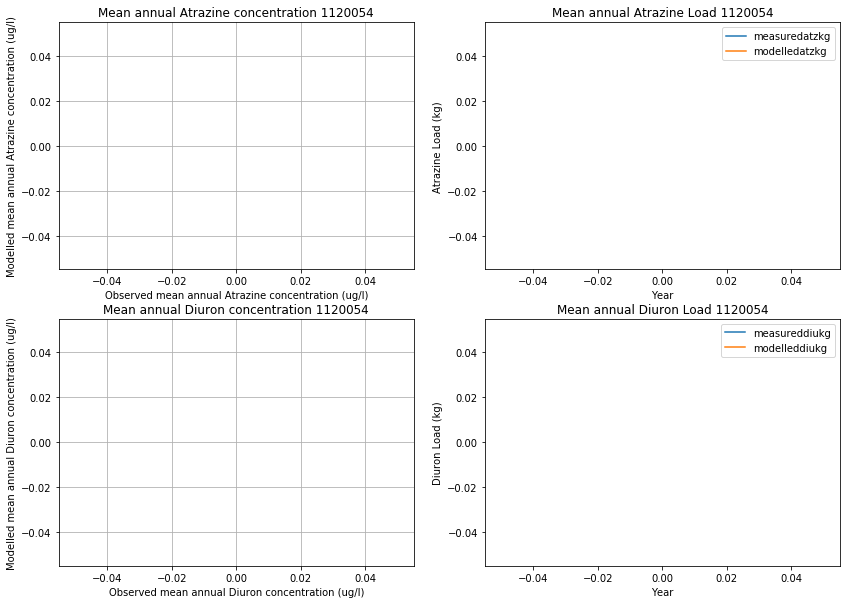

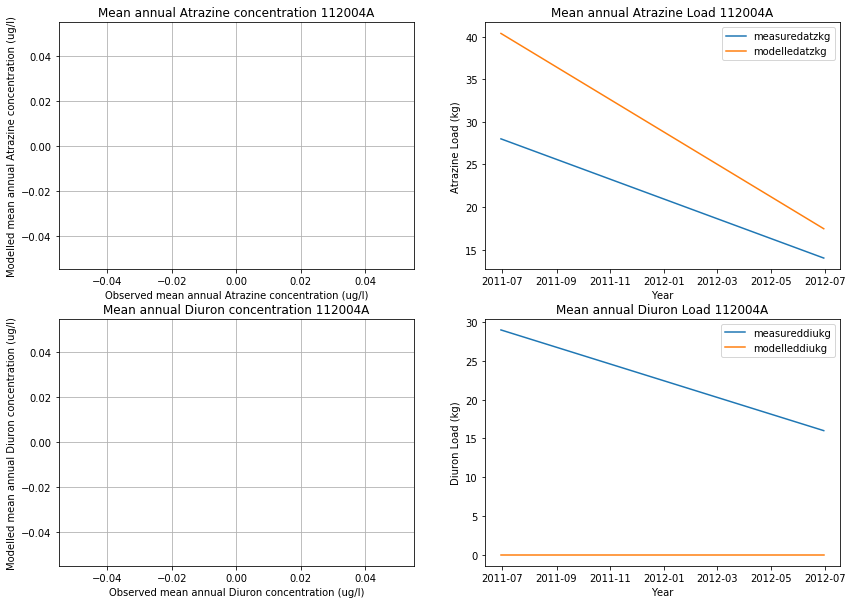

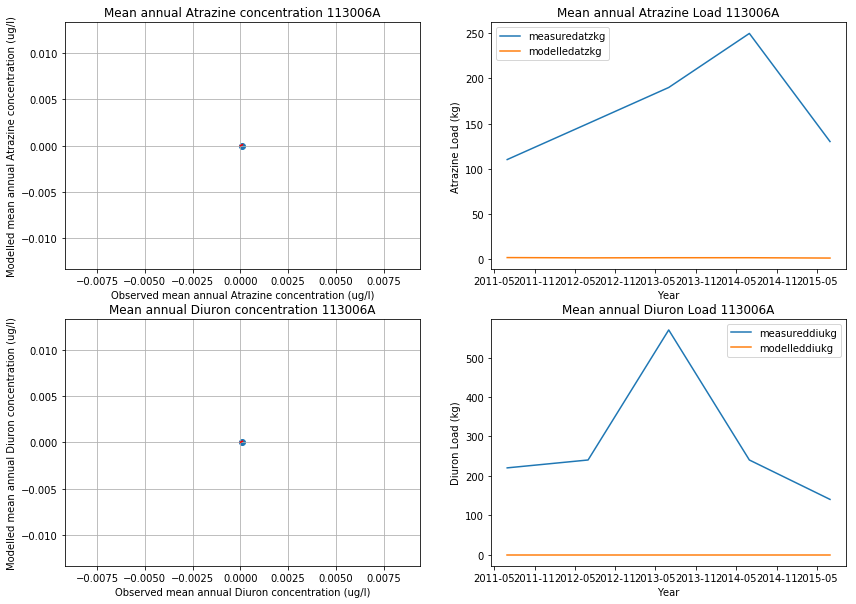

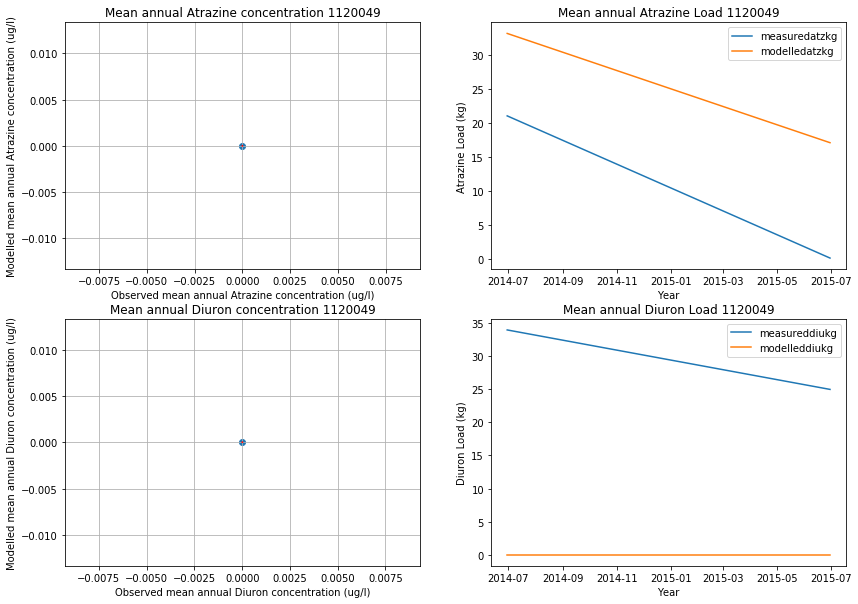

In [46]:
# Atrazine and Diuron Assessment 1:
# Approach here is to apply 0% in the plugin. this should then be the benchmark from which to increase the amount

# Import the WQ Annual loads database first to compare mean annual loads. 
WQ_Annual_Loads=pd.read_csv("C:/Tully/WQ_Data/Annual_PLoads2.csv",parse_dates=['Year_end'])

#Now make the dates column as the index so we can do time series plots and analysis on it
WQ_Annual_Loads.index = WQ_Annual_Loads.Year_end

# snip out the Tully and Johnston bits
wqalp = WQ_Annual_Loads.loc[(WQ_Annual_Loads['Basin'] == "Tully") | (WQ_Annual_Loads['Basin'] == "Johnstone")] 
#print(wqalp)
 
# snip out the individual sites, convert to a list, then to a set to remove duplicates, then back to a list 
# list the sites
site_listp = wqalp["Gauging station"].tolist()
site_setp = set(site_listp)
site_listp = list(site_setp)

atzloads = []
diuloads = []

# bring in the amended Atrazine and Diuron load time series
# the dates in this series have already been made to mm/dd/yyyy for ease of import
# the column series names have also been reduced for ease of processing??
modelled_atrazine=pd.read_csv("C:/Tully/Modelled_Atrazine_kg.csv",parse_dates=['Date'])
modelled_diuron=pd.read_csv("C:/Tully/Modelled_Diuron_kg.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
modelled_atrazine.index = modelled_atrazine.Date
modelled_diuron.index = modelled_diuron.Date
# Remove the Date column from the data columns
del modelled_atrazine['Date']
del modelled_diuron['Date']

annual_atrazine = modelled_atrazine.resample('A-Jun').sum()
annual_diuron = modelled_diuron.resample('A-Jun').sum()
  
#Step through the list and create dataframe for each site for Atrazine and Diuron
for r in (site_listp):
    
    wqp = wqalp.loc[(wqalp['Gauging station'] == r)]
    #wqdin = wq[["Year","Basin","Gauging station","Method"," Discharge (ML) "," Dissolved inorganic nitrogen (t) "]]
    #Calculate the mean annaul concentration for DIN
    wqdiu = wqp["Total Diuron mass load (kg)"]
    wqatr = wqp["Total Atrazine mass load (kg)"]
    
    wqdiua = wqdiu.resample('A-Jun').sum()
    wqatra = wqatr.resample('A-Jun').sum()
    
    #There is no ML data in the pesticide database, so grab the DIN one. 
    gaugedML = wq[" Discharge (ML) "]
    gaugedML = gaugedML.resample('A-Jun').sum()
    
    #Join them
    gaugeddiu = pd.concat([wqdiua, gaugedML],axis=1, join='inner')
    gaugedatr = pd.concat([wqatra, gaugedML],axis=1, join='inner')
    
    # Rename some dataframe columns to help with the next step
    gaugeddiu.columns = ['kgg', 'MLg']
    gaugedatr.columns = ['kgg', 'MLg'] 
    
    # calculate the mean annual concentrations
    gaugeddiuconc = gaugeddiu['kgg']/gaugeddiu['MLg']
    gaugedatrconc = gaugedatr['kgg']/gaugedatr['MLg']
    
    #Now get the site specific data out of the modelled time series
    wqma = annual_atrazine.filter(regex=r)
    wqmd = annual_diuron.filter(regex=r)
    
    hym = annual_mod_aps_gauges.filter(regex=r)  # this should be the modelled flows at the gauges
    
    #Join them
    modelledatr = pd.concat([wqma, hym],axis=1, join='inner')
    modelleddiu = pd.concat([wqmd, hym],axis=1, join='inner')
    
    # Rename some dataframe columns to help with the next step
    modelledatr.columns = ['kg', 'ML']
    modelleddiu.columns = ['kg', 'ML']
    
    # calculate the mean annual concentrations
    modelledatrconc = modelledatr['kg']/modelledatr['ML']
    modelleddiuconc = modelleddiu['kg']/modelleddiu['ML']
    
    ###########################################################################
    # Join the observed and modelled dataframes
    wqatload = pd.concat([wqatra, wqma],axis=1, join='inner') # Join annual Atrazine measured and modelled 
    wqatload.columns = ['measuredatzkg','modelledatzkg']# atrazine dataframe
    
    wqdiload = pd.concat([wqdiua, wqmd],axis=1, join='inner') # Join annual Diuron measured and modelled 
    wqdiload.columns = ['measureddiukg','modelleddiukg']# Diuron dataframe

    
    flows = pd.concat([gaugedML,hym],axis=1,join='inner')
    flows.columns = ['measuredML','modelledML']
    
    wqatconc = pd.concat([gaugedatrconc,modelledatrconc],axis=1,join='inner') # join the annual modelled and measured gauged concentrations
    wqatconc.columns = ['measuredatz','modelledatz'] # rename colums to make later steps easier
    
    wqdiconc = pd.concat([gaugeddiuconc,modelleddiuconc],axis=1,join='inner') # join the annual modelled and measured gauged concentrations
    wqdiconc.columns = ['measureddiu','modelleddiu'] # rename colums to make later steps easier
    #print(wqconc)
    
    
    atzloads.append(wqatload)
    diuloads.append(wqdiload)
    
    #Use the obs and modelled values from the combined dataframes to ensure the same periods are used

    #Sum the measured and modelled data
    atzobsload=wqatload['measuredatzkg'].sum()
    atzmodload=wqatload['modelledatzkg'].sum()
    diuobsload=wqdiload['measureddiukg'].sum()
    diumodload=wqdiload['modelleddiukg'].sum()
    
    obsflow=flows['measuredML'].sum()
    modflow=flows['modelledML'].sum()
    
    atzobs_annual_conc=atzobsload/obsflow
    atzmod_annual_conc=atzmodload/modflow
    
    diuobs_annual_conc=diuobsload/obsflow
    diumod_annual_conc=diumodload/modflow 
    
    #print(modload,obsload)
    print("gauge = ",r)
    print("mean annual estimated observed Atrazine concentration = ", round(atzobs_annual_conc,6)*1000,"ug/L")
    print("mean annual modelled Atrazine concentration = ", round(atzmod_annual_conc,6)*1000,"ug/L")
    print("total Atrazine modelled load = ", round(atzmodload,0),"kg")
    print("total Atrazine observed load = ", round(atzobsload,0),"kg")
    print()
    
    print("mean annual estimated observed Diuron concentration = ", round(diuobs_annual_conc,6)*1000,"ug/L")
    print("mean annual modelled Diuron concentration = ", round(diumod_annual_conc,6)*1000,"ug/L")
    print("total Diuron modelled load = ", round(diumodload,0),"kg")
    print("total Diuron observed load = ", round(diuobsload,0),"kg")
    print()
        
    # now output suggested Atrazine parameters for the plugin
    print("Proprtion of Atrazine to apply = ", round(1-((atzmod_annual_conc-atzobs_annual_conc)/atzmod_annual_conc),3))
    print("Proprtion of Diuron to apply = ", round(1-((diumod_annual_conc-diuobs_annual_conc)/diumod_annual_conc),3))
    print("The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources")
    print()    
    
    #set the laod time series to put in the plots
    atzobsload = wqatload['measuredatzkg']
    atzmodload = wqatload['modelledatzkg']
    
    diuobsload = wqdiload['measureddiukg']
    diumodload = wqdiload['modelleddiukg']
    
    #produce a scatter plot of measured and modelled concentrations and a chart of the loads. 
    # 4 charts with scatter of conc vs conc and load time series as line plot
    
    plt.figure(figsize=(14,10))
    plt.subplot(2,2,1)
    plt.scatter(wqatconc['measuredatz'],wqatconc['modelledatz'])
    plt.grid(which = 'both')
    plt.plot([0,wqatconc['measuredatz'].max()],[0,wqatconc['measuredatz'].max()],'r')
    plt.xlabel('Observed mean annual Atrazine concentration (ug/l)')
    plt.ylabel('Modelled mean annual Atrazine concentration (ug/l)')
    plt.title('Mean annual Atrazine concentration ' + r)
    
    plt.subplot(2,2,2)
    plt.plot(atzobsload)
    plt.plot(atzmodload)
    plt.xlabel('Year')
    plt.ylabel('Atrazine Load (kg)')
    plt.title('Mean annual Atrazine Load ' + r)
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.scatter(wqdiconc['measureddiu'],wqdiconc['modelleddiu'])
    plt.grid(which = 'both')
    plt.plot([0,wqdiconc['measureddiu'].max()],[0,wqdiconc['measureddiu'].max()],'r')
    plt.xlabel('Observed mean annual Diuron concentration (ug/l)')
    plt.ylabel('Modelled mean annual Diuron concentration (ug/l)')
    plt.title('Mean annual Diuron concentration ' + r)
    
    plt.subplot(2,2,4)
    plt.plot(diuobsload)
    plt.plot(diumodload)
    plt.xlabel('Year')
    plt.ylabel('Diuron Load (kg)')
    plt.title('Mean annual Diuron Load ' + r)
    plt.legend()
    
    #wqload.plot.bar()

gauge =  1120054
mean annual estimated observed Atrazine concentration =  0.0 ug/L
mean annual modelled Atrazine concentration =  0.0 ug/L
total Atrazine modelled load =  0.0 kg
total Atrazine observed load =  0.0 kg

mean annual estimated observed Diuron concentration =  0.0 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0.0 kg
total Diuron observed load =  0.0 kg

Proprtion of Atrazine to apply =  nan
Proprtion of Diuron to apply =  nan
The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources

gauge =  112004A
mean annual estimated observed Atrazine concentration =  0.019 ug/L
mean annual modelled Atrazine concentration =  0.032 ug/L
total Atrazine modelled load =  62.0 kg
total Atrazine observed load =  42.0 kg

mean annual estimated observed Diuron concentration =  0.020999999999999998 ug/L
mean annual modelled Diuron concentration =  0.008 ug/L
total Diuron modelled load =  15.0 kg
total Di

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:143: RuntimeWarning: invalid value encountered in double_scalars


gauge =  113006A
mean annual estimated observed Atrazine concentration =  0.378 ug/L
mean annual modelled Atrazine concentration =  0.036000000000000004 ug/L
total Atrazine modelled load =  106.0 kg
total Atrazine observed load =  830.0 kg

mean annual estimated observed Diuron concentration =  0.642 ug/L
mean annual modelled Diuron concentration =  0.491 ug/L
total Diuron modelled load =  1465.0 kg
total Diuron observed load =  1410.0 kg

Proprtion of Atrazine to apply =  10.619
Proprtion of Diuron to apply =  1.307
The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources

gauge =  1120049
mean annual estimated observed Atrazine concentration =  0.01 ug/L
mean annual modelled Atrazine concentration =  0.025 ug/L
total Atrazine modelled load =  51.0 kg
total Atrazine observed load =  21.0 kg

mean annual estimated observed Diuron concentration =  0.027 ug/L
mean annual modelled Diuron concentration =  0.013 ug/L
total Diuron modelled lo

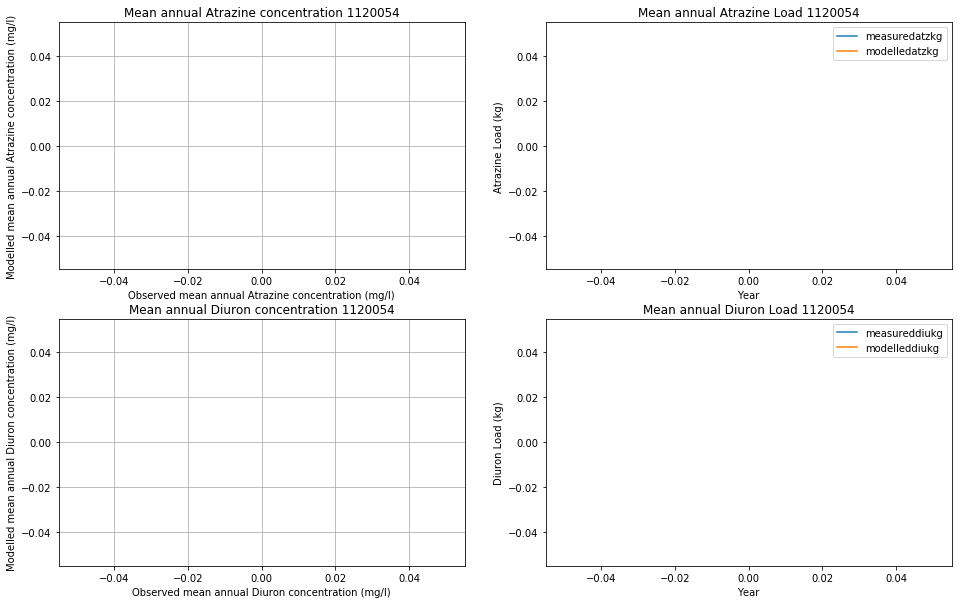

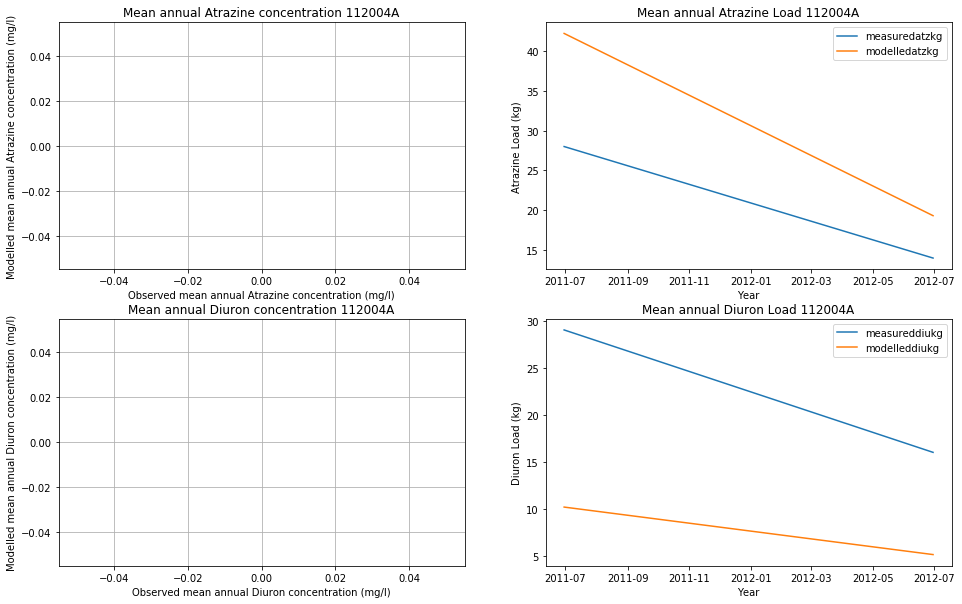

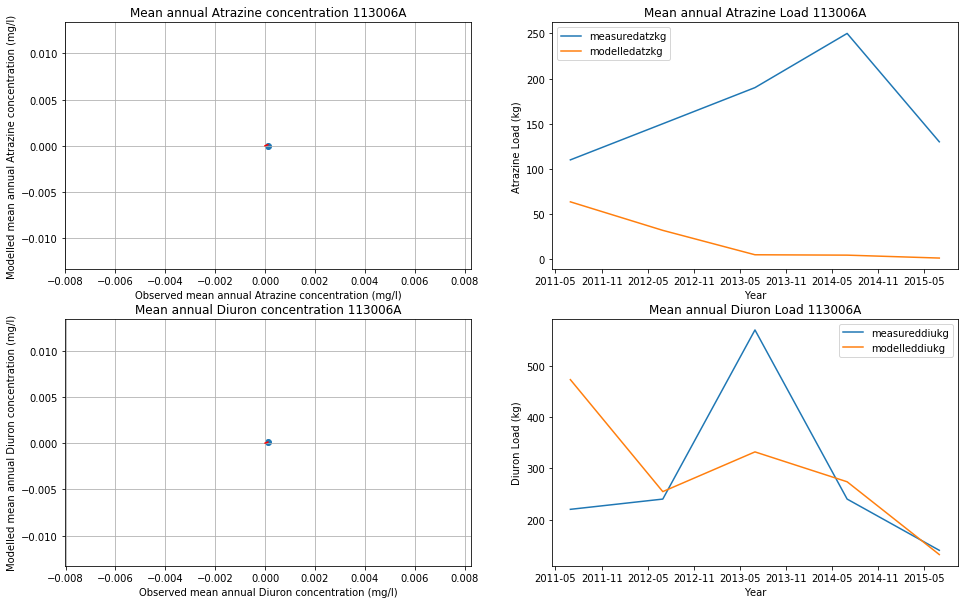

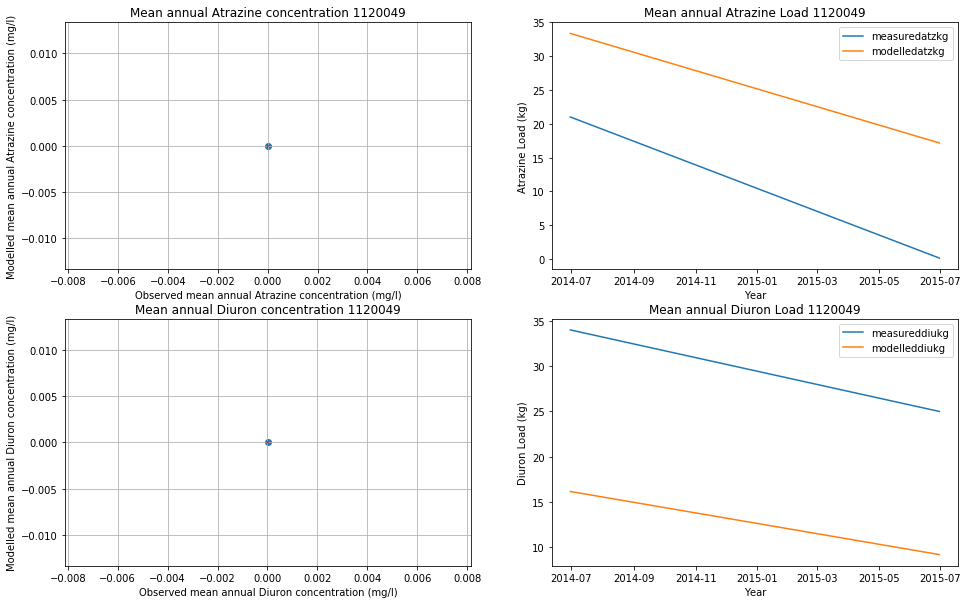

In [47]:
# rerun the model for 100% Atrazine and Diuron

# Approach here is to apply 100% in the plugin. this should then be the benchmark from which to increase the amount to 
# between 1 and 0 to match the mean annual concentrations. This will also indicate other catchment sources. 

# Import the WQ Annual loads database first to compare mean annual loads. 
WQ_Annual_Loads=pd.read_csv("C:/Tully/WQ_Data/Annual_PLoads2.csv",parse_dates=['Year_end'])

#Now make the dates column as the index so we can do time series plots and analysis on it
WQ_Annual_Loads.index = WQ_Annual_Loads.Year_end

# snip out the Tully and Johnston bits
wqalp = WQ_Annual_Loads.loc[(WQ_Annual_Loads['Basin'] == "Tully") | (WQ_Annual_Loads['Basin'] == "Johnstone")] 
#print(wqalp)
 
# snip out the individual sites, convert to a list, then to a set to remove duplicates, then back to a list 
# list the sites
site_listp = wqalp["Gauging station"].tolist()
site_setp = set(site_listp)
site_listp = list(site_setp)

atzloads = []
diuloads = []

# bring in the amended Atrazine and Diuron load time series
# the dates in this series have already been made to mm/dd/yyyy for ease of import
# the column series names have also been reduced for ease of processing??
modelled_atrazine=pd.read_csv("C:/Tully/Modelled_100Atrazine_kg.csv",parse_dates=['Date'])
modelled_diuron=pd.read_csv("C:/Tully/Modelled_100Diuron_kg.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
modelled_atrazine.index = modelled_atrazine.Date
modelled_diuron.index = modelled_diuron.Date
# Remove the Date column from the data columns
del modelled_atrazine['Date']
del modelled_diuron['Date']

annual_atrazine = modelled_atrazine.resample('A-Jun').sum()
annual_diuron = modelled_diuron.resample('A-Jun').sum()
  
#Step through the list and create dataframe for each site for Atrazine and Diuron
for r in (site_listp):
    
    wqp = wqalp.loc[(wqalp['Gauging station'] == r)]
    #wqdin = wq[["Year","Basin","Gauging station","Method"," Discharge (ML) "," Dissolved inorganic nitrogen (t) "]]
    #Calculate the mean annaul concentration for DIN
    wqdiu = wqp["Total Diuron mass load (kg)"]
    wqatr = wqp["Total Atrazine mass load (kg)"]
    
    wqdiua = wqdiu.resample('A-Jun').sum()
    wqatra = wqatr.resample('A-Jun').sum()
    
    #There is no ML data in the pesticide database, so grab the DIN one. 
    gaugedML = wq[" Discharge (ML) "]
    gaugedML = gaugedML.resample('A-Jun').sum()
    
    #Join them
    gaugeddiu = pd.concat([wqdiua, gaugedML],axis=1, join='inner')
    gaugedatr = pd.concat([wqatra, gaugedML],axis=1, join='inner')
    
    # Rename some dataframe columns to help with the next step
    gaugeddiu.columns = ['kgg', 'MLg']
    gaugedatr.columns = ['kgg', 'MLg'] 
    
    # calculate the mean annual concentrations
    gaugeddiuconc = gaugeddiu['kgg']/gaugeddiu['MLg']
    gaugedatrconc = gaugedatr['kgg']/gaugedatr['MLg']
    
    #Now get the site specific data out of the modelled time series
    wqma = annual_atrazine.filter(regex=r)
    wqmd = annual_diuron.filter(regex=r)
    
    hym = annual_mod_aps_gauges.filter(regex=r)  # this should be the modelled flows at the gauges
    
    #Join them
    modelledatr = pd.concat([wqma, hym],axis=1, join='inner')
    modelleddiu = pd.concat([wqmd, hym],axis=1, join='inner')
    
    # Rename some dataframe columns to help with the next step
    modelledatr.columns = ['kg', 'ML']
    modelleddiu.columns = ['kg', 'ML']
    
    # calculate the mean annual concentrations
    modelledatrconc = modelledatr['kg']/modelledatr['ML']
    modelleddiuconc = modelleddiu['kg']/modelleddiu['ML']
    
    ###########################################################################
    # Join the observed and modelled dataframes
    wqatload = pd.concat([wqatra, wqma],axis=1, join='inner') # Join annual Atrazine measured and modelled 
    wqatload.columns = ['measuredatzkg','modelledatzkg']# atrazine dataframe
    
    wqdiload = pd.concat([wqdiua, wqmd],axis=1, join='inner') # Join annual Diuron measured and modelled 
    wqdiload.columns = ['measureddiukg','modelleddiukg']# Diuron dataframe

    
    flows = pd.concat([gaugedML,hym],axis=1,join='inner')
    flows.columns = ['measuredML','modelledML']
    
    wqatconc = pd.concat([gaugedatrconc,modelledatrconc],axis=1,join='inner') # join the annual modelled and measured gauged concentrations
    wqatconc.columns = ['measuredatz','modelledatz'] # rename colums to make later steps easier
    
    wqdiconc = pd.concat([gaugeddiuconc,modelleddiuconc],axis=1,join='inner') # join the annual modelled and measured gauged concentrations
    wqdiconc.columns = ['measureddiu','modelleddiu'] # rename colums to make later steps easier
    #print(wqconc)
    
    
    atzloads.append(wqatload)
    diuloads.append(wqdiload)
    
    #Use the obs and modelled values from the combined dataframes to ensure the same periods are used

    #Sum the measured and modelled data
    atzobsload=wqatload['measuredatzkg'].sum()
    atzmodload=wqatload['modelledatzkg'].sum()
    diuobsload=wqdiload['measureddiukg'].sum()
    diumodload=wqdiload['modelleddiukg'].sum()
    
    obsflow=flows['measuredML'].sum()
    modflow=flows['modelledML'].sum()
    
    atzobs_annual_conc=atzobsload/obsflow
    atzmod_annual_conc=atzmodload/modflow
    
    diuobs_annual_conc=diuobsload/obsflow
    diumod_annual_conc=diumodload/modflow 
    
    #print(modload,obsload)
    print("gauge = ",r)
    print("mean annual estimated observed Atrazine concentration = ", round(atzobs_annual_conc,6)*1000,"ug/L")
    print("mean annual modelled Atrazine concentration = ", round(atzmod_annual_conc,6)*1000,"ug/L")
    print("total Atrazine modelled load = ", round(atzmodload,0),"kg")
    print("total Atrazine observed load = ", round(atzobsload,0),"kg")
    print()
    
    print("mean annual estimated observed Diuron concentration = ", round(diuobs_annual_conc,6)*1000,"ug/L")
    print("mean annual modelled Diuron concentration = ", round(diumod_annual_conc,6)*1000,"ug/L")
    print("total Diuron modelled load = ", round(diumodload,0),"kg")
    print("total Diuron observed load = ", round(diuobsload,0),"kg")
    print()
        
    # now output suggested Atrazine parameters for the plugin
    print("Proprtion of Atrazine to apply = ", round(1-((atzmod_annual_conc-atzobs_annual_conc)/atzmod_annual_conc),3))
    print("Proprtion of Diuron to apply = ", round(1-((diumod_annual_conc-diuobs_annual_conc)/diumod_annual_conc),3))
    print("The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources")
    print()    
    
    #set the laod time series to put in the plots
    atzobsload = wqatload['measuredatzkg']
    atzmodload = wqatload['modelledatzkg']
    
    diuobsload = wqdiload['measureddiukg']
    diumodload = wqdiload['modelleddiukg']
    
    #produce a scatter plot of measured and modelled concentrations and a chart of the loads. 
    # 4 charts with scatter of conc vs conc and load time series as line plot
    
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,1)
    plt.scatter(wqatconc['measuredatz'],wqatconc['modelledatz'])
    plt.grid(which = 'both')
    plt.plot([0,wqatconc['measuredatz'].max()],[0,wqatconc['measuredatz'].max()],'r')
    plt.xlabel('Observed mean annual Atrazine concentration (mg/l)')
    plt.ylabel('Modelled mean annual Atrazine concentration (mg/l)')
    plt.title('Mean annual Atrazine concentration ' + r)
    
    plt.subplot(2,2,2)
    plt.plot(atzobsload)
    plt.plot(atzmodload)
    plt.xlabel('Year')
    plt.ylabel('Atrazine Load (kg)')
    plt.title('Mean annual Atrazine Load ' + r)
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.scatter(wqdiconc['measureddiu'],wqdiconc['modelleddiu'])
    plt.grid(which = 'both')
    plt.plot([0,wqdiconc['measureddiu'].max()],[0,wqdiconc['measureddiu'].max()],'r')
    plt.xlabel('Observed mean annual Diuron concentration (mg/l)')
    plt.ylabel('Modelled mean annual Diuron concentration (mg/l)')
    plt.title('Mean annual Diuron concentration ' + r)
    
    plt.subplot(2,2,4)
    plt.plot(diuobsload)
    plt.plot(diumodload)
    plt.xlabel('Year')
    plt.ylabel('Diuron Load (kg)')
    plt.title('Mean annual Diuron Load ' + r)
    plt.legend()
    
    #wqload.plot.bar()

gauge =  1120054
mean annual estimated observed Atrazine concentration =  0.0 ug/L
mean annual modelled Atrazine concentration =  0.0 ug/L
total Atrazine modelled load =  0.0 kg
total Atrazine observed load =  0.0 kg

mean annual estimated observed Diuron concentration =  0.0 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg
total Diuron observed load =  0.0 kg

Proprtion of Atrazine to apply =  nan
Proprtion of Diuron to apply =  nan
The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources

gauge =  112004A
mean annual estimated observed Atrazine concentration =  0.019 ug/L
mean annual modelled Atrazine concentration =  0.030000000000000002 ug/L
total Atrazine modelled load =  58.0 kg
total Atrazine observed load =  42.0 kg

mean annual estimated observed Diuron concentration =  0.020999999999999998 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:145: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: divide by zero encountered in double_scalars


gauge =  113006A
mean annual estimated observed Atrazine concentration =  0.378 ug/L
mean annual modelled Atrazine concentration =  0.002 ug/L
total Atrazine modelled load =  5.0 kg
total Atrazine observed load =  830.0 kg

mean annual estimated observed Diuron concentration =  0.642 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg
total Diuron observed load =  1410.0 kg

Proprtion of Atrazine to apply =  233.525
Proprtion of Diuron to apply =  inf
The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources

gauge =  1120049
mean annual estimated observed Atrazine concentration =  0.01 ug/L
mean annual modelled Atrazine concentration =  0.025 ug/L
total Atrazine modelled load =  50.0 kg
total Atrazine observed load =  21.0 kg

mean annual estimated observed Diuron concentration =  0.027 ug/L
mean annual modelled Diuron concentration =  0.0 ug/L
total Diuron modelled load =  0 kg
total Diuron obs

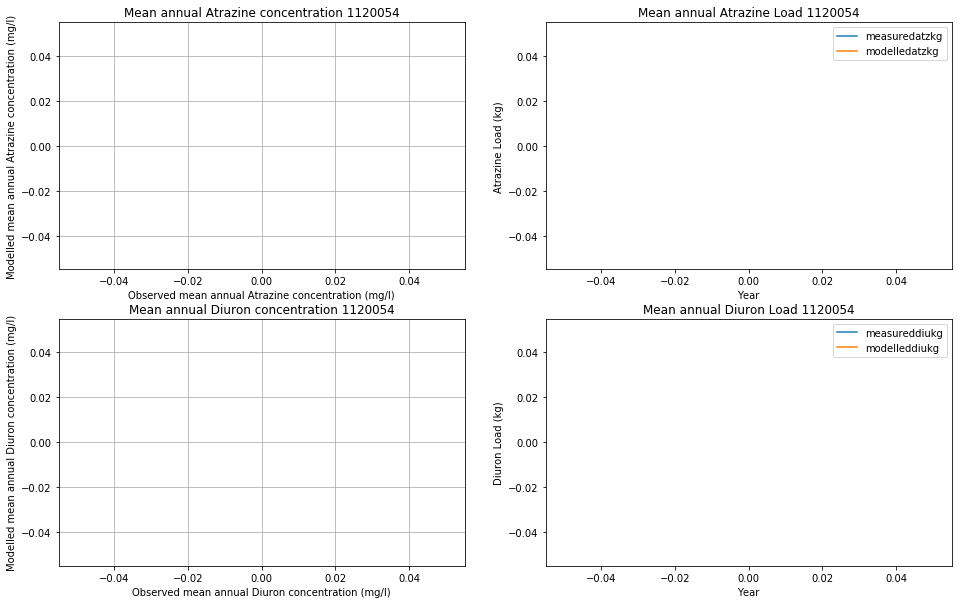

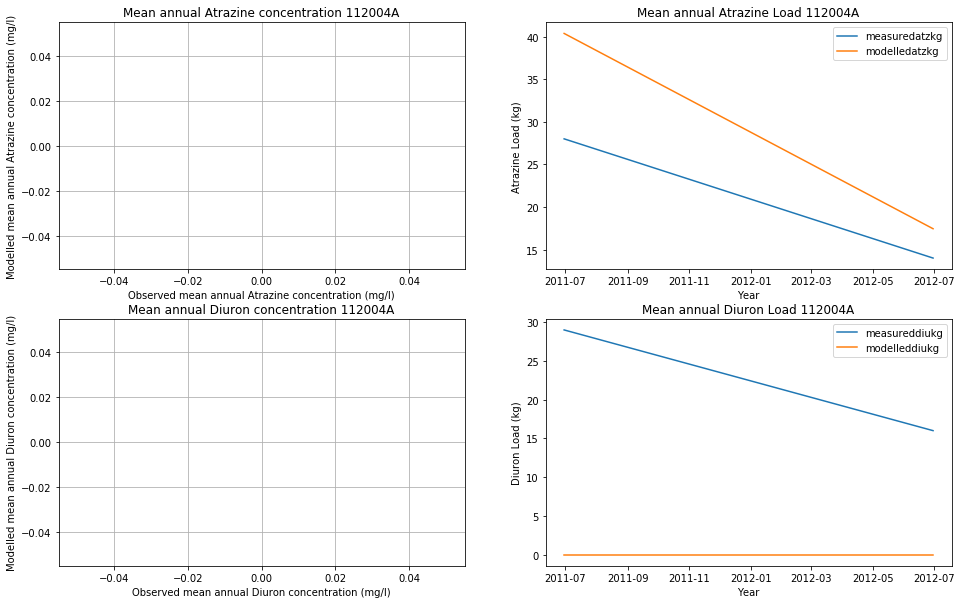

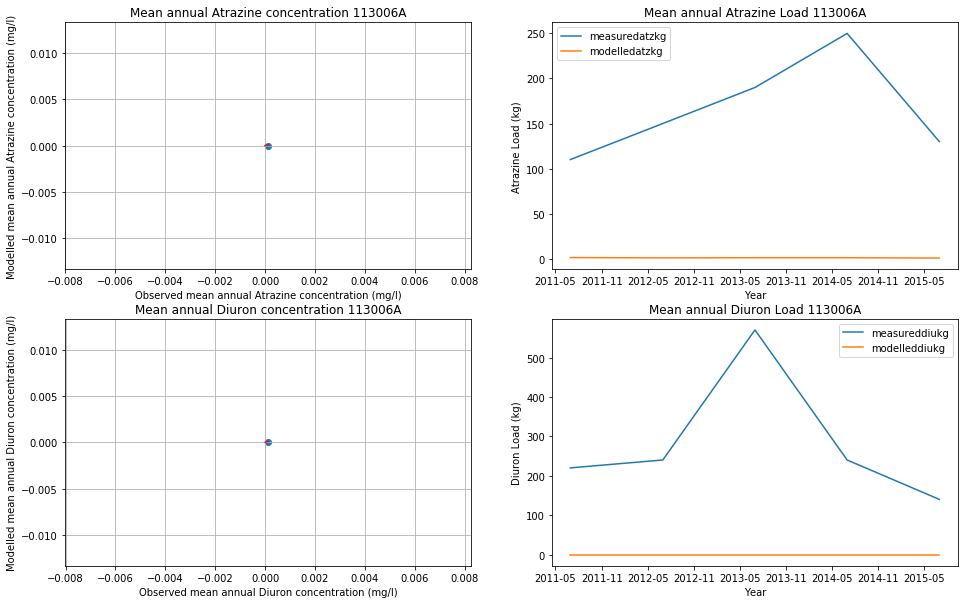

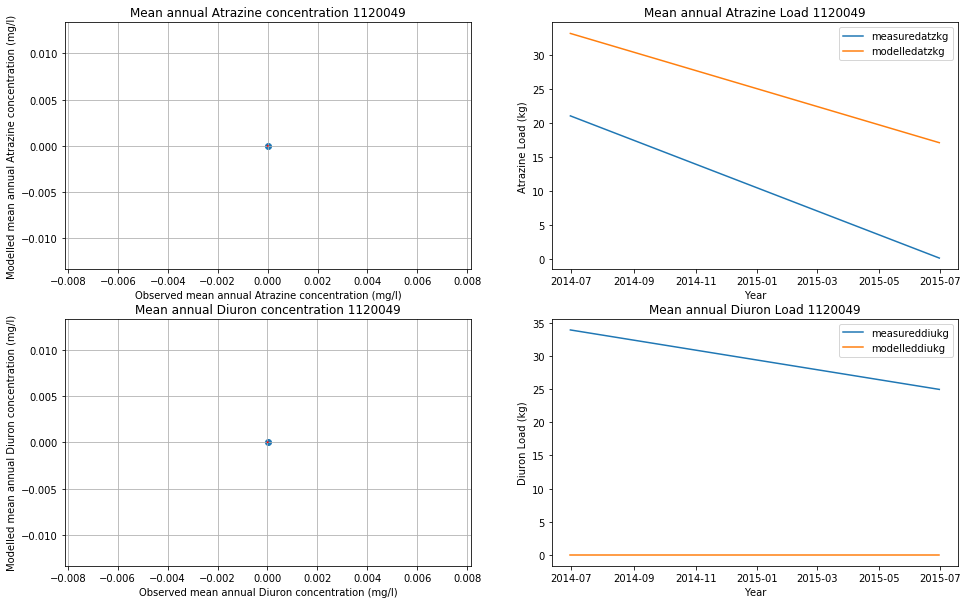

In [49]:
# this hasnt been run yet..........this module currently has the same data as the one above - need to rerun the
# model with data with data that you think is best

# re-evaluate the concentration and and loads with the applied delivery ratios
# rerun the model for adjjusted Atrazine and Diuron

# Approach here is to apply % in the plugin.  

# Import the WQ Annual loads database first to compare mean annual loads. 
WQ_Annual_Loads=pd.read_csv("C:/Tully/WQ_Data/Annual_PLoads2.csv",parse_dates=['Year_end'])

#Now make the dates column as the index so we can do time series plots and analysis on it
WQ_Annual_Loads.index = WQ_Annual_Loads.Year_end

# snip out the Tully and Johnston bits
wqalp = WQ_Annual_Loads.loc[(WQ_Annual_Loads['Basin'] == "Tully") | (WQ_Annual_Loads['Basin'] == "Johnstone")] 
#print(wqalp)
 
# snip out the individual sites, convert to a list, then to a set to remove duplicates, then back to a list 
# list the sites
site_listp = wqalp["Gauging station"].tolist()
site_setp = set(site_listp)
site_listp = list(site_setp)

atzloads = []
diuloads = []

# bring in the amended Atrazine and Diuron load time series
# the dates in this series have already been made to mm/dd/yyyy for ease of import
# the column series names have also been reduced for ease of processing??
modelled_atrazine=pd.read_csv("C:/Tully/Modelled_adjustedAtrazine_kg.csv",parse_dates=['Date'])
modelled_diuron=pd.read_csv("C:/Tully/Modelled_adjustedDiuron_kg.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
modelled_atrazine.index = modelled_atrazine.Date
modelled_diuron.index = modelled_diuron.Date
# Remove the Date column from the data columns
del modelled_atrazine['Date']
del modelled_diuron['Date']

annual_atrazine = modelled_atrazine.resample('A-Jun').sum()
annual_diuron = modelled_diuron.resample('A-Jun').sum()
  
#Step through the list and create dataframe for each site for Atrazine and Diuron
for r in (site_listp):
    
    wqp = wqalp.loc[(wqalp['Gauging station'] == r)]
    #wqdin = wq[["Year","Basin","Gauging station","Method"," Discharge (ML) "," Dissolved inorganic nitrogen (t) "]]
    #Calculate the mean annaul concentration for DIN
    wqdiu = wqp["Total Diuron mass load (kg)"]
    wqatr = wqp["Total Atrazine mass load (kg)"]
    
    wqdiua = wqdiu.resample('A-Jun').sum()
    wqatra = wqatr.resample('A-Jun').sum()
    
    #There is no ML data in the pesticide database, so grab the DIN one. 
    gaugedML = wq[" Discharge (ML) "]
    gaugedML = gaugedML.resample('A-Jun').sum()
    
    #Join them
    gaugeddiu = pd.concat([wqdiua, gaugedML],axis=1, join='inner')
    gaugedatr = pd.concat([wqatra, gaugedML],axis=1, join='inner')
    
    # Rename some dataframe columns to help with the next step
    gaugeddiu.columns = ['kgg', 'MLg']
    gaugedatr.columns = ['kgg', 'MLg'] 
    
    # calculate the mean annual concentrations
    gaugeddiuconc = gaugeddiu['kgg']/gaugeddiu['MLg']
    gaugedatrconc = gaugedatr['kgg']/gaugedatr['MLg']
    
    #Now get the site specific data out of the modelled time series
    wqma = annual_atrazine.filter(regex=r)
    wqmd = annual_diuron.filter(regex=r)
    
    hym = annual_mod_aps_gauges.filter(regex=r)  # this should be the modelled flows at the gauges
    
    #Join them
    modelledatr = pd.concat([wqma, hym],axis=1, join='inner')
    modelleddiu = pd.concat([wqmd, hym],axis=1, join='inner')
    
    # Rename some dataframe columns to help with the next step
    modelledatr.columns = ['kg', 'ML']
    modelleddiu.columns = ['kg', 'ML']
    
    # calculate the mean annual concentrations
    modelledatrconc = modelledatr['kg']/modelledatr['ML']
    modelleddiuconc = modelleddiu['kg']/modelleddiu['ML']
    
    ###########################################################################
    # Join the observed and modelled dataframes
    wqatload = pd.concat([wqatra, wqma],axis=1, join='inner') # Join annual Atrazine measured and modelled 
    wqatload.columns = ['measuredatzkg','modelledatzkg']# atrazine dataframe
    
    wqdiload = pd.concat([wqdiua, wqmd],axis=1, join='inner') # Join annual Diuron measured and modelled 
    wqdiload.columns = ['measureddiukg','modelleddiukg']# Diuron dataframe

    
    flows = pd.concat([gaugedML,hym],axis=1,join='inner')
    flows.columns = ['measuredML','modelledML']
    
    wqatconc = pd.concat([gaugedatrconc,modelledatrconc],axis=1,join='inner') # join the annual modelled and measured gauged concentrations
    wqatconc.columns = ['measuredatz','modelledatz'] # rename colums to make later steps easier
    
    wqdiconc = pd.concat([gaugeddiuconc,modelleddiuconc],axis=1,join='inner') # join the annual modelled and measured gauged concentrations
    wqdiconc.columns = ['measureddiu','modelleddiu'] # rename colums to make later steps easier
    #print(wqconc)
    
    
    atzloads.append(wqatload)
    diuloads.append(wqdiload)
    
    #Use the obs and modelled values from the combined dataframes to ensure the same periods are used

    #Sum the measured and modelled data
    atzobsload=wqatload['measuredatzkg'].sum()
    atzmodload=wqatload['modelledatzkg'].sum()
    diuobsload=wqdiload['measureddiukg'].sum()
    diumodload=wqdiload['modelleddiukg'].sum()
    
    obsflow=flows['measuredML'].sum()
    modflow=flows['modelledML'].sum()
    
    atzobs_annual_conc=atzobsload/obsflow
    atzmod_annual_conc=atzmodload/modflow
    
    diuobs_annual_conc=diuobsload/obsflow
    diumod_annual_conc=diumodload/modflow 
    
    #print(modload,obsload)
    print("gauge = ",r)
    print("mean annual estimated observed Atrazine concentration = ", round(atzobs_annual_conc,6)*1000,"ug/L")
    print("mean annual modelled Atrazine concentration = ", round(atzmod_annual_conc,6)*1000,"ug/L")
    print("total Atrazine modelled load = ", round(atzmodload,0),"kg")
    print("total Atrazine observed load = ", round(atzobsload,0),"kg")
    print()
    
    print("mean annual estimated observed Diuron concentration = ", round(diuobs_annual_conc,6)*1000,"ug/L")
    print("mean annual modelled Diuron concentration = ", round(diumod_annual_conc,6)*1000,"ug/L")
    print("total Diuron modelled load = ", round(diumodload,0),"kg")
    print("total Diuron observed load = ", round(diuobsload,0),"kg")
    print()
        
    # now output suggested Atrazine parameters for the plugin
    print("Proprtion of Atrazine to apply = ", round(1-((atzmod_annual_conc-atzobs_annual_conc)/atzmod_annual_conc),3))
    print("Proprtion of Diuron to apply = ", round(1-((diumod_annual_conc-diuobs_annual_conc)/diumod_annual_conc),3))
    print("The proportion of Atrazine or Diuron to apply will depend on the contribution from other catchment sources")
    print()    
    
    #set the laod time series to put in the plots
    atzobsload = wqatload['measuredatzkg']
    atzmodload = wqatload['modelledatzkg']
    
    diuobsload = wqdiload['measureddiukg']
    diumodload = wqdiload['modelleddiukg']
    
    #produce a scatter plot of measured and modelled concentrations and a chart of the loads. 
    # 4 charts with scatter of conc vs conc and load time series as line plot
    
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,1)
    plt.scatter(wqatconc['measuredatz'],wqatconc['modelledatz'])
    plt.grid(which = 'both')
    plt.plot([0,wqatconc['measuredatz'].max()],[0,wqatconc['measuredatz'].max()],'r')
    plt.xlabel('Observed mean annual Atrazine concentration (mg/l)')
    plt.ylabel('Modelled mean annual Atrazine concentration (mg/l)')
    plt.title('Mean annual Atrazine concentration ' + r)
    
    plt.subplot(2,2,2)
    plt.plot(atzobsload)
    plt.plot(atzmodload)
    plt.xlabel('Year')
    plt.ylabel('Atrazine Load (kg)')
    plt.title('Mean annual Atrazine Load ' + r)
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.scatter(wqdiconc['measureddiu'],wqdiconc['modelleddiu'])
    plt.grid(which = 'both')
    plt.plot([0,wqdiconc['measureddiu'].max()],[0,wqdiconc['measureddiu'].max()],'r')
    plt.xlabel('Observed mean annual Diuron concentration (mg/l)')
    plt.ylabel('Modelled mean annual Diuron concentration (mg/l)')
    plt.title('Mean annual Diuron concentration ' + r)
    
    plt.subplot(2,2,4)
    plt.plot(diuobsload)
    plt.plot(diumodload)
    plt.xlabel('Year')
    plt.ylabel('Diuron Load (kg)')
    plt.title('Mean annual Diuron Load ' + r)
    plt.legend()
    
    #wqload.plot.bar()


<h1><center></center></h1>
<h1><center>Part 6: Additional Water Quality Model Evaluation Tools </center></h1>

In this module, additional charts and data are developed to further evaluate the model performance. 

Typically these additinal tools include:
- Water quality data distribution matching
- Monthly box plots of modelled and measured water quality data on a site by site basis and overall; and
- Flow threshold based box plots of modelled and observed data (TBC)

In this module, the available site based water quality data is loaded to the notebook as a dataframe, in addition to once again referencing the flow observations and modelled concentrations. 

The intent of these tools is to provide visual assessments (and potential data outputs) to aid model assessments. In previous sections of this notebook, we looked to apply APSIM flows and loads to agree with typical flow statistics and mean annual concentrations. Here, we dive a bit deeper and look at monthly concentration correlations, and flow based concentration profiles. 

In [5]:
# load in the entire WQ sample based dataframe. 

In [50]:
# Import the WQ sample database. 
WQ_Conc=pd.read_csv("C:/Tully/WQ_Data/WQData_Conc2.csv",parse_dates=['Date_time'],low_memory=False)

# got lots of errors here - have changed some headings, removed commas etc. but now it loads.
# try and encode the csv as csv UTF-8, not sure if that helps, but the main thing that dis was to include 
# low_memory = false
# I added a column for DIN. It was easier to do in excel I think
WQ_Conc.index=WQ_Conc.Date_time
print(WQ_Conc.index)

DatetimeIndex(['2006-01-31 09:00:00', '2006-01-31 17:00:00',
               '2006-01-02 08:30:00', '2006-01-02 17:00:00',
               '2006-02-02 08:00:00', '2006-02-02 16:00:00',
               '2006-03-02 09:00:00', '2006-03-02 17:00:00',
               '2006-04-02 09:00:00', '2006-05-02 09:00:00',
               ...
               '2016-06-20 13:28:00', '2016-06-20 19:36:00',
               '2016-06-21 01:44:00', '2016-06-21 07:52:00',
               '2016-06-23 10:08:00', '2016-06-23 22:16:00',
               '2016-06-24 10:24:00', '2016-06-24 22:32:00',
               '2016-06-25 10:40:00', '2016-06-28 08:30:00'],
              dtype='datetime64[ns]', name='Date_time', length=12449, freq=None)


In [51]:
# list the column headings
list(WQ_Conc)

['Station',
 'Station name',
 'Sample number',
 'Sample Type',
 'Date',
 'Time',
 'Sample source',
 'Collection Authority',
 'Cellection method',
 'Preservation method 1',
 'Preservation method 2',
 'Lab reference',
 'Date_time',
 'Conductivity (2010.2)',
 'Quality',
 'Conductivity  (2010.5)',
 'Quality.1',
 'Turbidity (NTU) (2030.2)',
 'Quality.2',
 'Turbidity (NTU) (2030.5)',
 'Quality.3',
 'pH (2100.2)',
 'Quality.4',
 'pH  (2100.5)',
 'Quality.5',
 'Total suspended solids (mg/L) (2172.2)',
 'Quality.6',
 'Particulate nitrogen (mg/L) (2330.2)',
 'Quality.7',
 'Total Kjeldahl nitrogen (mg/L) (2336.2)',
 'Quality.8',
 'Total nitrogen (mg/L) (2337.2)',
 'Quality.9',
 'Oxidised nitrogen (mg/L) (2343.2)',
 'Quality.10',
 'Ammonium nitrogen (mg/L) (2345.2)',
 'Quality.11',
 'Dissolved Kjeldahl nitrogen (mg/L) (2350.2)',
 'Quality.12',
 'Dissolved organic nitrogen (mg/L) (2356.2)',
 'Quality.13',
 'DIN (mg/L derived)',
 'Total phosphorus (mg/L) (2360.2)',
 'Quality.14',
 'Filterable reacti

In [8]:
# pull out the data for specific sites that correspond to specific parameters. The program will pull the data based on
# site (Station), so a list of gauge sites is needed. next, a list of parameters is needed. eg Diuron, Atrazine DIN
# the program will return all columns with those names. It will either sum or average the data if there are duplicates. 

In [52]:
#############need to make this a program for DIN and another for pesticides############
## Reason being that DIN is in mg/l and pesticides are in ug/l, so conversion is needed - could be programmed in at later date

def wqdatacorrelation(dfobs,dfmod,dfsitelist,dfparameter):
    
    #dfobs is the dataframe containing the observation time series (WQ_Conc)
    #dfmod is the dataframe ocntaining the modelled time series. This needs to be the concentration time series. 
    #dfsitelist is the dataframe containing the list of sites to compare
    #parameter is the parameter we want to compare. DIN, Atrazine or Diuron
    
    
    site_list = dfsitelist["location"].tolist()
    parameter_list = dfparameter["parameter"].tolist()

    for s in (site_list):

        #retrieve the data series from the modelled and observed dataframes
        mdf = pd.DataFrame(dfmod.filter(like=s))
        odf = dfobs.loc[(dfobs['Station'] == s)]
        
        # now we want to grab the flow data that corresponds to the WQ data. 
        # this data is already in the notebook as Obs_gauges and Mod_gauges
        obsflow = pd.DataFrame(Obs_gauges.filter(like=s))
        modflow = pd.DataFrame(Mod_gauges.filter(like=s))
        
        #Now step through the parameter list and start the program
        
        for p in (parameter_list):
                
            #retrieve the parameter specific data from the modelled and observed dataframes
            mdfp = pd.DataFrame(mdf.filter(like=p))
            odfp = pd.DataFrame(odf.filter(like=p))
            mdfp.columns = ['modelled']
            #The data will be full of < symbols, so lets remove the data where we might get them and not include it
            #print(odfp.dtypes)
            odfp = odfp.convert_objects(convert_numeric=True)
            
            odfp['mean'] = odfp.mean(axis=1,numeric_only=True)
            odfp1 = odfp['mean']
            odfp2 = odfp1.dropna()
                        
            #now we want to resample the observed concentration data to daily by taking the mean daily value
            # yes, this technically should be the flow weighted mean daily value, but this is difficult for now. 

            # convert the observed sample database to daily
            odfpd = odfp2.resample('D').mean()
            
            # uncomment the line below if you want outout summary of the data to this point
            #odfpd.to_csv('C:/CRPL/0064_QLD_Water_Modelling_Network/tully/WQ_Data/WQdata'+p+s+'.csv')
            
            #How Many samples do we have to work with
            count = odfp2.count()
            countd = odfpd.count()
            medianobs = odfpd.median()
            
            # Merge the flow and the WQ data. if you get an error here, it may be becuase the 
            # flow data is missing
            mergedobs = pd.concat([obsflow, odfpd], axis=1, join='inner')
            mergedobs.columns = ['obsflowML','qualcode','obswq']
            # we need to drop the na values here so that only sampling days are included in the dataframe
            mergedobs = mergedobs.dropna(axis=0, how='any')
            
            # we do the same here for the modelled data, only there should not be any gaps
            mergedmod = pd.concat([modflow, mdfp], axis=1, join='inner')
            mergedmod.columns = ['modflowML','modwq']
            
            # we can calculate the median observed flow corresponding to collected samples
            medianobsflow = mergedobs['obsflowML'].median()
            
            #print(mergedobs) # uncomment to check the output
            
            ####################################################################################
            # up to this point, we should have the wq data mwith associated flows in some dataframes
            # the next section starts some data analysis
            ####################################################################################
            
            # this bit of code grabs the 10th percentile flows from the observed and modeled time series
            # we want to use the observed flow percentiles (quantiles) to group the modelled data 
            # This will allow us to compare like for like when looking and measured and modelled concentration 
            # distributions. Just doing it for all modelled data will not account for the sampling bias.
            # if more samples were taken during high flow events, we want to sample the modelled distribution 
            # in the same way to specifically compare how the model performs across different flow magnitudes
            
            obsflowquantiles = mergedobs['obsflowML'].quantile(np.linspace(0, 1, 10, 0))
            modflowquantiles = mergedmod['modflowML'].quantile(np.linspace(0, 1, 10, 0))
            flowquantiles = pd.concat([obsflowquantiles, modflowquantiles], axis=1, join='inner')

            # now get the observed 10th percentile flow bins so we can use them to categorise the modelled flows
            obsflowquantiles = pd.DataFrame(obsflowquantiles)
            obsflowquantiles.columns = ['flowbin']
            #print(obsflowquantiles)
            
            
            quantile_list = round(obsflowquantiles["flowbin"],-1).tolist() # rounding here helps in the plotting later
            quantile_list.append(mergedobs['obsflowML'].max())
            #quantile_list.append(mergedobs['obsflowML'].min())
            percentile_list = ["0","10","20","30","40","50","60","70","80","90","100"]
            #print(quantile_list)
            
            # We also want the 10th percentile flow bins for the model time series so that we can plot the flow distribution
            modflowquantiles = pd.DataFrame(modflowquantiles)
            modflowquantiles.columns = ['flowbin']
            modquantile_list = round(modflowquantiles["flowbin"],-1).tolist()
            modquantile_list.append(mergedmod['modflowML'].max()+1)
            
            
            # now we categorise modelled and observed flows into the bins from the days samples were taken
            mergemod_bin = pd.cut(mergedmod['modflowML'],quantile_list,labels=["10","20","30","40","50","60","70","80","90","100"])          
            mergeobs_bin = pd.cut(mergedobs['obsflowML'],quantile_list,labels=["10","20","30","40","50","60","70","80","90","100"])
            mergemod_bin_complete = pd.cut(mergedmod['modflowML'],modquantile_list,labels=["10","20","30","40","50","60","70","80","90","100"])
            
            #print(mergemod_bin) # check out what the merged bin categories look like
            #print(flowquantiles) # check out percentile flows
            
            # merge the observed and modelldd dataframes with the percentile bins
            merged_modelled = pd.concat([mergedmod, mergemod_bin], axis=1, join='inner')
            merged_modelled.columns = ['modflow','modwq','bin']
            
            merged_observed = pd.concat([mergedobs, mergeobs_bin], axis=1, join='inner')
            merged_observed.columns = ['obsflowML','qualcode','obswq','bin']
            
            merged_modelled_complete = pd.concat([mergedmod, mergemod_bin_complete], axis=1, join='inner')
            merged_modelled_complete.columns = ['modflow','modwq','bin']
            
            #print(merged_observed)
            #print(merged_modelled)
            #print(merged_modelled_complete)
            
            #remove na values so we can count the number of obs by group (month or flow band). This has been done already, 
            # but we do it again to check, and in any case, we get a new dataframe to work on so we dont stuff up the other one
            merged_obs_na = merged_observed.dropna(axis=0, how='any')
            
            #print(merged_obs_na)
            #merged_obs_na.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/tully/WQ_Data/WQDatapoints"+p+s+".csv", index=True)
            ##########################################################################################
            # this little section just metches modelled wq to obs to make it easy to do a scatter plot later           
            # merge the WQ data to match sample days with model generated values 
            mergedf = pd.concat([mdfp, odfpd], axis=1, join='inner')
            mergedf.columns = ['modelled','observed']
            #remove na values from the observed data, just in case
            mergedf = mergedf.dropna(axis=0, how='any')
            ########################################################################################
            
            ##########################################################################################
            # In this section, we want to do some calcs to put some number of obs categories on the plots
            # Calculate number of obs per group & median to position labels
            # we need to do this a number of times for the different groups - months and flow bands
            # from : https://python-graph-gallery.com/38-show-number-of-observation-on-boxplot/
            mediansmonths = merged_obs_na.groupby(merged_obs_na.index.month)['obswq'].median().values
            nobmonths = merged_obs_na.index.month.value_counts().values
            nobmonths_str = [str(x) for x in nobmonths.tolist()]
            nobmonths_str = ["n= " + i for i in nobmonths_str]
            
            mediansflows = merged_obs_na.groupby(merged_obs_na['bin'])['obswq'].median().values
            nobflows = merged_obs_na['bin'].value_counts().values
            nobflows_str = [str(x) for x in nobflows.tolist()]
            nobflows_str = ["n= " + i for i in nobflows_str]
            
            #print(nobflows)
            #print(nobmonths_str)
            #print(nobflows_str)
                        
            ###########################################################################################
 
            #Add it to the plot
            #pos = range(len(nobs))
            #for tick,label in zip(pos,ax.get_xticklabels()):
            #ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            #horizontalalignment='center', size='x-small', color='w', weight='semibold')
            
            
            #print some data out
            print("gauge = ",s," ,Parameter = ",p)
            print("total number of observations = ", count)
            print("total number of days with observations = ",countd)
            print("total number of observations used in the analysis = ",nobflows.sum())
            print("median observed concentration = ", round(medianobs,3)," mg/L")
            print("corresponding median observed flow = ", round(medianobsflow,3)," ML/d")
            print()
            #print(mergedf)
            
            # the first plots will be summary plots and include a time series, scatter plot and overall matched distribution
            plt.figure(figsize=(10,8))        
            
            # time series plot of modelled and measured, limited to later years. 
            plt.subplot2grid((2,2),(0,0),colspan=2)
            plt.semilogy(mdfp['modelled'])
            #plt.semilogy(mergedf['observed'],marker='o', color='b')
            plt.scatter(mergedf.index,mergedf['observed'],marker='.', color='r')
            plt.title('Modelled '+p+' concentration mg/L: '+s)
            plt.xlabel('Date')
            plt.ylabel('Concentration (mg/L)')
            plt.legend()
            plt.ylim(0.01,(mergedf['observed'].max()*1.1))
            plt.xlim("2006-06-01", "2014-06-30")
            
            
            plt.subplot2grid((2,2),(1,0))
            plt.scatter(mergedf['modelled'],mergedf['observed'])
            plt.grid(which = 'both')
            #plt.plot([0,wqatconc['measuredatz'].max()],[0,wqatconc['measuredatz'].max()],'r')
            plt.xlabel('Modelled DIN (mg/l)')
            plt.ylabel('Measured DIN (mg/l)')
            plt.title(p+' Daily Correlation, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            plt.xlim(0,(mergedf['observed'].max()*1.1))
            
            plt.subplot2grid((2,2),(1,1))
            boxdata=(mergedf['modelled'],mergedf['observed'])
            #plt.boxplot(mergedf['modelled'])
            plt.boxplot(boxdata)
            plt.xticks([1,2],('modelled','measured',))
            plt.ylabel('DIN mg/L')
            plt.title(p+' Distribution for matching days, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            plt.tight_layout()
            plt.savefig('C:/Tully/WQ_Data/fig'+p+s+'.png', bbox_inches='tight', dpi=300)
            
            # the second set of plots are summary plots of modelled and measured WQ by month and by flow disttribution
            plt.figure(figsize=(16,18))        
            
            plt.subplot2grid((3,2),(0,0))
            seaborn.boxplot(mergedf.index.month, mergedf['modelled'],palette="Blues")
            plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
            plt.ylabel('DIN mg/L')
            plt.title(p+': modelled monthly distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            plt.subplot2grid((3,2),(0,1))
            seaborn.boxplot(merged_obs_na.index.month, merged_obs_na['obswq'],palette="Greens")
            seaborn.swarmplot(merged_obs_na.index.month, merged_obs_na['obswq'], color="r", marker='.')
            ax2=seaborn.boxplot(merged_obs_na.index.month, merged_obs_na['obswq'],palette="Greens")
            plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
            plt.ylabel('DIN mg/L')
            plt.title(p+': observed monthly distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            #try to add number of obs labels to the plot
            # I really wanted this to work, but it doesnt at the moment so will drop it for now
            #pos = range(len(nobmonths_str))
            #for tick,label in zip(pos,ax2.get_xticklabels()):
            #    plt.text(pos[tick], 0.01, nobmonths_str[tick],horizontalalignment='center', size='small')
            
            #These two plots attempt to show the sample distribution according to flow band
            plt.subplot2grid((3,2),(1,0))
            seaborn.boxplot(merged_modelled['bin'], merged_modelled['modwq'],palette="Blues")#.set_yscale('log')
            plt.xticks([0,1,2,3,4,5,6,7,8,9],quantile_list,rotation='vertical')
            plt.xlabel('Modelled water quallity distribution flow exceedance threshold ML/d')
            plt.ylabel('DIN mg/L')
            plt.title(p+': modelled distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            plt.subplot2grid((3,2),(1,1))
            seaborn.boxplot(merged_observed['bin'], merged_observed['obswq'],palette="Greens")
            plt.xticks([0,1,2,3,4,5,6,7,8,9],quantile_list,rotation='vertical')
            plt.xlabel('observed water quallity distribution flow exceedance threshold ML/d')
            plt.ylabel('DIN mg/L')
            plt.title(p+': observed distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            # and the two plots for the modelled flow distribution and the measured flow distribution
            plt.subplot2grid((3,2),(2,0))
            seaborn.boxplot(merged_modelled_complete['bin'], merged_modelled_complete['modflow'],palette="Blues")#.set_yscale('log')
            plt.xticks([0,1,2,3,4,5,6,7,8,9],percentile_list,rotation='vertical')
            plt.xlabel('Flow exceedence bin (%)')
            plt.ylabel('Flow ML/d')
            plt.title(p+': modelled flow distribution, Site: ' + s)
            plt.ylim(0,(merged_observed['obsflowML'].max()*1.1))
            
            plt.subplot2grid((3,2),(2,1))
            seaborn.boxplot(merged_observed['bin'], merged_observed['obsflowML'],palette="Greens")
            #seaborn.swarmplot(merged_observed['bin'], merged_observed['obsflowML'], color="r", marker='.')
            plt.xticks([0,1,2,3,4,5,6,7,8,9],percentile_list,rotation='vertical')
            plt.xlabel('Flow exceedence bin (%)')
            plt.ylabel('Flow (ML/d)')
            plt.title(p+': sampled flows, Site: ' + s)
            plt.ylim(0,(merged_observed['obsflowML'].max()*1.1))
        
            plt.tight_layout()
            plt.savefig('C:/Tully/WQ_Data/boxplot'+p+s+'.png', bbox_inches='tight', dpi=300)

        

In [53]:
#get the data necessary to run wqdatacorrelation(dfobs,dfmod,dfsitelist,dfparameter)
# This data includes a site list, parameter list and modelled WQ concentrations
# In this section, we get enought data for DIN and pesticides

# load in the site list
dfsitelist=pd.read_csv("C:/Tully/WQlocationlist.csv")
# and for pesticides
dfsitelistpesticides=pd.read_csv("C:/Tully/WQlocationlist1.csv")


# Load in the parameter list
dfparameterlist=pd.read_csv("C:/Tully/WQparameterlist.csv")

# and for pesticides
dfparameterlistpesticides=pd.read_csv("C:/Tully/WQparameterlist1.csv")


# load in the modelled WQ concentration data. 
SourceWQ=pd.read_csv("C:/Tully/modelledWQconc_mg-l.csv",parse_dates=['Date'])
SourceWQ.index=SourceWQ.Date
del SourceWQ['Date']
#print(SourceWQ.index)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


gauge =  113006A  ,Parameter =  DIN
total number of observations =  1392
total number of days with observations =  615
total number of observations used in the analysis =  271
median observed concentration =  0.208  mg/L
corresponding median observed flow =  15146.06  ML/d

gauge =  112004A  ,Parameter =  DIN
total number of observations =  169
total number of days with observations =  115
total number of observations used in the analysis =  114
median observed concentration =  0.14  mg/L
corresponding median observed flow =  6553.44  ML/d

gauge =  112101B  ,Parameter =  DIN
total number of observations =  516
total number of days with observations =  356
total number of observations used in the analysis =  355
median observed concentration =  0.154  mg/L
corresponding median observed flow =  2807.07  ML/d

gauge =  113015A  ,Parameter =  DIN
total number of observations =  428
total number of days with observations =  214
total number of observations used in the analysis =  212
media

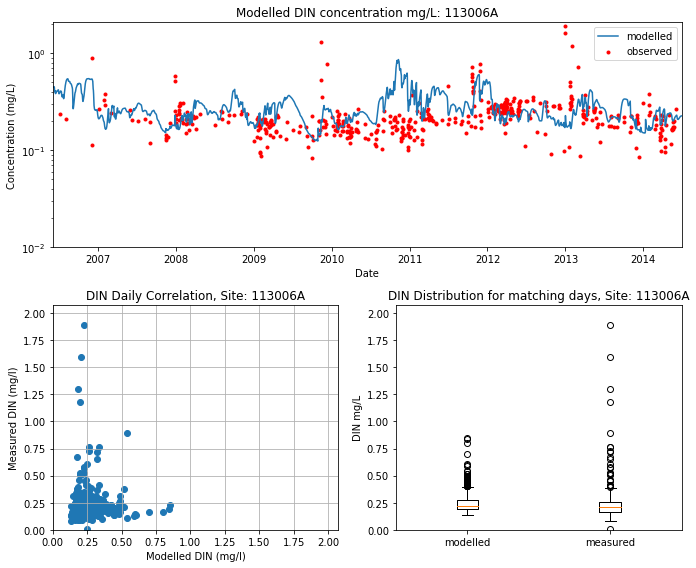

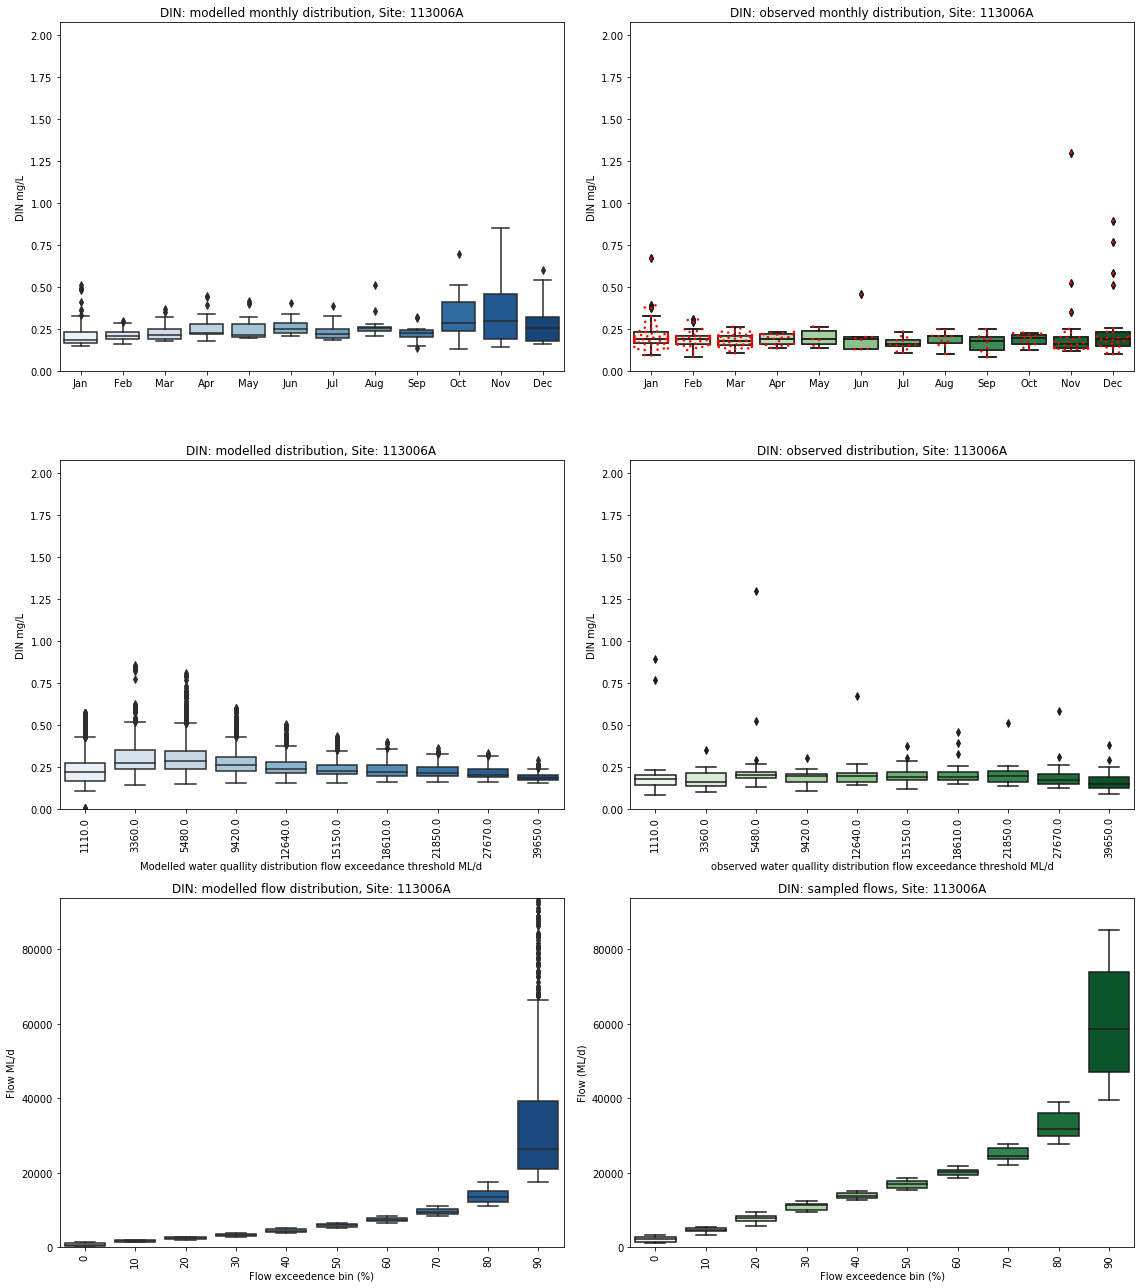

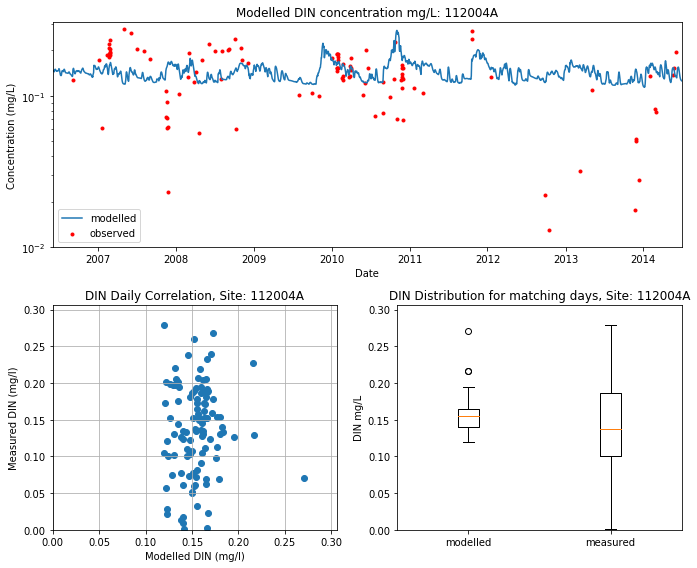

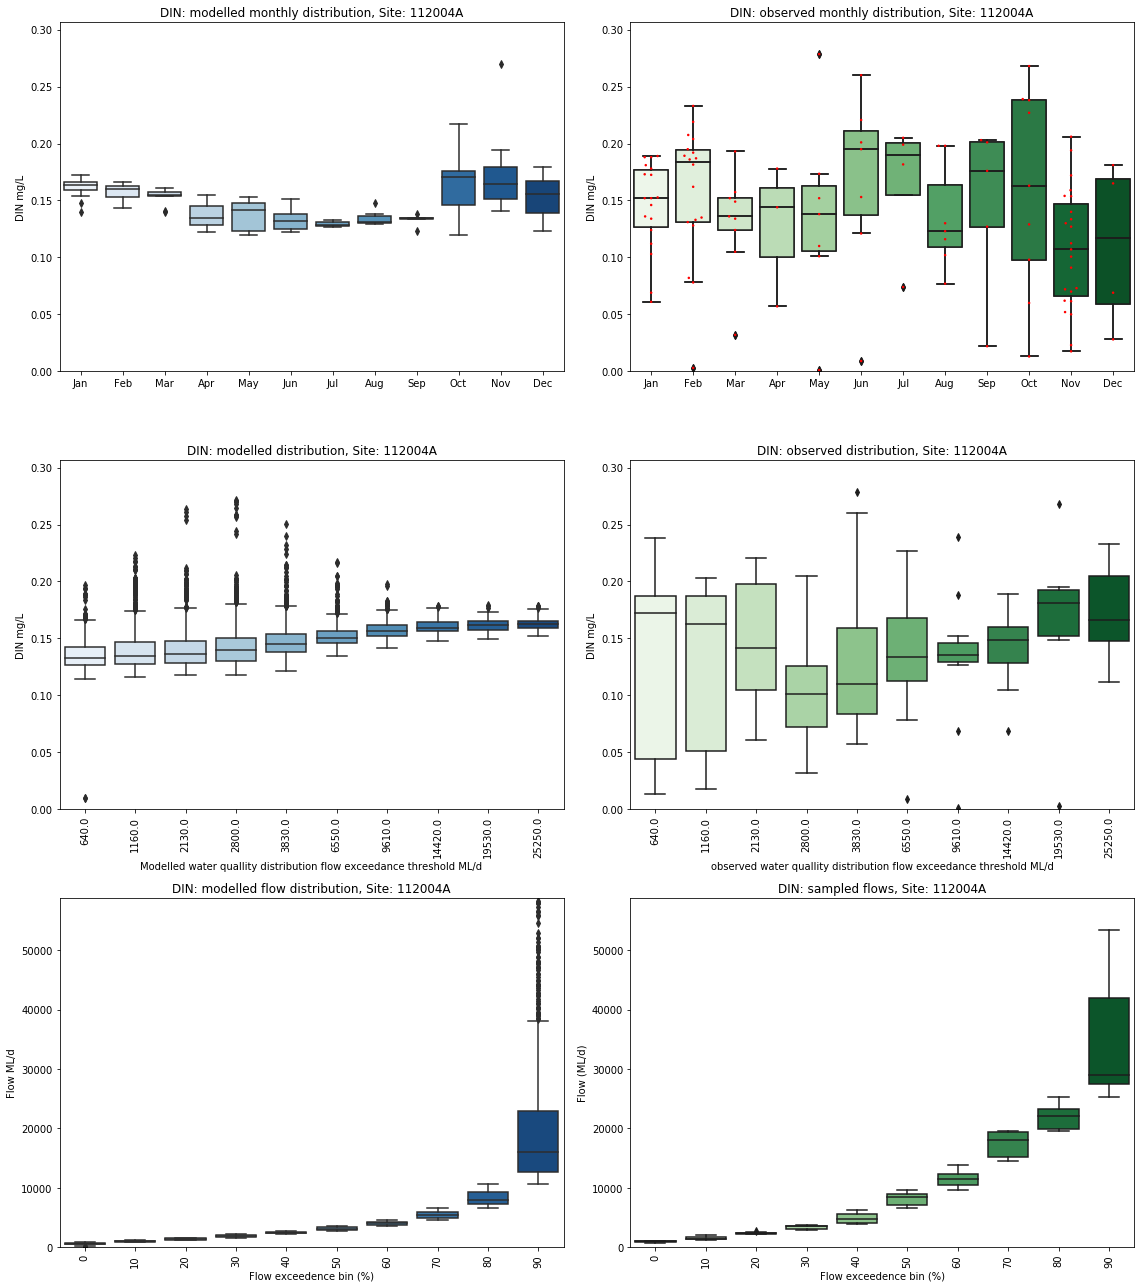

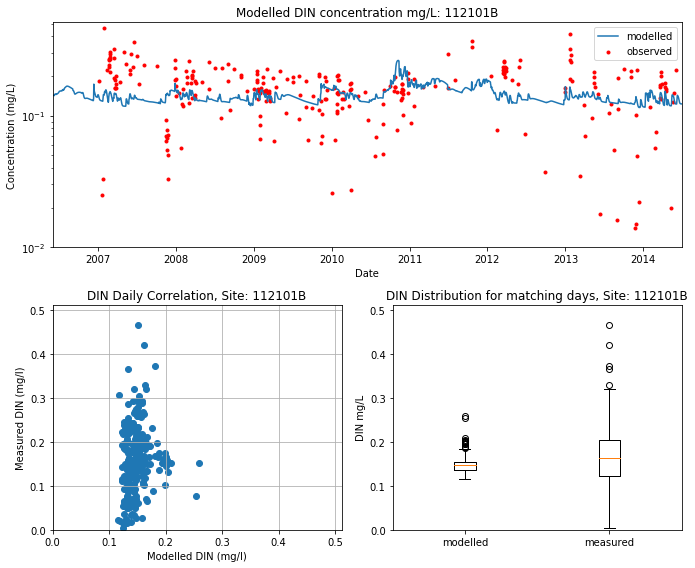

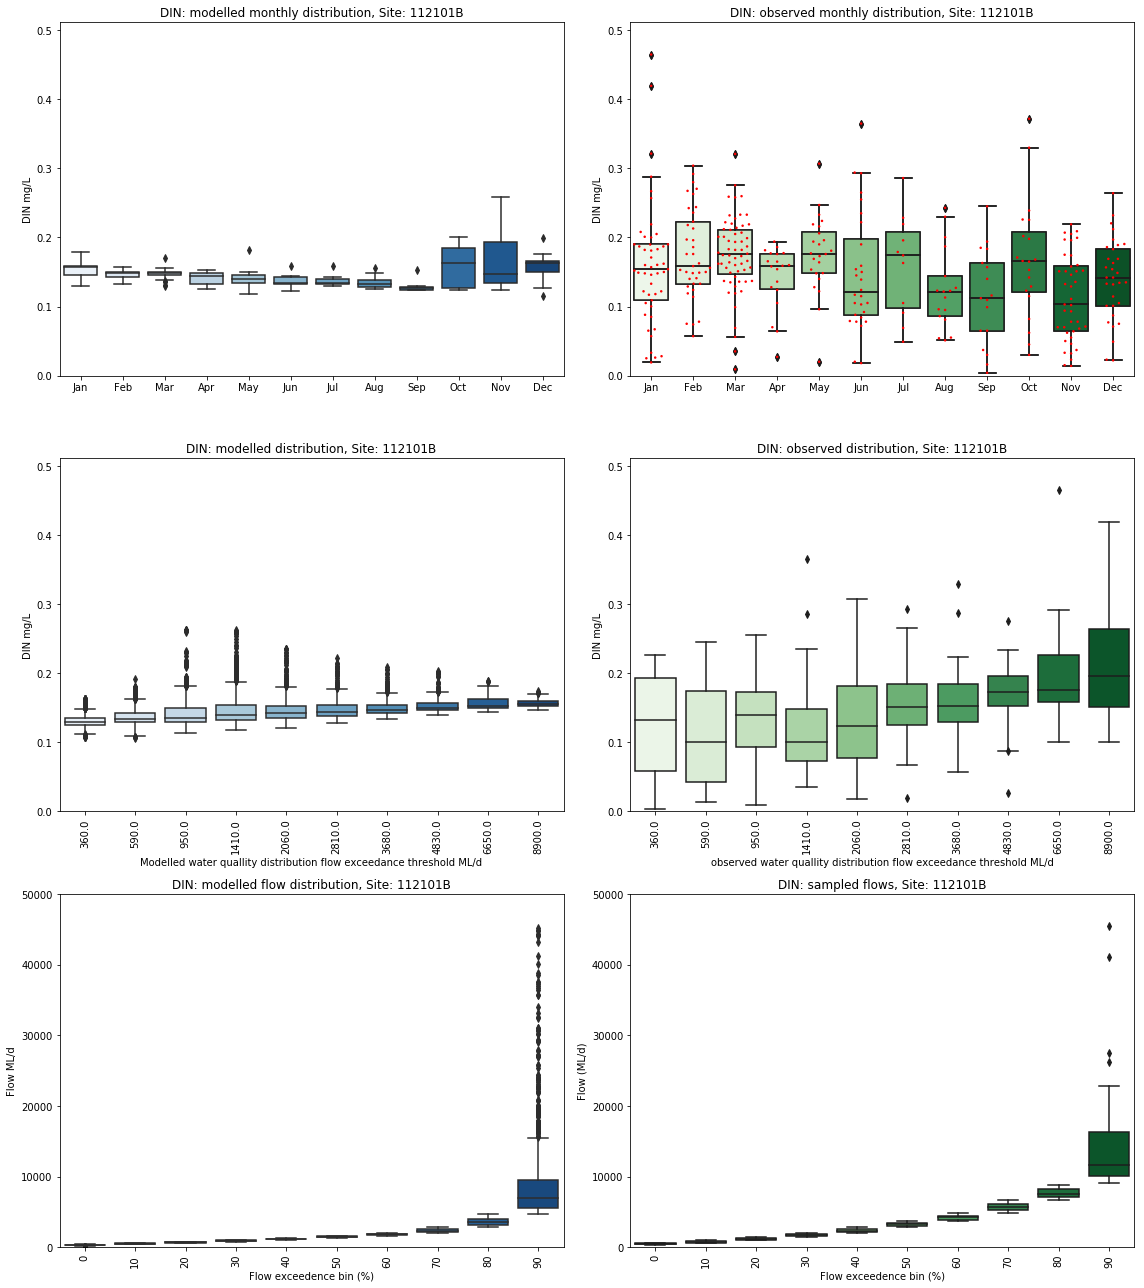

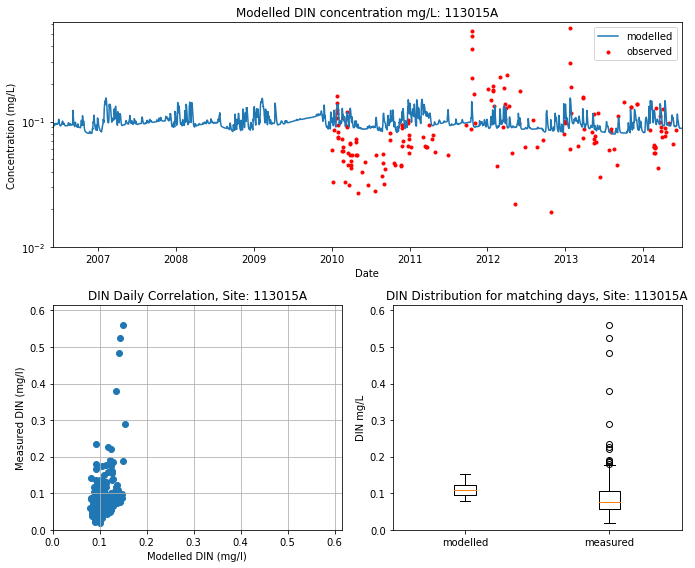

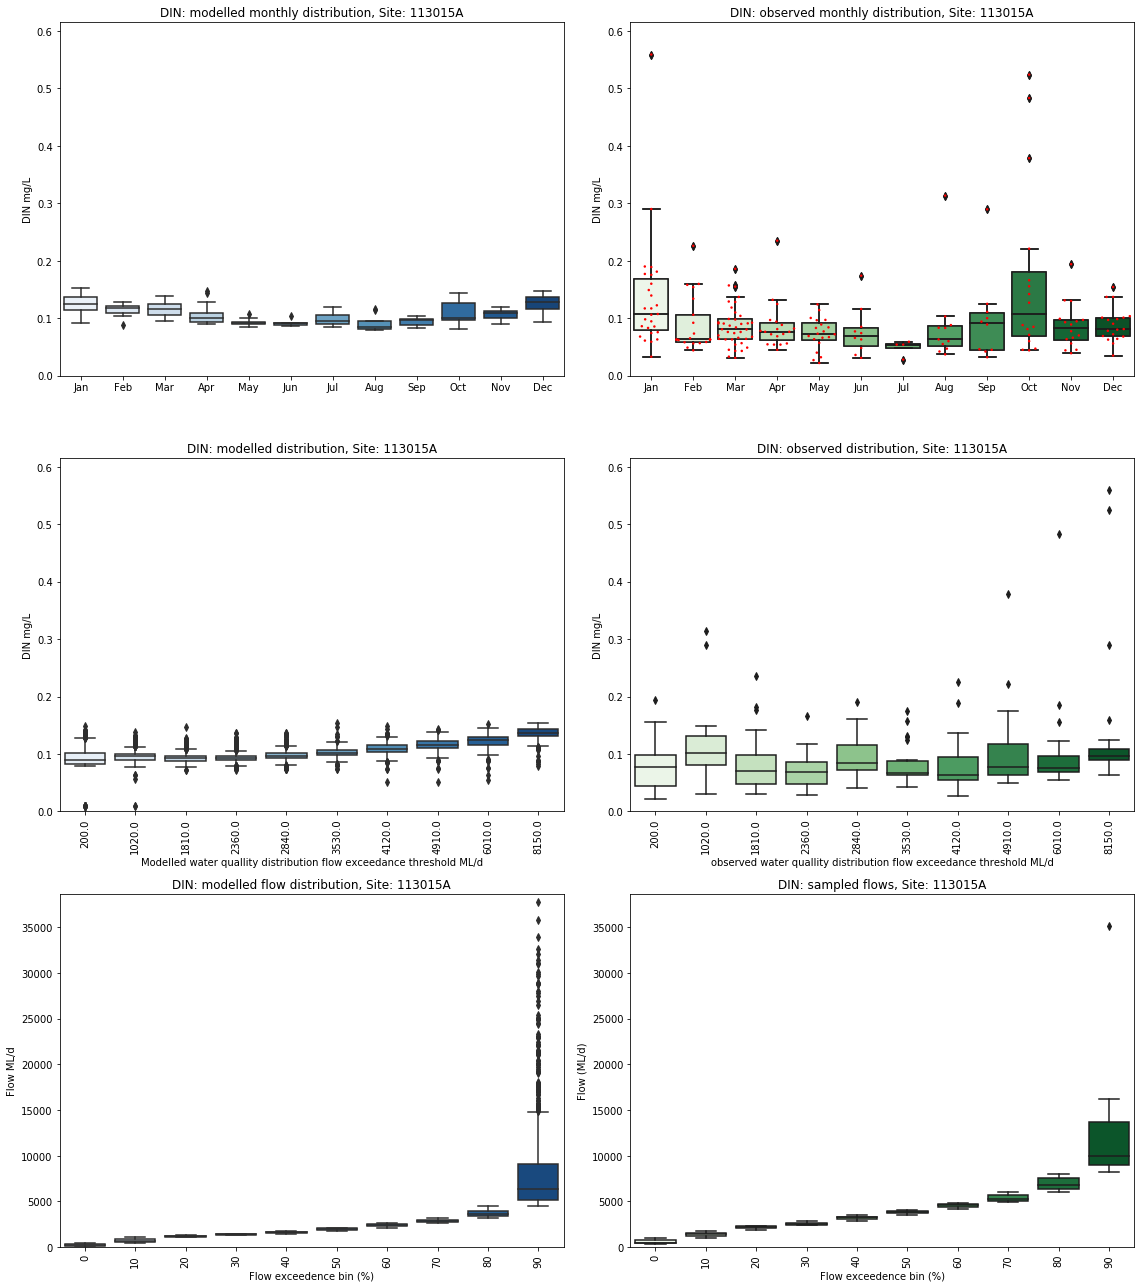

In [54]:
# this runs the numbers and charts for DIN
wqdatacorrelation(WQ_Conc,SourceWQ,dfsitelist,dfparameterlist)

In [55]:
#############need to make this a program for DIN and another for pesticides############
# we multiply the modelled data by 1000 to get it in the same units as the observed data

def ug_wqdatacorrelation(dfobs,dfmod,dfsitelist,dfparameter):
    
    #dfobs is the dataframe containing the observation time series (WQ_Conc)
    #dfmod is the dataframe ocntaining the modelled time series. This needs to be the concentration time series. 
    #dfsitelist is the dataframe containing the list of sites to compare
    #parameter is the parameter we want to compare. DIN, Atrazine or Diuron
    
    
    site_list = dfsitelist["location"].tolist()
    parameter_list = dfparameter["parameter"].tolist()

    for s in (site_list):

        #retrieve the data series from the modelled and observed dataframes
        mdf = pd.DataFrame(dfmod.filter(like=s))
        odf = dfobs.loc[(dfobs['Station'] == s)]
        
        # now we want to grab the flow data that corresponds to the WQ data. 
        # this data is already in the notebook as Obs_gauges and Mod_gauges
        obsflow = pd.DataFrame(Obs_gauges.filter(like=s))
        modflow = pd.DataFrame(Mod_gauges.filter(like=s))
        
        # infill the obsflow database with modelled flows so that at least some analysis can be undertaken if data is missing
        obsflow.loc[obsflow[s+' Discharge (ML/day)'].isnull(),s+' Discharge (ML/day)'] = modflow[s+' Modelled ML/d']
        #print(obsflow)
        
        #Now step through the parameter list and start the program
        
        for p in (parameter_list):
                
            #retrieve the parameter specific data from the modelled and observed dataframes
            mdfp = pd.DataFrame(mdf.filter(like=p))*1000
            odfp = pd.DataFrame(odf.filter(like=p))
            mdfp.columns = ['modelled']
            #The data will be full of < symbols, so lets remove the data where we might get them and not include it
            #print(odfp.dtypes)
            odfp = odfp.convert_objects(convert_numeric=True)
            
            odfp['mean'] = odfp.mean(axis=1,numeric_only=True)
            odfp1 = odfp['mean']
            odfp2 = odfp1.dropna()
                        
            #now we want to resample the observed concentration data to daily by taking the mean daily value
            # yes, this technically should be the flow weighted mean daily value, but this is difficult for now. 

            # convert the observed sample database to daily
            odfpd1 = odfp2.resample('D').mean()
            odfpd = odfpd1.dropna()
            
            # uncomment the line below if you want outout summary of the data to this point
            odfpd.to_csv('C:/Tully/WQ_Data/WQdata'+p+s+'.csv')
            
            #How Many samples do we have to work with
            count = odfp2.count()
            countd = odfpd.count()
            medianobs = odfpd.median()
            
            #print(odfpd)
            
            # Merge the flow and the WQ data. if you get an error here, it may be becuase the 
            # flow data is missing
            mergedobs = pd.concat([obsflow, odfpd], axis=1, join='inner')
            mergedobs.columns = ['obsflowML','qualcode','obswq']
            # we need to drop the na values here so that only sampling days are included in the dataframe
            #mergedobs = mergedobs.dropna(axis=0, how='any')
            #print(mergedobs)
            
            # we do the same here for the modelled data, only there should not be any gaps
            mergedmod = pd.concat([modflow, mdfp], axis=1, join='inner')
            mergedmod.columns = ['modflowML','modwq']
            
            # we can calculate the median observed flow corresponding to collected samples
            medianobsflow = mergedobs['obsflowML'].median()
            
            #print(mergedobs) # uncomment to check the output
            
            ####################################################################################
            # up to this point, we should have the wq data mwith associated flows in some dataframes
            # the next section starts some data analysis
            ####################################################################################
            
            # this bit of code grabs the 10th percentile flows from the observed and modeled time series
            # we want to use the observed flow percentiles (quantiles) to group the modelled data 
            # This will allow us to compare like for like when looking and measured and modelled concentration 
            # distributions. Just doing it for all modelled data will not account for the sampling bias.
            # if more samples were taken during high flow events, we want to sample the modelled distribution 
            # in the same way to specifically compare how the model performs across different flow magnitudes
            
            obsflowquantiles = mergedobs['obsflowML'].quantile(np.linspace(0, 1, 10, 0))
            modflowquantiles = mergedmod['modflowML'].quantile(np.linspace(0, 1, 10, 0))
            flowquantiles = pd.concat([obsflowquantiles, modflowquantiles], axis=1, join='inner')

            # now get the observed 10th percentile flow bins so we can use them to categorise the modelled flows
            obsflowquantiles = pd.DataFrame(obsflowquantiles)
            obsflowquantiles.columns = ['flowbin']
            print(obsflowquantiles)
            
            
            quantile_list = round(obsflowquantiles["flowbin"],2).tolist() # rounding here helps in the plotting later
            quantile_list.append(mergedobs['obsflowML'].max())
            #quantile_list.append(mergedobs['obsflowML'].min())
            percentile_list = ["0","10","20","30","40","50","60","70","80","90","100"]
            print(quantile_list)
            
            # We also want the 10th percentile flow bins for the model time series so that we can plot the flow distribution
            modflowquantiles = pd.DataFrame(modflowquantiles)
            modflowquantiles.columns = ['flowbin']
            modquantile_list = round(modflowquantiles["flowbin"],-1).tolist()
            modquantile_list.append(mergedmod['modflowML'].max()+1)
            
            
            # now we categorise modelled and observed flows into the bins from the days samples were taken
            mergemod_bin = pd.cut(mergedmod['modflowML'],quantile_list,labels=["10","20","30","40","50","60","70","80","90","100"])          
            mergeobs_bin = pd.cut(mergedobs['obsflowML'],quantile_list,labels=["10","20","30","40","50","60","70","80","90","100"])
            mergemod_bin_complete = pd.cut(mergedmod['modflowML'],modquantile_list,labels=["10","20","30","40","50","60","70","80","90","100"])
            
            #print(mergemod_bin) # check out what the merged bin categories look like
            #print(flowquantiles) # check out percentile flows
            
            # merge the observed and modelldd dataframes with the percentile bins
            merged_modelled = pd.concat([mergedmod, mergemod_bin], axis=1, join='inner')
            merged_modelled.columns = ['modflow','modwq','bin']
            
            merged_observed = pd.concat([mergedobs, mergeobs_bin], axis=1, join='inner')
            merged_observed.columns = ['obsflowML','qualcode','obswq','bin']
            
            merged_modelled_complete = pd.concat([mergedmod, mergemod_bin_complete], axis=1, join='inner')
            merged_modelled_complete.columns = ['modflow','modwq','bin']
            
            #print(merged_observed)
            #print(merged_modelled)
            #print(merged_modelled_complete)
            
            #remove na values so we can count the number of obs by group (month or flow band). This has been done already, 
            # but we do it again to check, and in any case, we get a new dataframe to work on so we dont stuff up the other one
            merged_obs_na = merged_observed.dropna(axis=0, how='any')
            
            #print(merged_obs_na)
            merged_obs_na.to_csv("C:/Tully/WQ_Data/WQDatapoints"+p+s+".csv", index=True)
            ##########################################################################################
            # this little section just metches modelled wq to obs to make it easy to do a scatter plot later           
            # merge the WQ data to match sample days with model generated values 
            mergedf = pd.concat([mdfp, odfpd], axis=1, join='inner')
            mergedf.columns = ['modelled','observed']
            #remove na values from the observed data, just in case
            mergedf = mergedf.dropna(axis=0, how='any')
            ########################################################################################
            
            ##########################################################################################
            # In this section, we want to do some calcs to put some number of obs categories on the plots
            # Calculate number of obs per group & median to position labels
            # we need to do this a number of times for the different groups - months and flow bands
            # from : https://python-graph-gallery.com/38-show-number-of-observation-on-boxplot/
            mediansmonths = merged_obs_na.groupby(merged_obs_na.index.month)['obswq'].median().values
            nobmonths = merged_obs_na.index.month.value_counts().values
            nobmonths_str = [str(x) for x in nobmonths.tolist()]
            nobmonths_str = ["n= " + i for i in nobmonths_str]
            
            mediansflows = merged_obs_na.groupby(merged_obs_na['bin'])['obswq'].median().values
            nobflows = merged_obs_na['bin'].value_counts().values
            nobflows_str = [str(x) for x in nobflows.tolist()]
            nobflows_str = ["n= " + i for i in nobflows_str]
            
            #print(nobflows)
            #print(nobmonths_str)
            #print(nobflows_str)
                        
            ###########################################################################################
 
            #Add it to the plot
            #pos = range(len(nobs))
            #for tick,label in zip(pos,ax.get_xticklabels()):
            #ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            #horizontalalignment='center', size='x-small', color='w', weight='semibold')
            
            
            #print some data out
            print("gauge = ",s," ,Parameter = ",p)
            print("total number of observations = ", count)
            print("total number of days with observations = ",countd)
            print("total number of observations with corresponding flows used in the analysis = ",nobflows.sum())
            print("median observed concentration = ", round(medianobs,3)," ug/L")
            print("corresponding median observed flow = ", round(medianobsflow,3)," ML/d")
            print()
            #print(mergedf)
            
            # the first plots will be summary plots and include a time series, scatter plot and overall matched distribution
            plt.figure(figsize=(10,8))        
            
            # time series plot of modelled and measured, limited to later years. 
            plt.subplot2grid((2,2),(0,0),colspan=2)
            plt.semilogy(mdfp['modelled'])
            #plt.semilogy(mergedf['observed'],marker='o', color='b')
            plt.scatter(mergedf.index,mergedf['observed'],marker='.', color='r')
            plt.title('Modelled '+p+' concentration ug/L: '+s)
            plt.xlabel('Date')
            plt.ylabel('Concentration (ug/L)')
            plt.legend()
            plt.ylim(0.001,(mergedf['observed'].max()*1.1))
            plt.xlim("2006-06-01", "2014-06-30")
            
            
            plt.subplot2grid((2,2),(1,0))
            plt.scatter(mergedf['modelled'],mergedf['observed'])
            plt.grid(which = 'both')
            #plt.plot([0,wqatconc['measuredatz'].max()],[0,wqatconc['measuredatz'].max()],'r')
            plt.xlabel('Modelled Concentration (ug/L))')
            plt.ylabel('Measured Concentration (ug/L)')
            plt.title(p+' Daily Correlation, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            plt.xlim(0,(mergedf['observed'].max()*1.1))
            
            plt.subplot2grid((2,2),(1,1))
            boxdata=(mergedf['modelled'],mergedf['observed'])
            #plt.boxplot(mergedf['modelled'])
            plt.boxplot(boxdata)
            plt.xticks([1,2],('modelled','measured',))
            plt.ylabel('Concentration ug/L')
            plt.title(p+' Distribution for matching days, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            plt.tight_layout()
            plt.savefig('C:/Tully/WQ_Data/fig'+p+s+'.png', bbox_inches='tight', dpi=300)
            
            # the second set of plots are summary plots of modelled and measured WQ by month and by flow disttribution
            plt.figure(figsize=(16,18))        
            
            plt.subplot2grid((3,2),(0,0))
            seaborn.boxplot(mergedf.index.month, mergedf['modelled'],palette="Blues")
            plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
            plt.ylabel('Concentration ug/L')
            plt.title(p+': modelled monthly distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            plt.subplot2grid((3,2),(0,1))
            seaborn.boxplot(merged_obs_na.index.month, merged_obs_na['obswq'],palette="Greens")
            seaborn.swarmplot(merged_obs_na.index.month, merged_obs_na['obswq'], color="r", marker='.')
            ax2=seaborn.boxplot(merged_obs_na.index.month, merged_obs_na['obswq'],palette="Greens")
            plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
            plt.ylabel('Concentration ug/L')
            plt.title(p+': observed monthly distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            #try to add number of obs labels to the plot
            # I really wanted this to work, but it doesnt at the moment so will drop it for now
            #pos = range(len(nobmonths_str))
            #for tick,label in zip(pos,ax2.get_xticklabels()):
            #    plt.text(pos[tick], 0.01, nobmonths_str[tick],horizontalalignment='center', size='small')
            
            #These two plots attempt to show the sample distribution according to flow band
            plt.subplot2grid((3,2),(1,0))
            seaborn.boxplot(merged_modelled['bin'], merged_modelled['modwq'],palette="Blues")#.set_yscale('log')
            plt.xticks([0,1,2,3,4,5,6,7,8,9],quantile_list,rotation='vertical')
            plt.xlabel('Modelled water quallity distribution flow exceedance threshold ML/d')
            plt.ylabel('Concentration ug/L')
            plt.title(p+': modelled distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            plt.subplot2grid((3,2),(1,1))
            seaborn.boxplot(merged_observed['bin'], merged_observed['obswq'],palette="Greens")
            plt.xticks([0,1,2,3,4,5,6,7,8,9],quantile_list,rotation='vertical')
            plt.xlabel('observed water quallity distribution flow exceedance threshold ML/d')
            plt.ylabel('Concentration ug/L')
            plt.title(p+': observed distribution, Site: ' + s)
            plt.ylim(0,(mergedf['observed'].max()*1.1))
            
            # and the two plots for the modelled flow distribution and the measured flow distribution
            plt.subplot2grid((3,2),(2,0))
            seaborn.boxplot(merged_modelled_complete['bin'], merged_modelled_complete['modflow'],palette="Blues")#.set_yscale('log')
            plt.xticks([0,1,2,3,4,5,6,7,8,9],percentile_list,rotation='vertical')
            plt.xlabel('Flow exceedence bin (%)')
            plt.ylabel('Flow ML/d')
            plt.title(p+': modelled flow distribution, Site: ' + s)
            plt.ylim(0,(merged_observed['obsflowML'].max()*1.1))
            
            plt.subplot2grid((3,2),(2,1))
            seaborn.boxplot(merged_observed['bin'], merged_observed['obsflowML'],palette="Greens")
            #seaborn.swarmplot(merged_observed['bin'], merged_observed['obsflowML'], color="r", marker='.')
            plt.xticks([0,1,2,3,4,5,6,7,8,9],percentile_list,rotation='vertical')
            plt.xlabel('Flow exceedence bin (%)')
            plt.ylabel('Flow (ML/d)')
            plt.title(p+': sampled flows, Site: ' + s)
            plt.ylim(0,(merged_observed['obsflowML'].max()*1.1))
        
            plt.tight_layout()
            plt.savefig('C:/Tully/WQ_Data/boxplot'+p+s+'.png', bbox_inches='tight', dpi=300)
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


      flowbin
0.00   124.40
0.10  1754.73
0.20  5008.87
0.30  8806.16
0.40 12033.99
0.50 13593.10
0.60 16693.44
0.70 23905.47
0.80 33174.42
0.90 39129.75
[124.4, 1754.73, 5008.87, 8806.16, 12033.99, 13593.1, 16693.44, 23905.47, 33174.42, 39129.75, 79435.69815]
gauge =  113006A  ,Parameter =  Diuron
total number of observations =  395
total number of days with observations =  200
total number of observations with corresponding flows used in the analysis =  103
median observed concentration =  0.042  ug/L
corresponding median observed flow =  13593.097  ML/d

      flowbin
0.00  1095.29
0.10  5930.21
0.20  8742.65
0.30 11627.24
0.40 13005.09
0.50 13833.69
0.60 16660.55
0.70 25568.43
0.80 35842.57
0.90 40786.90
[1095.29, 5930.21, 8742.65, 11627.24, 13005.09, 13833.69, 16660.55, 25568.43, 35842.57, 40786.9, 79435.69815]
gauge =  113006A  ,Parameter =  Atrazine
total number of observations =  340
total number of days with observations =  161
total number of observations with corresponding f

ValueError: Bin edges must be unique: array([10083.45, 10083.45, 10083.45, 10083.45, 10083.45, 10083.45,
       10083.45, 10083.45, 10083.45, 10083.45, 10083.45]).
You can drop duplicate edges by setting the 'duplicates' kwarg

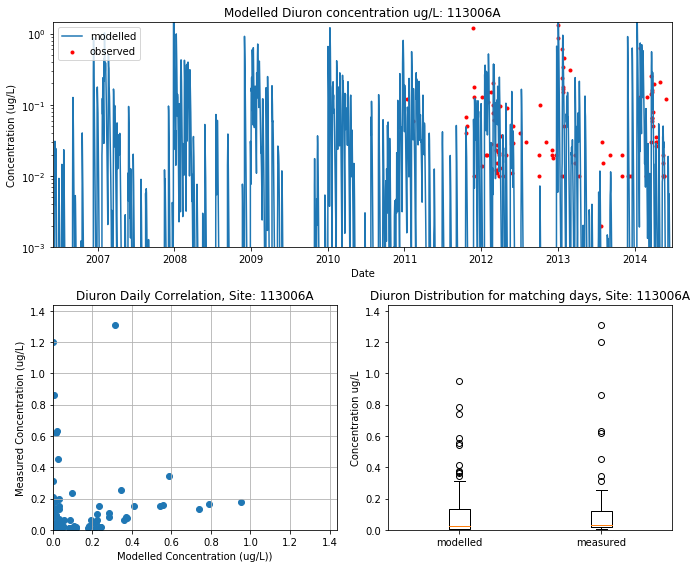

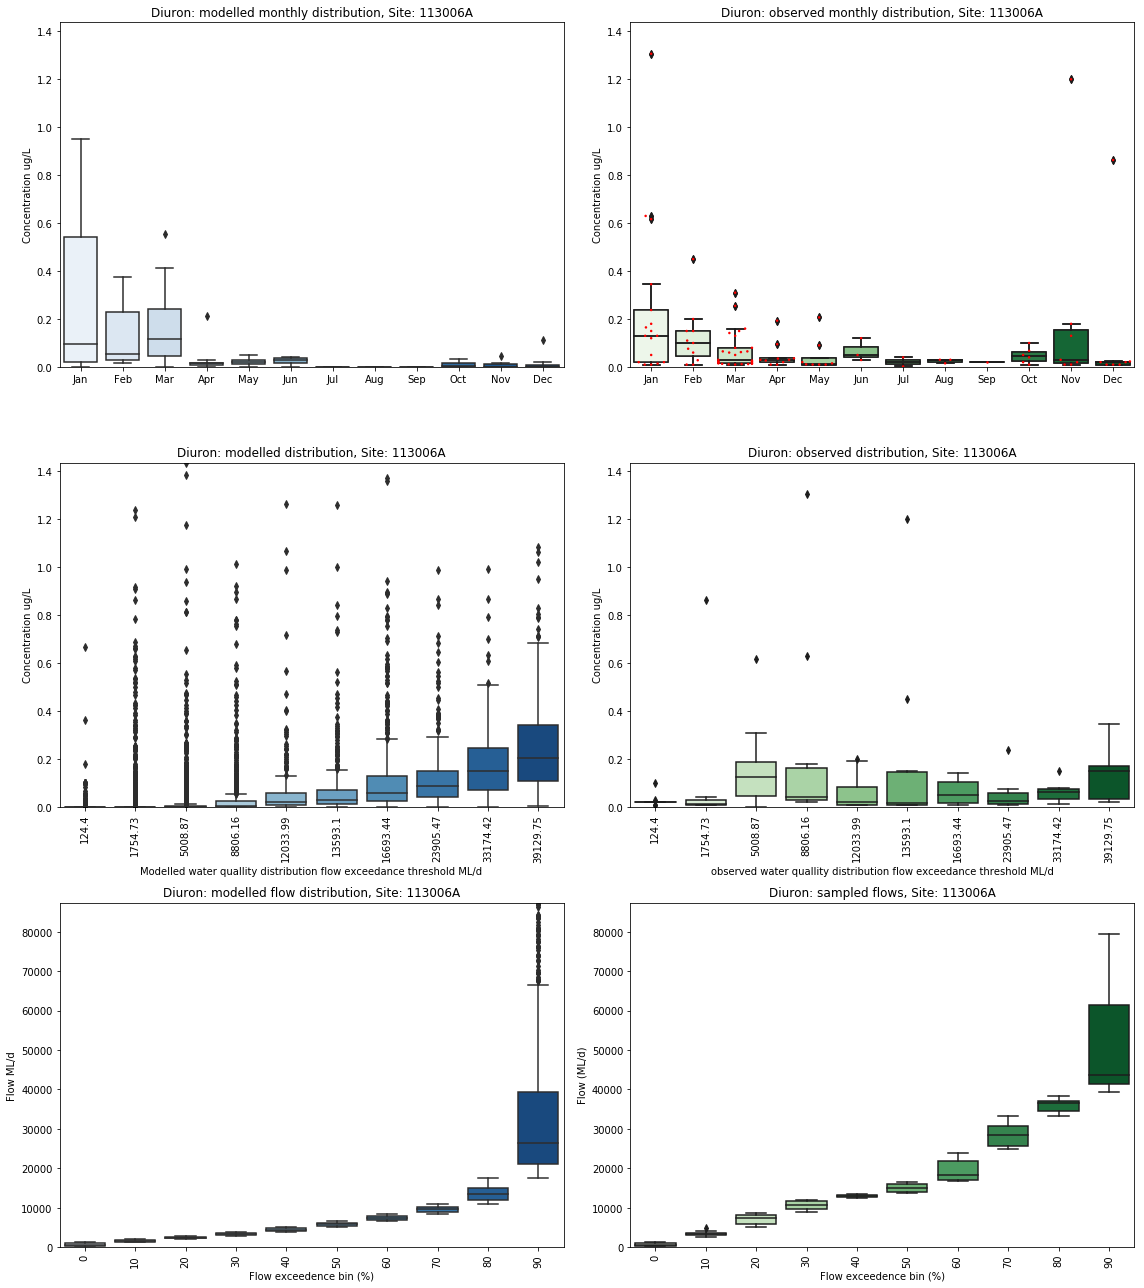

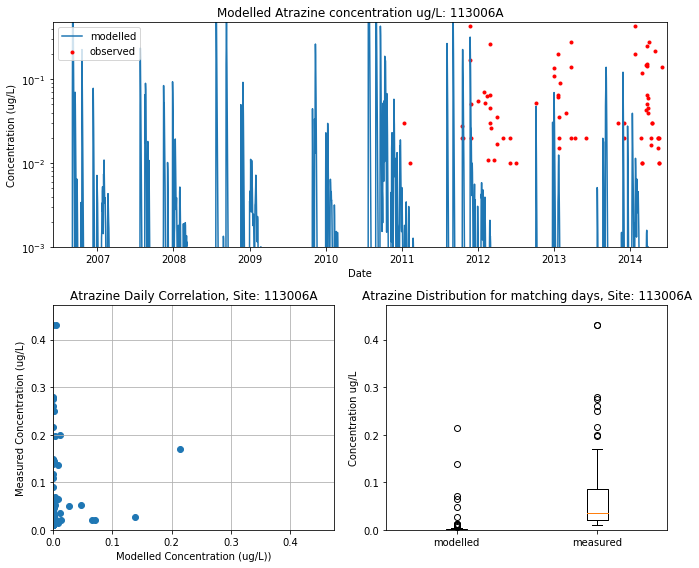

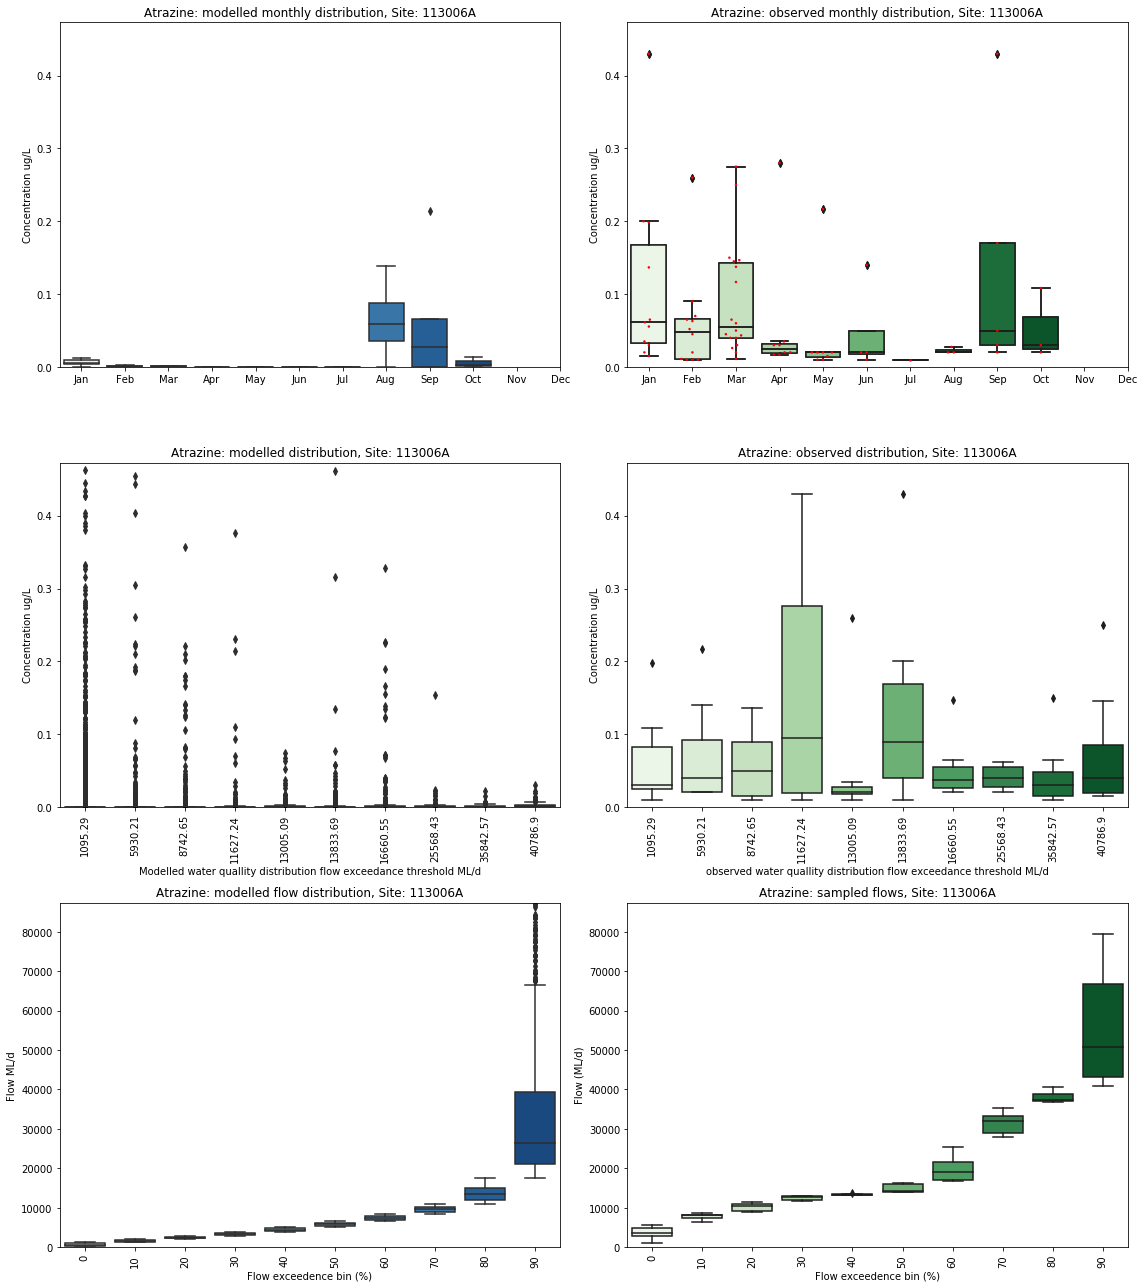

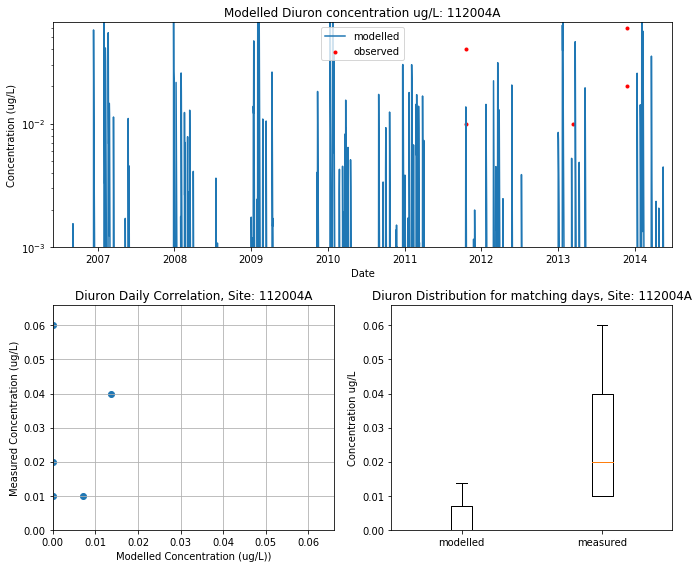

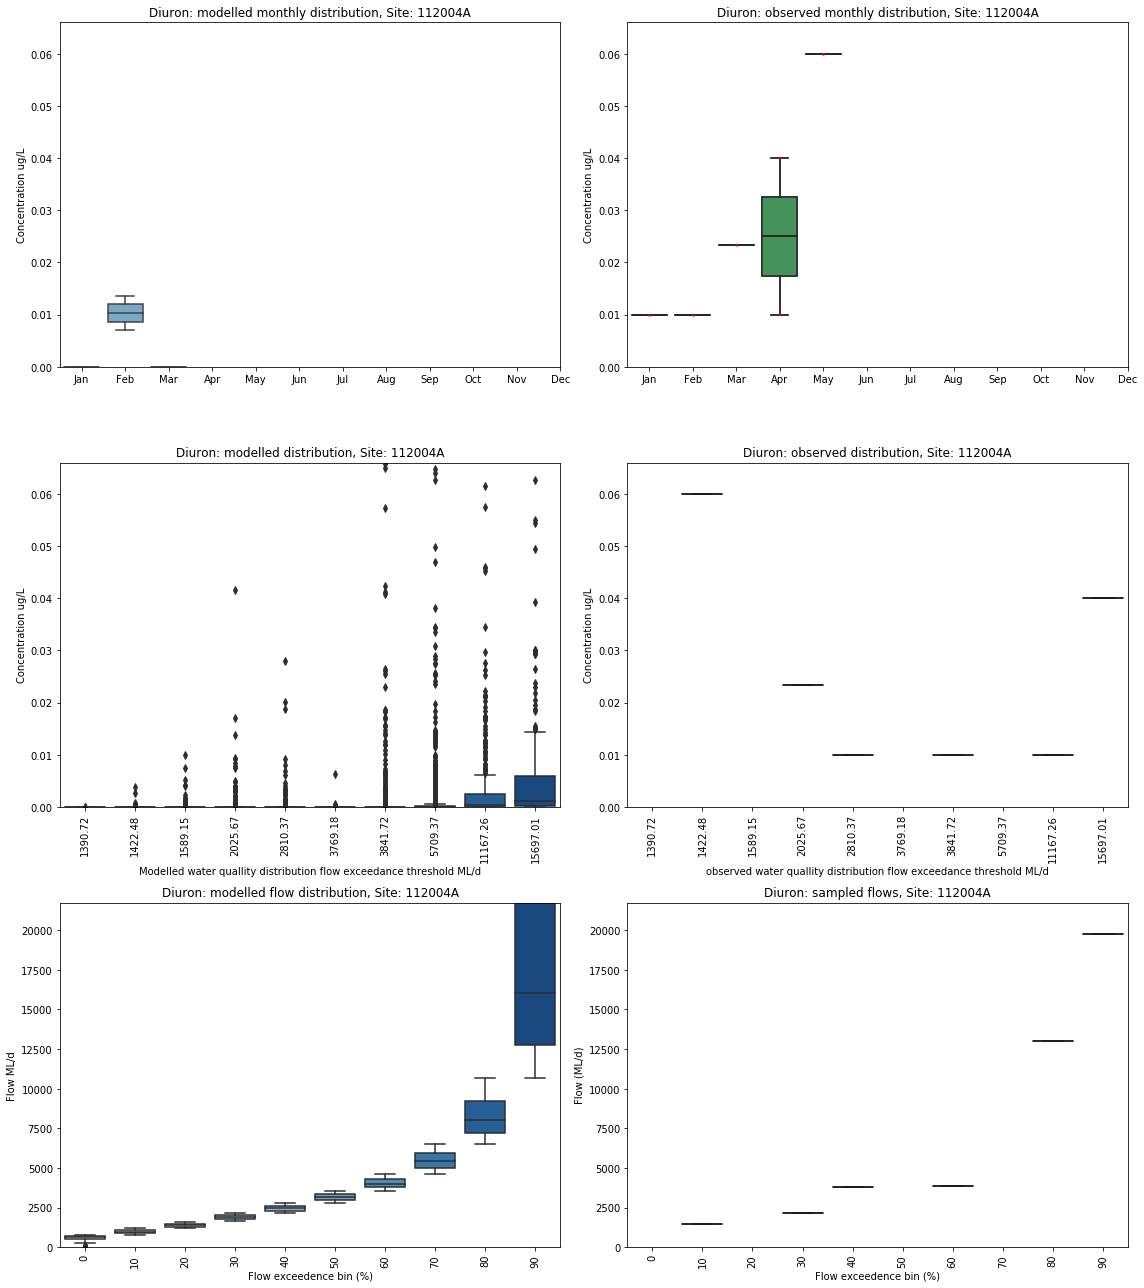

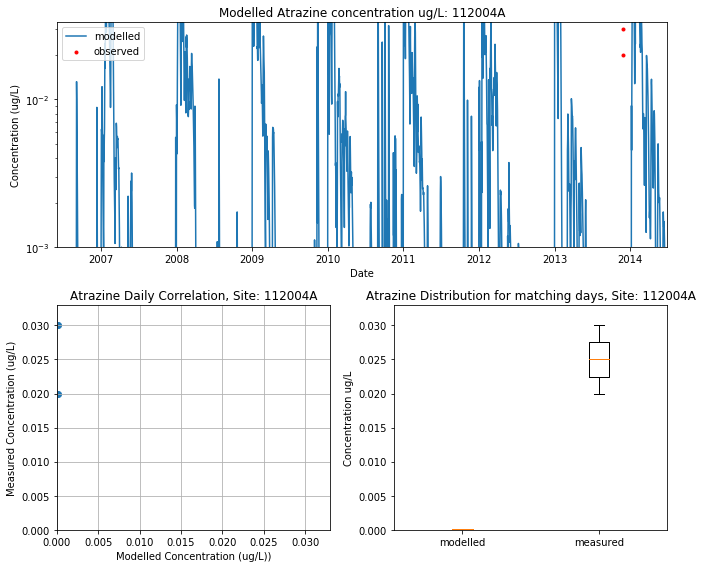

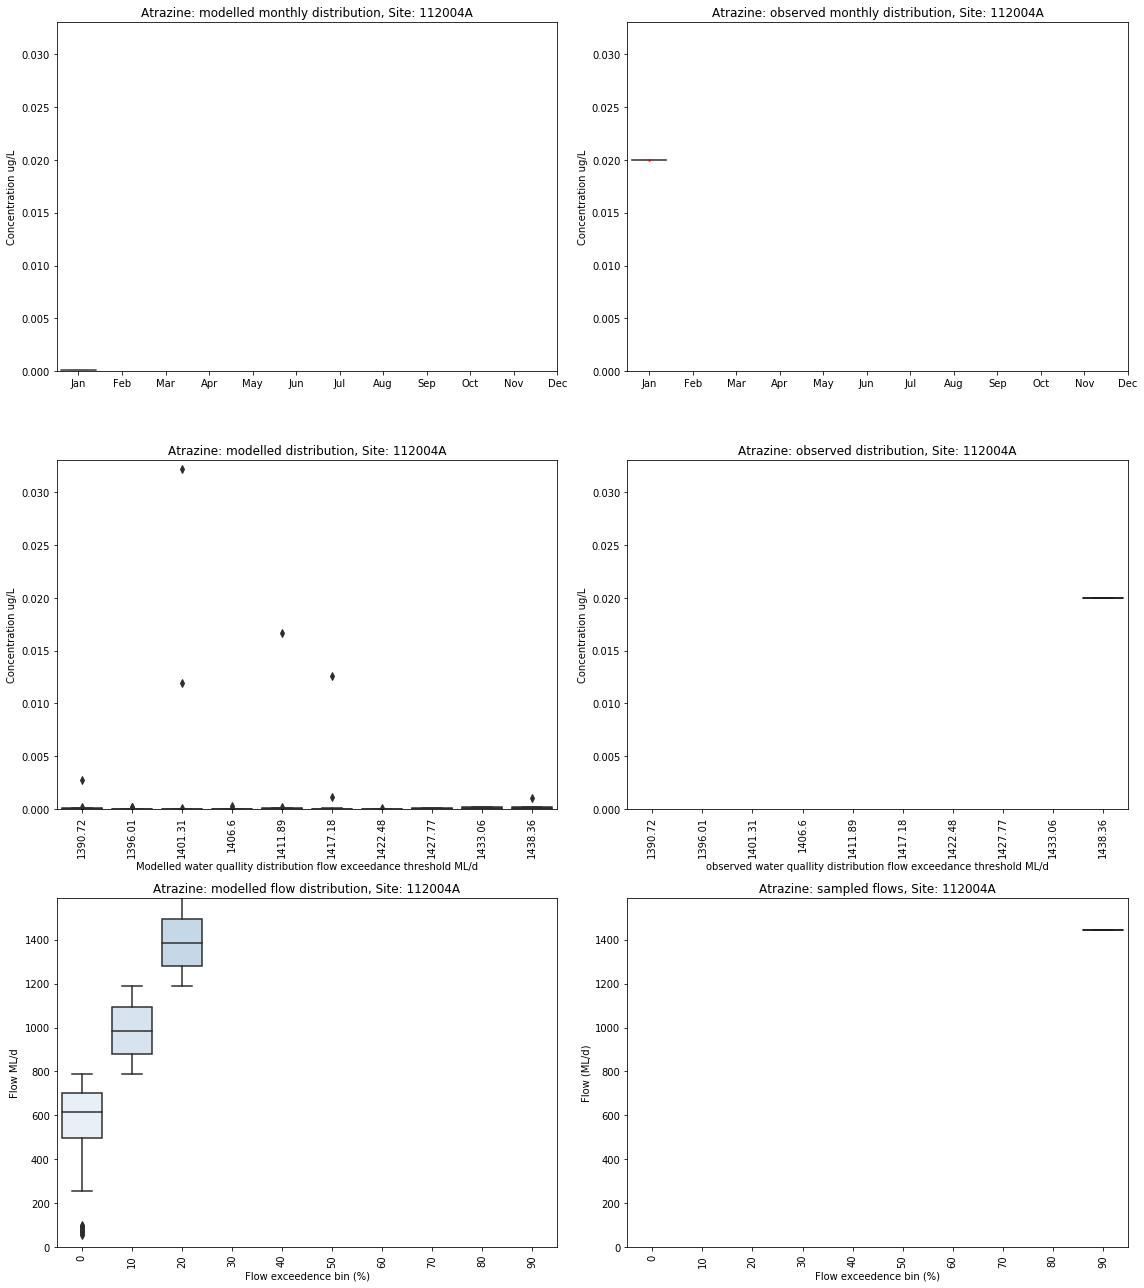

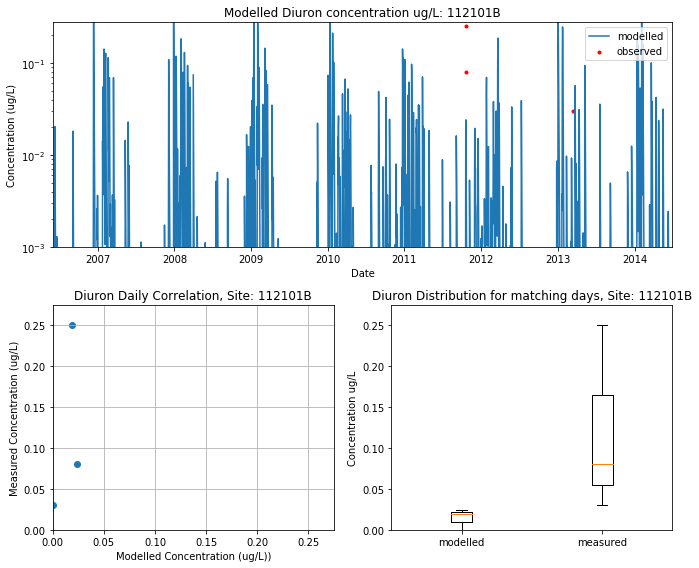

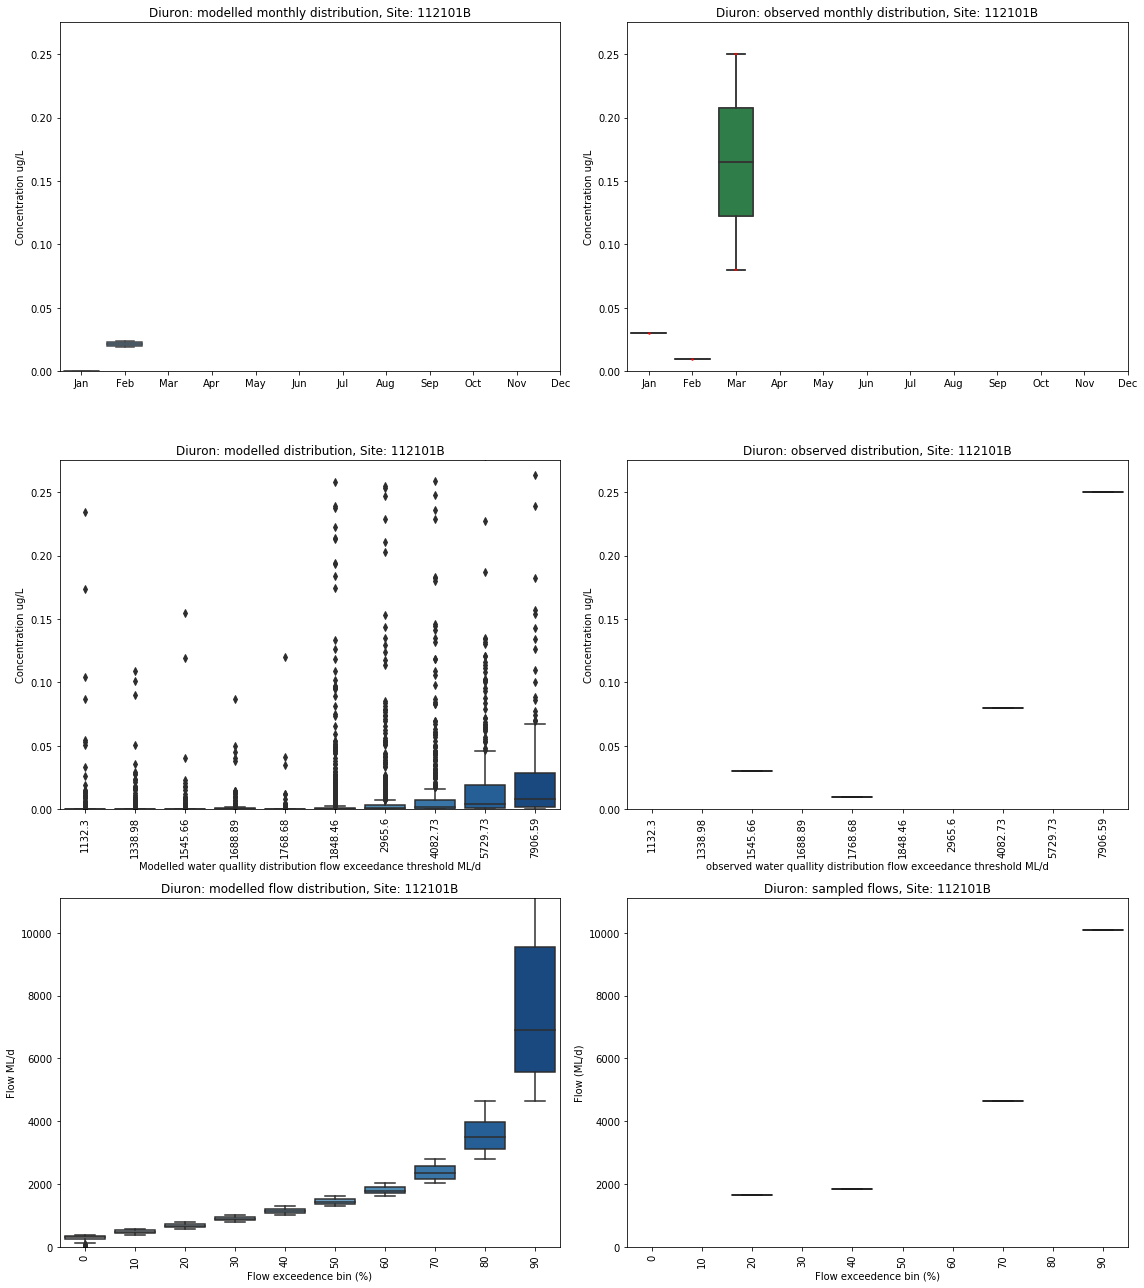

In [56]:
ug_wqdatacorrelation(WQ_Conc,SourceWQ,dfsitelistpesticides,dfparameterlistpesticides)

In [ ]:
# summary

In [60]:
# Sankey diagrams for mass flux representation
# This module attempts to calculate Sankey Diagrams

def Sankey_APSIM(apsimdr,apsimsr,NL,NS,AP,AW,DP,DW,areas):
    
    #ddr = APSIM Drainage Delivery Ratio
    #NS = APSIM DIN surface dataframe
    #NL = APSIM DIN Leached dataframe
    #ATP = APSIM Atrazine particulate dataframe
    #ATW = APSIM Atrazine water phase dataframe
    #DIP = APSIM Diuron particulate dataframe
    #DIW = APSIM Diuron water phase dataframe    
    #grab a subcatchment list
    #Import the Sacramento Sugarcane subcatchments and areas 
    #grab a list of subcatchments
    
    SC_list = areas["Subcatchment"].tolist()
    area_list = areas["Area_ha"].tolist()
    #region_list = areas["Region"].tolist()
    region_list = [1,2,4,6] # extend this list of there are more than 10 regions
    
    
    for r in (region_list):
                
        rareas = areas.loc[areas['Region'] == r]
            
        SC_listr = rareas["Subcatchment"].tolist()
        area_listr = rareas["Area_ha"].tolist()
        region_area = rareas["Area_ha"].sum()
        ddr = rareas["ddr"].mean()
        DIN_sdr = rareas["DIN_sdr"].mean()
        DIN_ddr = rareas["DIN_ddr"].mean()
        ATZ_sdr = rareas["ATZ_sdr"].mean()
        ATZ_ddr = rareas["ATZ_ddr"].mean()
        DIU_sdr = rareas["DIU_sdr"].mean()
        DIU_ddr = rareas["DIU_ddr"].mean()
         
        ds = []
        db = []
        dfad = []
        dfas = []
        dfar = []
        dfNS = []
        dfNL = []
        dfAP = []
        dfAW = []
        dfDP = []
        dfDW = []
    
        for s, a in zip(SC_listr,area_listr):
            
            ##calculate the total runoff volume
            #dfb = [dfbaseflow.filter(regex=s)*a]
            #dft = [dftotal.filter(regex=s)*a]
            ##df  = pd.concat([dfbaseflow.filter(regex=s)*a,dftotal.filter(regex=s)*a], axis = 1)
            #df  = pd.concat([dftotal.filter(regex=s)*a], axis = 1)
            #ds.append(df.sum(axis=1))
            
            ##calculate the total baseflow volume
            #dfb  = pd.concat([dfbaseflow.filter(regex=s)*a], axis = 1)
            #db.append(dfb.sum(axis=1))
                               
            #calculate the total APSIM drainage runoff
            dfapsd = [apsimdr.filter(regex=s)*a]
            dfads  = pd.concat([apsimdr.filter(regex=s)*a], axis = 1)
            dfad.append(dfads)
                    
            #Calculate the total APSIM runoff
            dfapsr = [apsimsr.filter(regex=s)*a]
            dfars  = pd.concat([apsimsr.filter(regex=s)*a], axis = 1)
            dfar.append(dfars)
            
            #calculate the total APSIM DIN surface runoff
            dfNSr = [NS.filter(regex=s)*a]
            NSs  = pd.concat([NS.filter(regex=s)*a], axis = 1)
            dfNS.append(NSs)
                    
            #Calculate the total APSIM Din Leached Drainage
            dfNLr = [NL.filter(regex=s)*a]
            NLs  = pd.concat([NL.filter(regex=s)*a], axis = 1)
            dfNL.append(NLs)
            
            #calculate the total APSIM ATZ sediment phase
            dfAPr = [AP.filter(regex=s)*a]
            APs  = pd.concat([AP.filter(regex=s)*a], axis = 1)
            dfAP.append(APs)
                    
            #Calculate the total APSIM ATS water phase
            dfAWr = [AW.filter(regex=s)*a]
            AWs  = pd.concat([AW.filter(regex=s)*a], axis = 1)
            dfAW.append(AWs)            
            
            #calculate the total APSIM DIU sediment phase
            dfDPr = [DP.filter(regex=s)*a]
            DPs  = pd.concat([DP.filter(regex=s)*a], axis = 1)
            dfDP.append(DPs)
                    
            #Calculate the total APSIM DIU water phase
            dfDWr = [DW.filter(regex=s)*a]
            DWs  = pd.concat([DW.filter(regex=s)*a], axis = 1)
            dfDW.append(DWs) 
            
            # Concatenate all data into individual dataframes on the date axis
            apsim_drainage = pd.concat(dfad, axis=1)
            apsim_runoff = pd.concat(dfar, axis=1)
            apsim_NL = pd.concat(dfNL, axis=1)
            apsim_NS = pd.concat(dfNS, axis=1)
            apsim_AP = pd.concat(dfAP, axis=1)
            apsim_AW = pd.concat(dfAW, axis=1)
            apsim_DP = pd.concat(dfDP, axis=1)
            apsim_DW = pd.concat(dfDW, axis=1)         
            
            #modelled_runoff = pd.concat(ds, axis=1)
            #modelled_baseflow = pd.concat(db, axis=1)
            
        #mr = (pd.DataFrame(modelled_runoff)).sum()
        #mrsum = mr.sum()
        #mb = (pd.DataFrame(modelled_baseflow)).sum()
        #mbsum = mb.sum()
        ad = (pd.DataFrame(apsim_drainage)).sum()
        adsum = ad.sum()
        ar = (pd.DataFrame(apsim_runoff)).sum()
        arsum = ar.sum() 
        #apsimdrain = (mrsum-arsum)/adsum
        apsimtot = adsum+arsum
        adproportion = round(adsum/(apsimtot),2)
        arproportion = round(arsum/(apsimtot),2)
        
        nl = (pd.DataFrame(apsim_NL)).sum()
        nlsum = nl.sum()
        ns = (pd.DataFrame(apsim_NS)).sum()
        nssum = ns.sum() 
        apsimntot = nssum+nlsum
        nlp = round(nlsum/(apsimntot),2)
        nsp = round(nssum/(apsimntot),2)
        
        ap = (pd.DataFrame(apsim_AP)).sum()
        apsum = ap.sum()
        aw = (pd.DataFrame(apsim_AW)).sum()
        awsum = aw.sum() 
        apsimatot = apsum+awsum
        app = round(apsum/(apsimatot),4)
        awp = round(awsum/(apsimatot),4)
        
        dp = (pd.DataFrame(apsim_DP)).sum()
        dpsum = dp.sum()
        dw = (pd.DataFrame(apsim_DW)).sum()
        dwsum = dw.sum() 
        apsimdtot = dpsum+dwsum
        dpp = round(dpsum/(apsimdtot),4)
        dwp = round(dwsum/(apsimdtot),4)
        
        region = str(r)
        sugararea = str(round(rareas["Area_ha"].sum(),0))
        #print(adproportion)
        
        #print(areas.loc[areas['Region']==r])
        print("Region = " ,rareas["Region"].mean())
        print("Region Sugarcane Area (ha) = ",round(rareas["Area_ha"].sum(),0))
        #print("Total modelled surface runoff = ", round(mrsum-mbsum,0))
        #print("Total modelled baseflow = ", round(mbsum,0))
        #print("Modelled baseflow proportion = ", round(mbsum/mrsum,2))
        print("APSIM surface runoff = ", round(arsum,0))
        print("APSIM drainage = ", round(adsum,0))
        print("APSIM baseflow proportion = ", round(adsum/(adsum+arsum),2))
        print() 
        print("APSIM DIN Surface Load = ", round(nssum,0))
        print("APSIM DIN Leached Load = ", round(nlsum,0))
        print("APSIM Leached proportion = ", round(nlsum/(apsimntot),2))
        print()
        
        print("APSIM Atrazine sediment phase load = ", round(apsum,0))
        print("APSIM Atrazine water phase load = ", round(awsum,0))
        print("APSIM water phase proportion = ", round(awsum/(apsimatot),2))
        print()
        
        print("APSIM Diuron sediment phase load = ", round(dpsum,0))
        print("APSIM Diuron water phase load = ", round(dwsum,0))
        print("APSIM Diuron phase proportion = ", round(dwsum/(apsimdtot),2))
        print()
        
        # now output suggested parameters for the plugin
        #print("Percentage APSIM drainage to apply = ", round(((mrsum-arsum)/adsum),3))
        #print("Suggested surface store emptying ratio = ", round(rareas["UH1"].mean(),4)," - UH1 from the Sacramento parameters")
        #print("Suggested baseflow store emptying ratio = ", round(rareas["Lzpk"].mean(),4)," to ",round(rareas["Lzsk"].mean(),4))
        print()      
        
        #Now Make some Sankey Diagrams
        #plt.figure(figsize=(6,3))
        #Sankey(flows=[1-adproportion, adproportion, -ddr*adproportion, -(1-(ddr*adproportion))],
            #labels=['APSIM Runoff', 'APSIM Drainage', 'Drainage Removed', 'Water delivered to Source'],
            #orientations=[0, 0, -1, 0],head_angle=90, pathlengths=[1, 0.25, 0.25, 0.5]).finish()
        #plt.title("APSIM Water Balance for Barratta Creek")
        #plt.show()
        
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
        title="APSIM water balance for Tully: Region "+region+", Sugarcane area = "+sugararea)
        sankey = Sankey(ax=ax, scale=1, offset=0.2, head_angle=90,format='%.2f')
        sankey.add(flows=[1-adproportion, adproportion, -(1-ddr)*adproportion, -(1-((1-ddr)*adproportion))],
           labels=['Runoff', 'Drainage', 'Drainage removed', 'To stream'],
           orientations=[0, 0, -1, 0],
           pathlengths=[0.75, 0.25, 0.25, 0.25],
           patchlabel="APSIM Plugin\nwater balance")  
        diagrams = sankey.finish()
        #diagrams[0].texts[-1].set_color('r')
        diagrams[0].text.set_fontweight('bold')
        plt.show()

        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
        title="APSIM Din balance for Pioneer: Region "+region+", Sugarcane area = "+sugararea)
        sankey = Sankey(ax=ax, scale=1, offset=0.2, head_angle=90,format='%.2f')
        sankey.add(flows=[nsp, nlp, -(1-ddr)*nlp, -(1-((1-ddr)*nlp))],
           labels=['Runoff', 'Drainage', 'Drainage removed', ''],
           orientations=[0, 0, -1, 0],
           pathlengths=[0.75, 0.25, 0.25, 0.25],
           patchlabel="APSIM Plugin\nDIN balance")

        
        diagrams = sankey.finish()
        #diagrams[0].texts[-1].set_color('r')
        diagrams[0].text.set_fontweight('bold')
        plt.show()
        
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
        title="APSIM Din balance for Tully: Region "+region+", Sugarcane area = "+sugararea)
        sankey = Sankey(ax=ax, scale=1, offset=0.2, head_angle=90,format='%.2f')
        sankey.add(flows=[(1-((1-ddr)*nlp)),-(ddr)*nlp*(1-DIN_ddr),-nsp*(1-DIN_sdr),-((1-((1-ddr)*nlp))-(ddr)*nlp*(1-DIN_ddr)-nsp*(1-DIN_sdr))],
           labels=['Delivered to model','Drainage removed', 'Surface removed', 'To stream'],
           orientations=[0,-1, 1, 0],
           pathlengths=[0.25,0.25, 0.25, 0.25],
           patchlabel="APSIM Plugin\nDIN balance")
        diagrams = sankey.finish()
        #diagrams[0].texts[-1].set_color('r')
        diagrams[0].text.set_fontweight('bold')
        plt.show()

        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
        title="APSIM Din balance for Tully: Region "+region+", Sugarcane area = "+sugararea)
        sankey = Sankey(ax=ax, scale=1, offset=0.2, head_angle=90,format='%.2f')
        sankey.add(flows=[nsp, nlp, -(1-ddr)*nlp, -(1-((1-ddr)*nlp))],
           labels=['Runoff', 'Drainage', 'Drainage removed', ''],
           orientations=[0, 0, -1, 0],
           pathlengths=[0.75, 0.25, 0.25, 0.25],
           #patchlabel="APSIM Plugin\nDIN balance")
                  )
        sankey.add(flows=[(1-((1-ddr)*nlp)),-(ddr)*nlp*(1-DIN_ddr),-nsp*(1-DIN_sdr),-((1-((1-ddr)*nlp))-(ddr)*nlp*(1-DIN_ddr)-nsp*(1-DIN_sdr))],
           labels=['Delivered to model','Drainage DIN removed', 'SurfaceDIN removed', 'DIN to stream'],
           orientations=[0,-1, 1, 0],
           pathlengths=[0.25,0.25, 0.25, 0.25],prior=0, connect=(3, 0),
           #patchlabel="APSIM Plugin\nDIN balance")
                  )
        diagrams = sankey.finish()
        #diagrams[0].texts[-1].set_color('r')
        diagrams[0].text.set_fontweight('bold')
        plt.show()
        
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
        title="APSIM Atrazine balance for Tully: Region "+region+", Sugarcane area = "+sugararea)
        sankey = Sankey(ax=ax, scale=1, offset=0.2, head_angle=90,format='%.2f')
        sankey.add(flows=[app, awp, -(1-ATZ_ddr)*app, -((1-ATZ_ddr)*awp),-(app+awp-(1-ATZ_ddr)*app-((1-ATZ_ddr)*awp))],
           labels=['Sediment Phase', 'Water Phase', 'sediment phase removed', 'water phase removed','delivered to stream'],
           orientations=[0, 0, 1,-1, 0],
           pathlengths=[0.5, 0.25,0.1,0.1, 0.25],
           #patchlabel="APSIM Plugin\nDIN balance")
                  )
        diagrams = sankey.finish()
        #diagrams[0].texts[-1].set_color('r')
        diagrams[0].text.set_fontweight('bold')
        plt.show()
        
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
        title="APSIM Diuron balance for Tully: Region "+region+", Sugarcane area = "+sugararea)
        sankey = Sankey(ax=ax, scale=1, offset=0.2, head_angle=90,format='%.2f')
        sankey.add(flows=[dpp, dwp, -(1-DIU_ddr)*dpp, -((1-DIU_ddr)*dwp),-(dpp+dwp-(1-DIU_ddr)*dpp-((1-DIU_ddr)*dwp))],
           labels=['Sediment Phase', 'Water Phase', 'sediment phase removed', 'water phase removed','delivered to stream'],
           orientations=[0, 0, 1,-1, 0],
           pathlengths=[0.5, 0.25,0.1,0.1, 0.25],
           #patchlabel="APSIM Plugin\nDIN balance")
                  )
        diagrams = sankey.finish()
        #diagrams[0].texts[-1].set_color('r')
        diagrams[0].text.set_fontweight('bold')
        plt.show()
        

Region =  1.0
Region Sugarcane Area (ha) =  19053.0
APSIM surface runoff =  502650171.0
APSIM drainage =  839798983.0
APSIM baseflow proportion =  0.63

APSIM DIN Surface Load =  1135941.0
APSIM DIN Leached Load =  15315548.0
APSIM Leached proportion =  0.93

APSIM Atrazine sediment phase load =  9840.0
APSIM Atrazine water phase load =  1356249.0
APSIM water phase proportion =  0.99

APSIM Diuron sediment phase load =  9840.0
APSIM Diuron water phase load =  14497314.0
APSIM Diuron phase proportion =  1.0




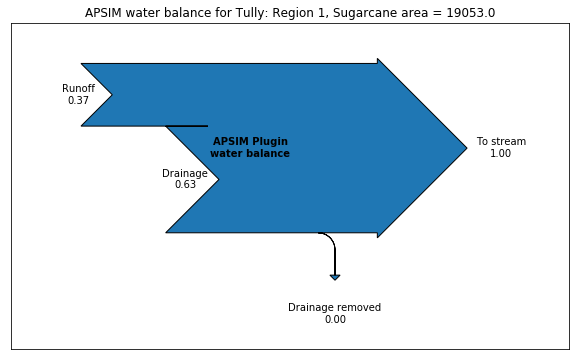

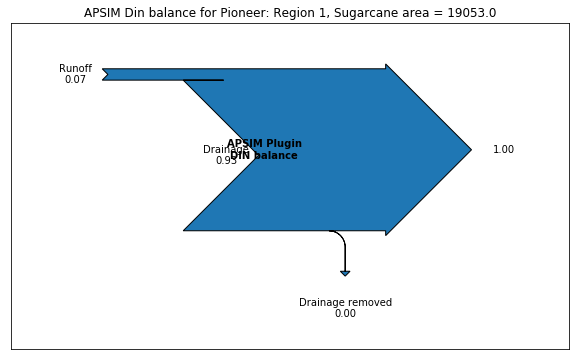

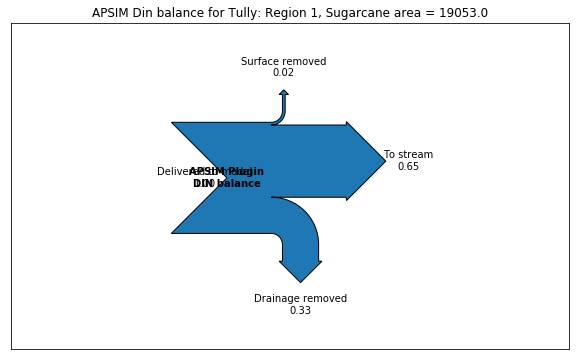

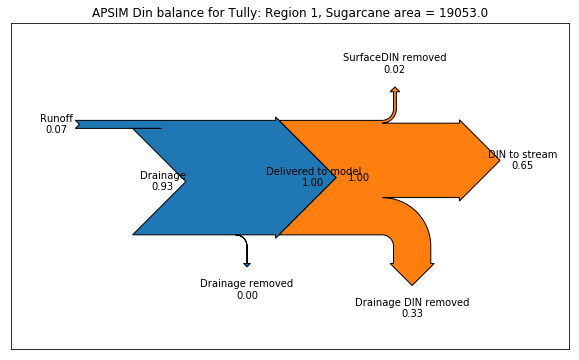

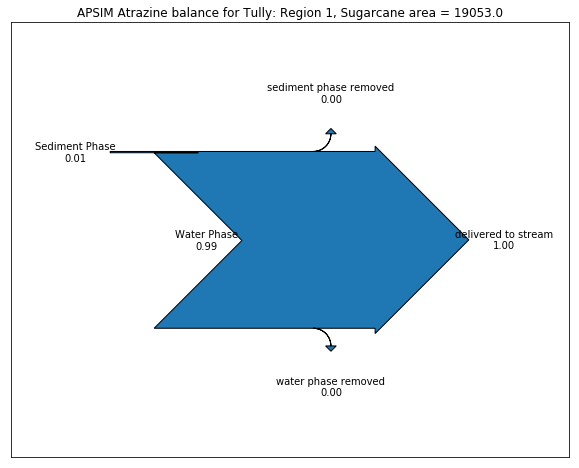

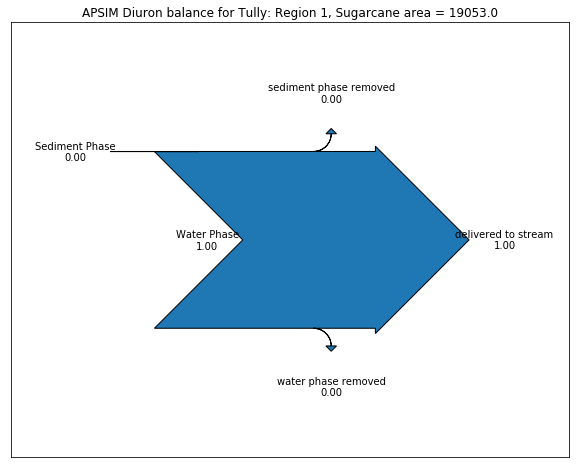

Region =  2.0
Region Sugarcane Area (ha) =  11507.0
APSIM surface runoff =  202011323.0
APSIM drainage =  636751299.0
APSIM baseflow proportion =  0.76

APSIM DIN Surface Load =  433654.0
APSIM DIN Leached Load =  8225615.0
APSIM Leached proportion =  0.95

APSIM Atrazine sediment phase load =  11235.0
APSIM Atrazine water phase load =  573107.0
APSIM water phase proportion =  0.98

APSIM Diuron sediment phase load =  11235.0
APSIM Diuron water phase load =  6214909.0
APSIM Diuron phase proportion =  1.0




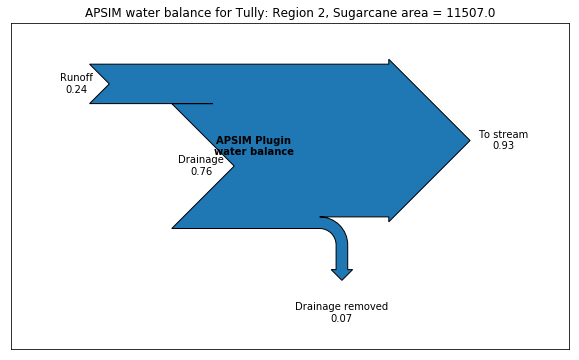

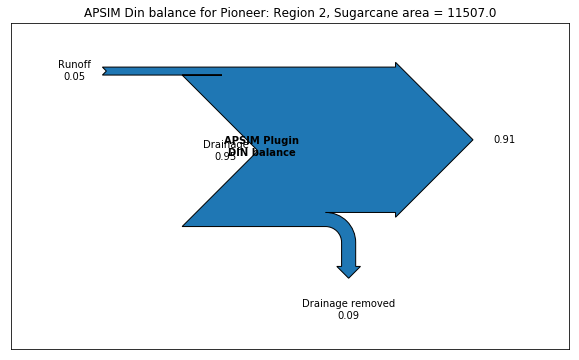

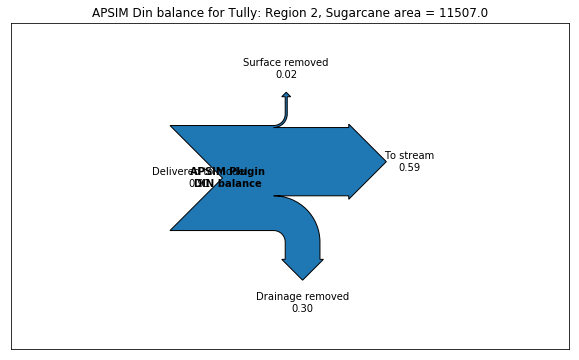

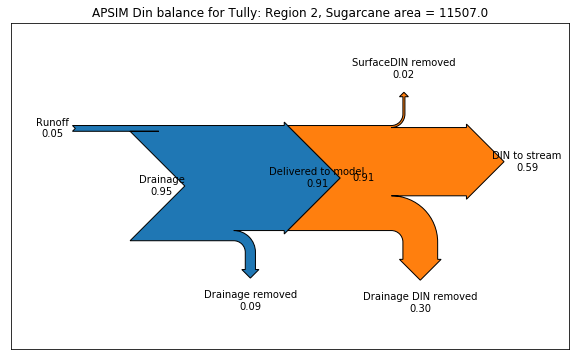

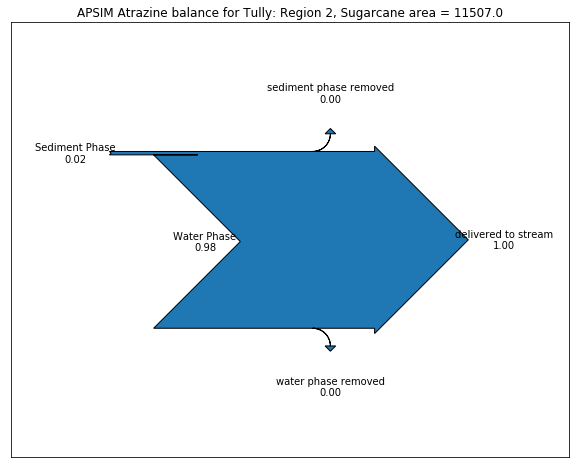

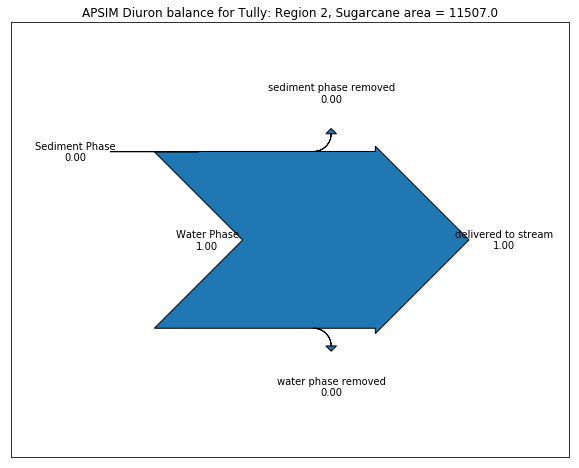

Region =  4.0
Region Sugarcane Area (ha) =  4463.0
APSIM surface runoff =  93738779.0
APSIM drainage =  260965279.0
APSIM baseflow proportion =  0.74

APSIM DIN Surface Load =  198919.0
APSIM DIN Leached Load =  2817151.0
APSIM Leached proportion =  0.93

APSIM Atrazine sediment phase load =  4700.0
APSIM Atrazine water phase load =  344748.0
APSIM water phase proportion =  0.99

APSIM Diuron sediment phase load =  4700.0
APSIM Diuron water phase load =  2858836.0
APSIM Diuron phase proportion =  1.0




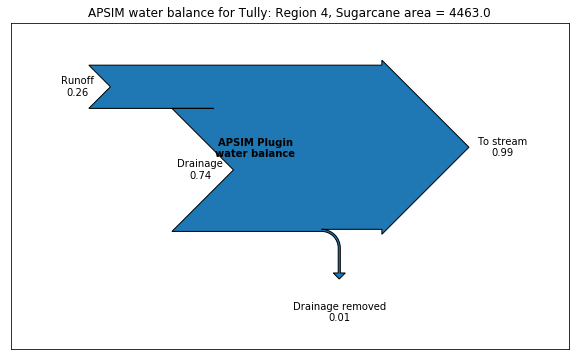

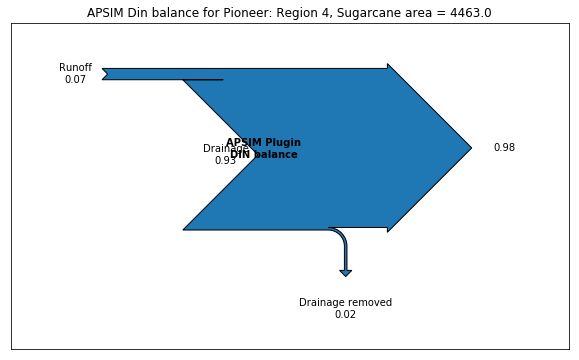

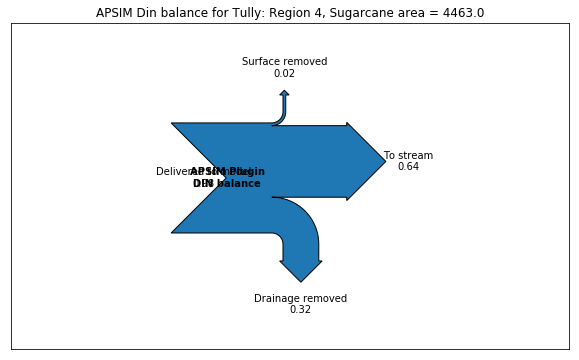

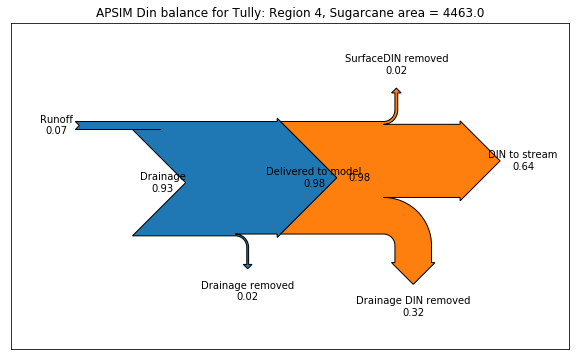

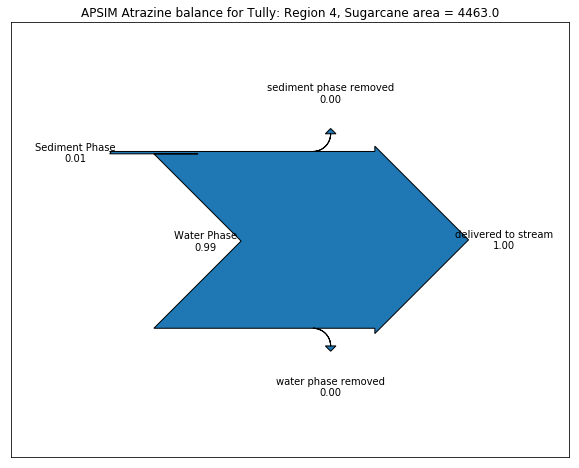

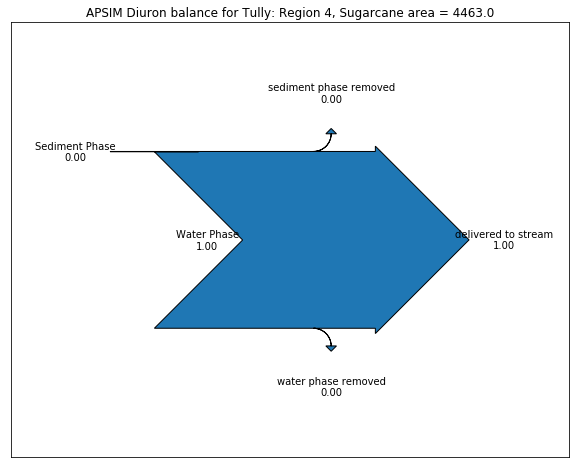

Region =  6.0
Region Sugarcane Area (ha) =  11979.0
APSIM surface runoff =  331356231.0
APSIM drainage =  578046307.0
APSIM baseflow proportion =  0.64

APSIM DIN Surface Load =  784029.0
APSIM DIN Leached Load =  10269952.0
APSIM Leached proportion =  0.93

APSIM Atrazine sediment phase load =  17389.0
APSIM Atrazine water phase load =  1639770.0
APSIM water phase proportion =  0.99

APSIM Diuron sediment phase load =  17389.0
APSIM Diuron water phase load =  12382006.0
APSIM Diuron phase proportion =  1.0




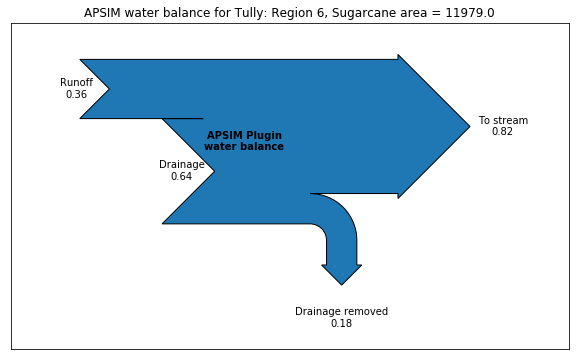

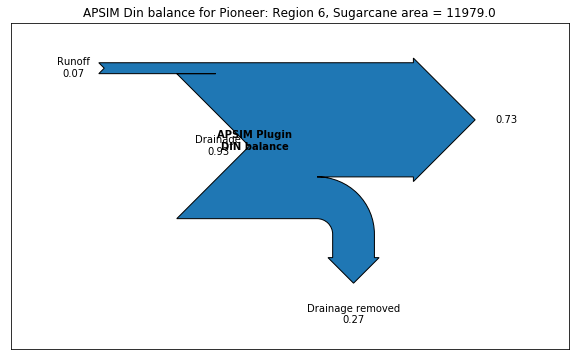

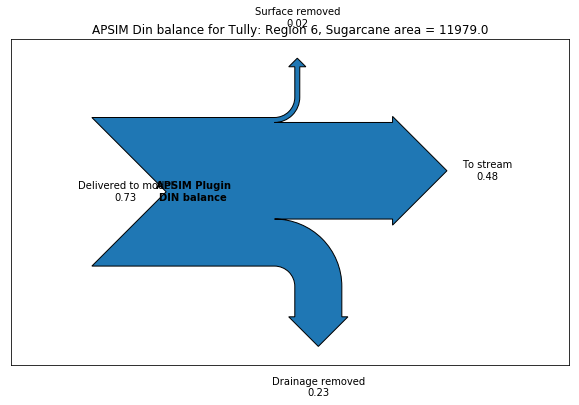

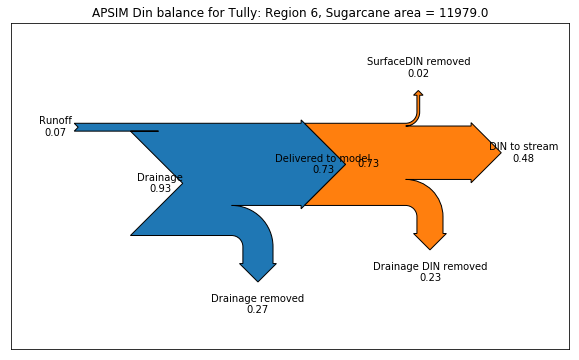

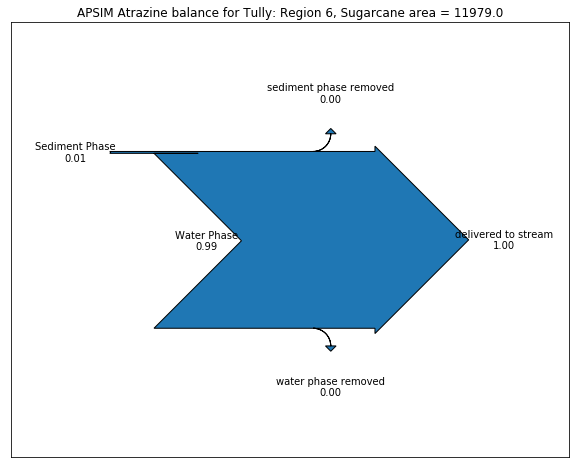

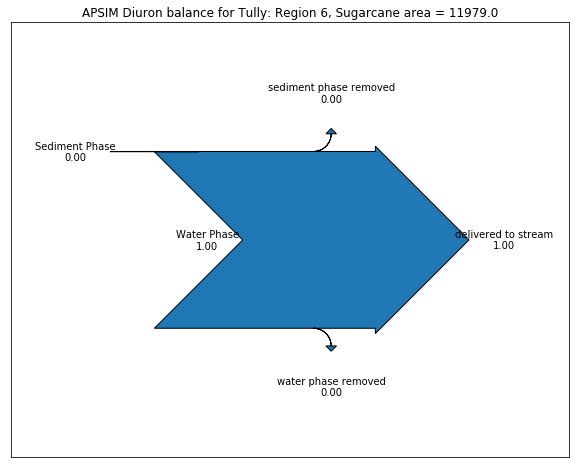

In [61]:
plugin_params=pd.read_csv("C:/Tully/plugin_params_tully.csv")

Sankey_APSIM(DrainageTimeseries,RunoffTimeseries,NLTimeseries,N_DinTimeseries,atzTimeseries,atzwTimeseries,diuTimeseries,diuwTimeseries, plugin_params)